<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_outliers as so


In [4]:
df = pd.read_csv("datos/datos_actuales.csv", index_col = 0)
df.head(2)

name   seller offerType abtest vehicleType   gearbox  \
0            Golf_3_1.6  private     offer   test     Unknown  manually   
1  A5_Sportback_2.7_Tdi  private     offer   test       coupe  manually   

     model fuelType       brand notRepairedDamage  ...  \
0     golf   petrol  volkswagen           Unknown  ...   
1  Unknown   diesel        audi               yes  ...   

  yearOfRegistration_Ratesrobust  powerCV_min_max kilometer_min_max  \
0                      -1.111111          0.00000          1.000000   
1                       0.888889          0.00948          0.827586   

   yearOfRegistration_min_max  powerCV_norm  kilometer_norm  \
0                    0.110346      0.000000        0.999912   
1                    0.112346      0.001496        0.999869   

   yearOfRegistration_norm  powerCV_estandar  kilometer_estandar  \
0                 0.013285         -0.601340            0.607813   
1                 0.016086          0.385348           -0.015437   

   yearOfRegistration_estandar  
0                    -0.124672  
1                     0.069147  

[2 rows x 33 columns]

In [5]:
df.columns.unique()

Index(['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated',
       'postalCode', 'lastSeen', 'price_knn', 'yearOfRegistration_knn',
       'powerCV_knn', 'kilometer_knn', 'monthOfRegistration_knn',
       'nrOfPictures_knn', 'yearCreated_knn', 'monthCreated_knn',
       'powerCV_robust', 'kilometer_Ratesrobust',
       'yearOfRegistration_Ratesrobust', 'powerCV_min_max',
       'kilometer_min_max', 'yearOfRegistration_min_max', 'powerCV_norm',
       'kilometer_norm', 'yearOfRegistration_norm', 'powerCV_estandar',
       'kilometer_estandar', 'yearOfRegistration_estandar'],
      dtype='object')

In [6]:
df = df[['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated',
       'postalCode', 'lastSeen','price_knn','monthOfRegistration_knn','powerCV_estandar','kilometer_estandar','yearOfRegistration_estandar']]

**Analisis multivariado**

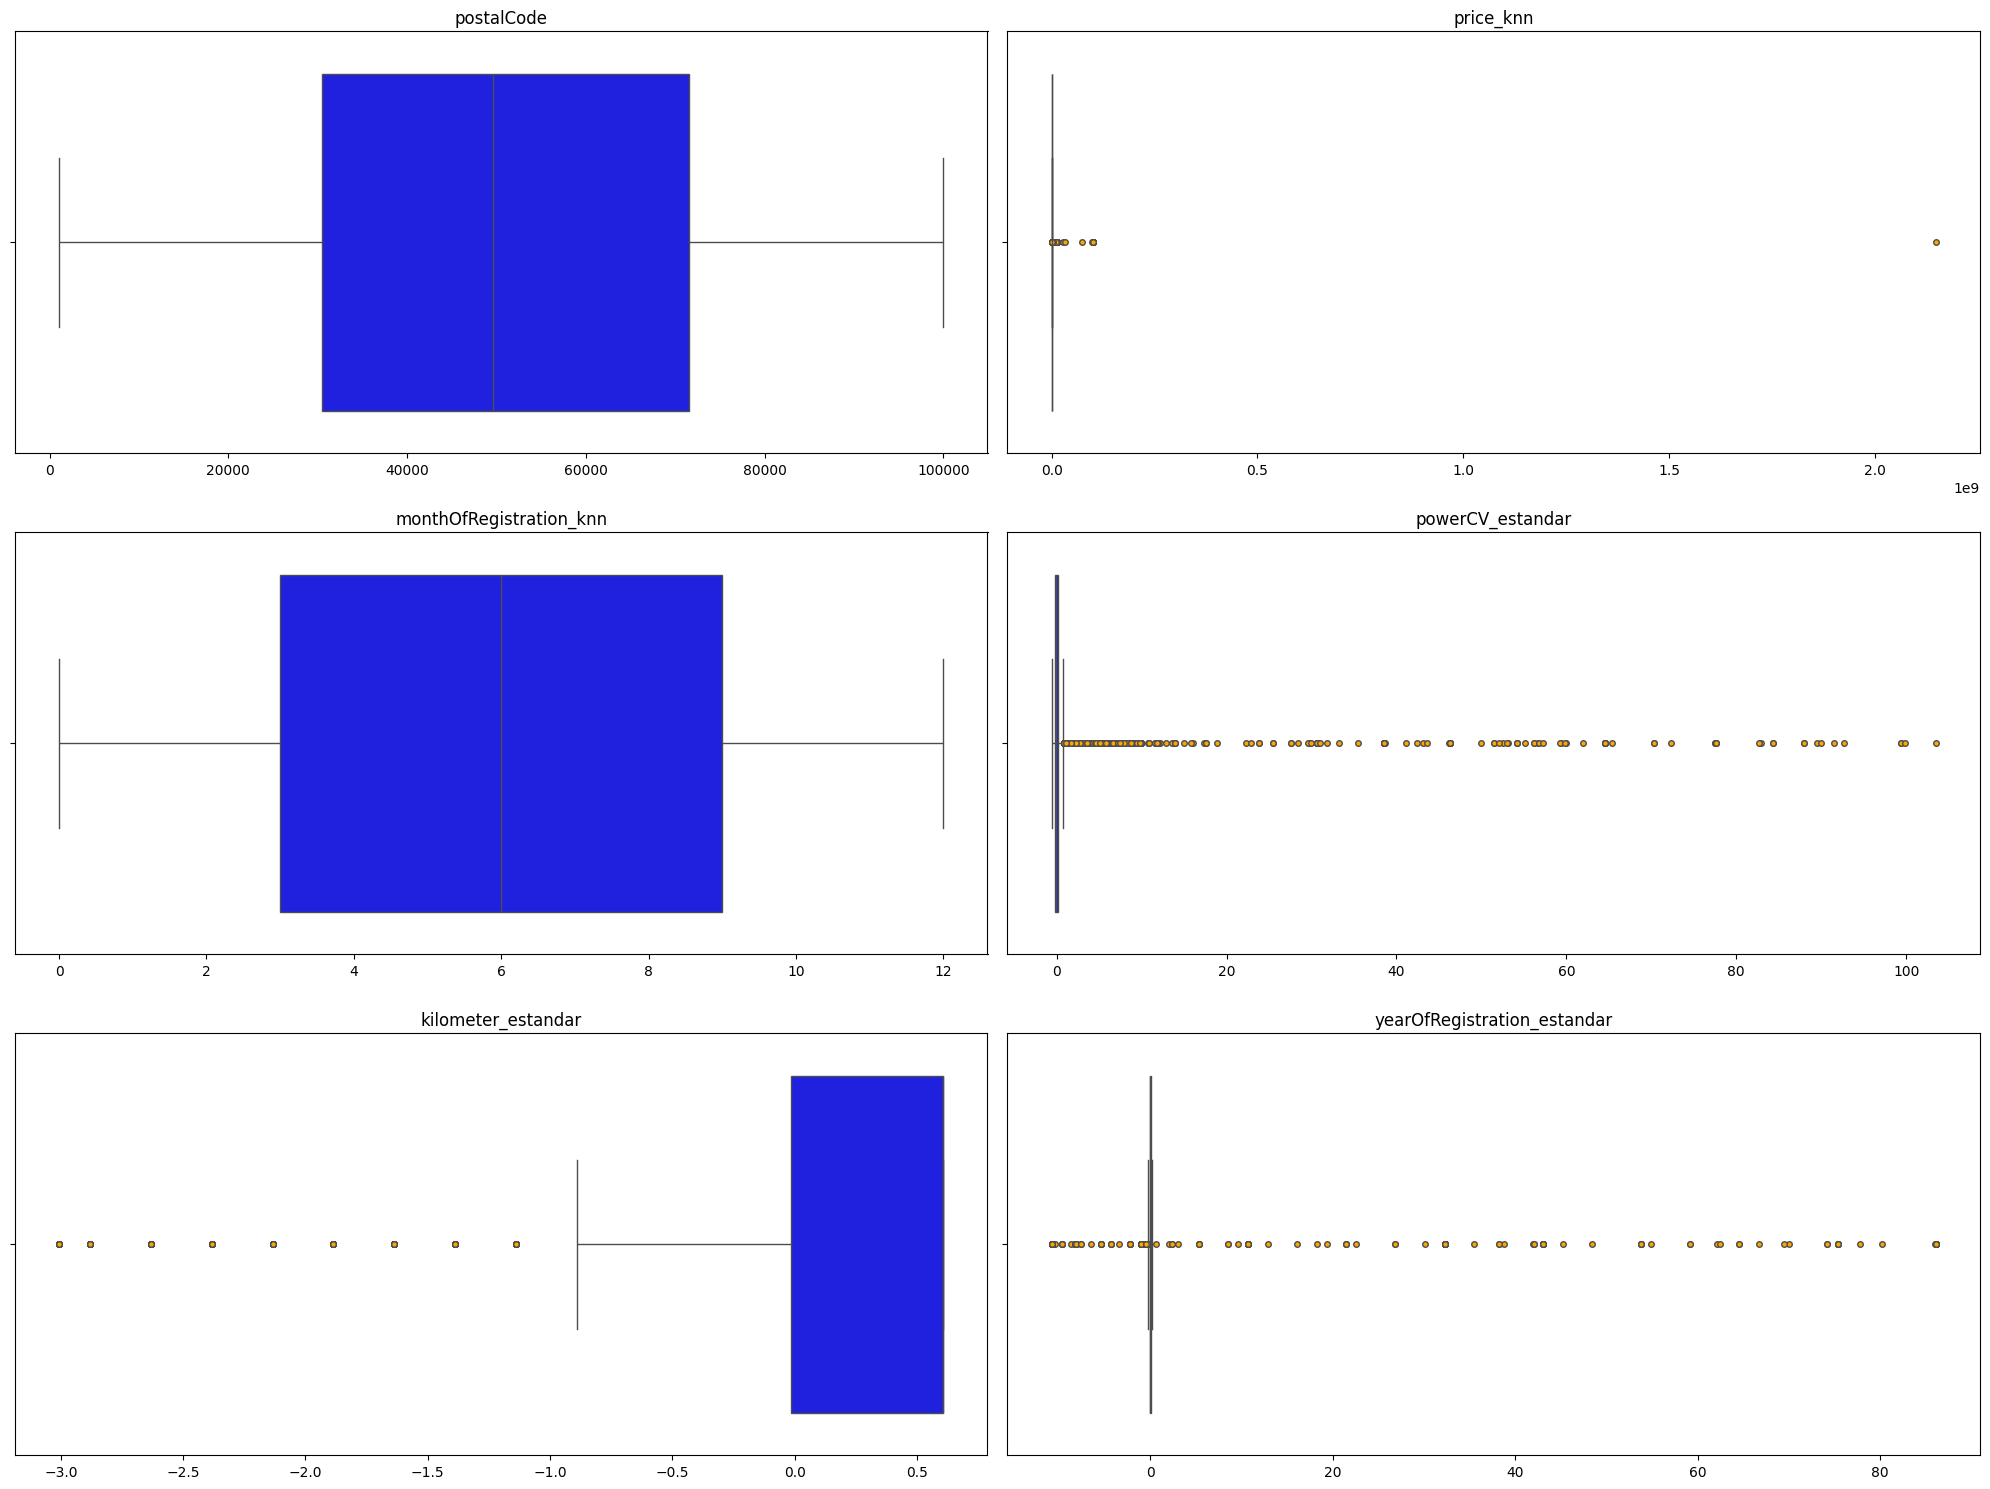

In [7]:
gestion = so.GestionOutliersUnivariados(df)
# llamamos al método que nos permite identificar outliers univariados de forma visual (histograma y boxplot)
gestion.visualizar_outliers_univariados()

En este caso, los *outliers* pueden visualizarse bastante bien.

Interpretemos ahora los resultados del `boxplot` para las variables que se consiferan numericas, aunque mas adelante veremos que algunas las deberemos pasar a categorica . Pero antes de meternos en materia recordemos que es lo que vemos en el *boxplot* el cual está compuesto por las siguientes partes: 

- **Caja**: Representa el rango intercuartílico (IQR), indicando la distancia entre el primer y tercer cuartil.
  
- **Línea Mediana**: Divide el conjunto de datos en dos partes iguales.
  
- **Bigotes**: Líneas que se extienden desde los extremos de la caja hasta los valores mínimo y máximo dentro de 1.5 (por defecto) veces el IQR de los primer y tercer cuartiles.
  
- **Valores atípicos (*outliers*)**: Los valores que caen fuera de estos límites se consideran valores atípicos.

Si mostramos ahora el *boxplot* para las columnas seleccionadas podemos ver como los *outliers* son mucho más fácil identificarlos visualmente, pero es difícil determinar la ubicación de estos valores en el computo general de los datos. 
Por lo tanto vamos a utilizar los estadisticos correspondientes para seguir con nuestro analisis.


No vamos a realizar un contraste zscore puesto que la distribucion no es normal.

**Realizamos el analisis del estadisticos IQR**


In [8]:
outliers_iqr = gestion.detectar_outliers_iqr()          #Outlaiers que dectamos univariable.

La cantidad de outliers que tenemos para la columna PRICE_KNN es 28106
La cantidad de outliers que tenemos para la columna POWERCV_ESTANDAR es 10685
La cantidad de outliers que tenemos para la columna KILOMETER_ESTANDAR es 64216
La cantidad de outliers que tenemos para la columna YEAROFREGISTRATION_ESTANDAR es 7143


In [9]:
df.columns.unique()

Index(['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated',
       'postalCode', 'lastSeen', 'price_knn', 'monthOfRegistration_knn',
       'powerCV_estandar', 'kilometer_estandar',
       'yearOfRegistration_estandar'],
      dtype='object')

**Comenzamos con el estudio de los otliers con estadistadisticos multivariados**

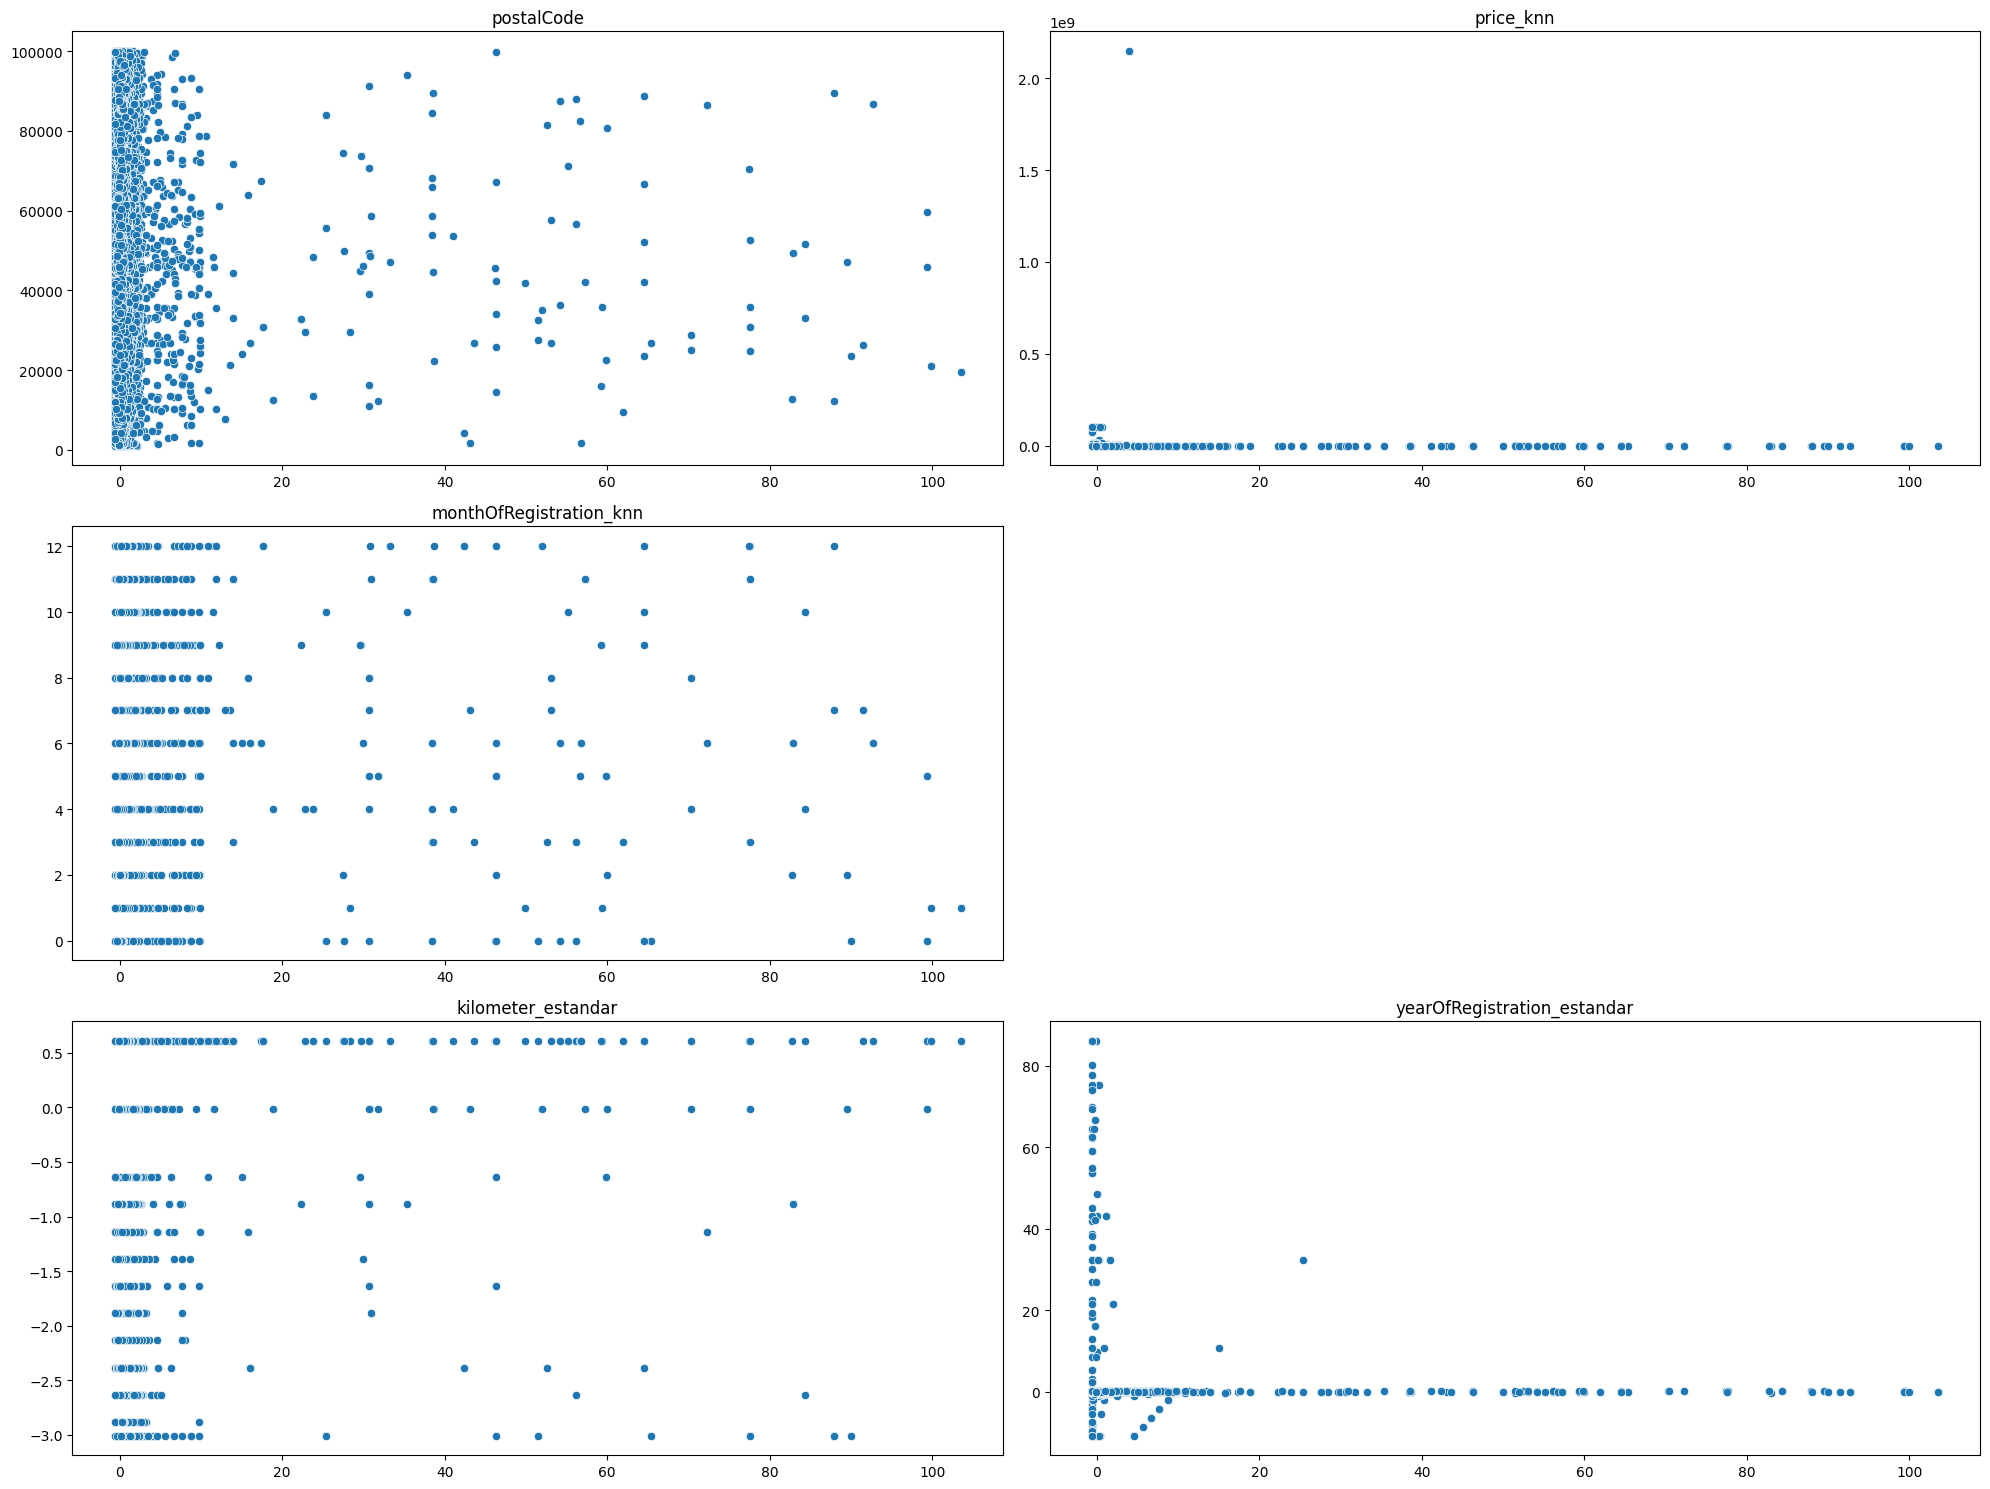

In [ ]:
#Iniciamos el metodo multivariados para los outlaier.
# instanciamos la clase de indentificación de Outliers Multivariados
gestion_multi= so.GestionOutliersMultivariados(df)
# llamamos al método que nos permite identificar los outliers de la colunma powercv
gestion_multi.visualizar_outliers_bivariados('powerCV_estandar')

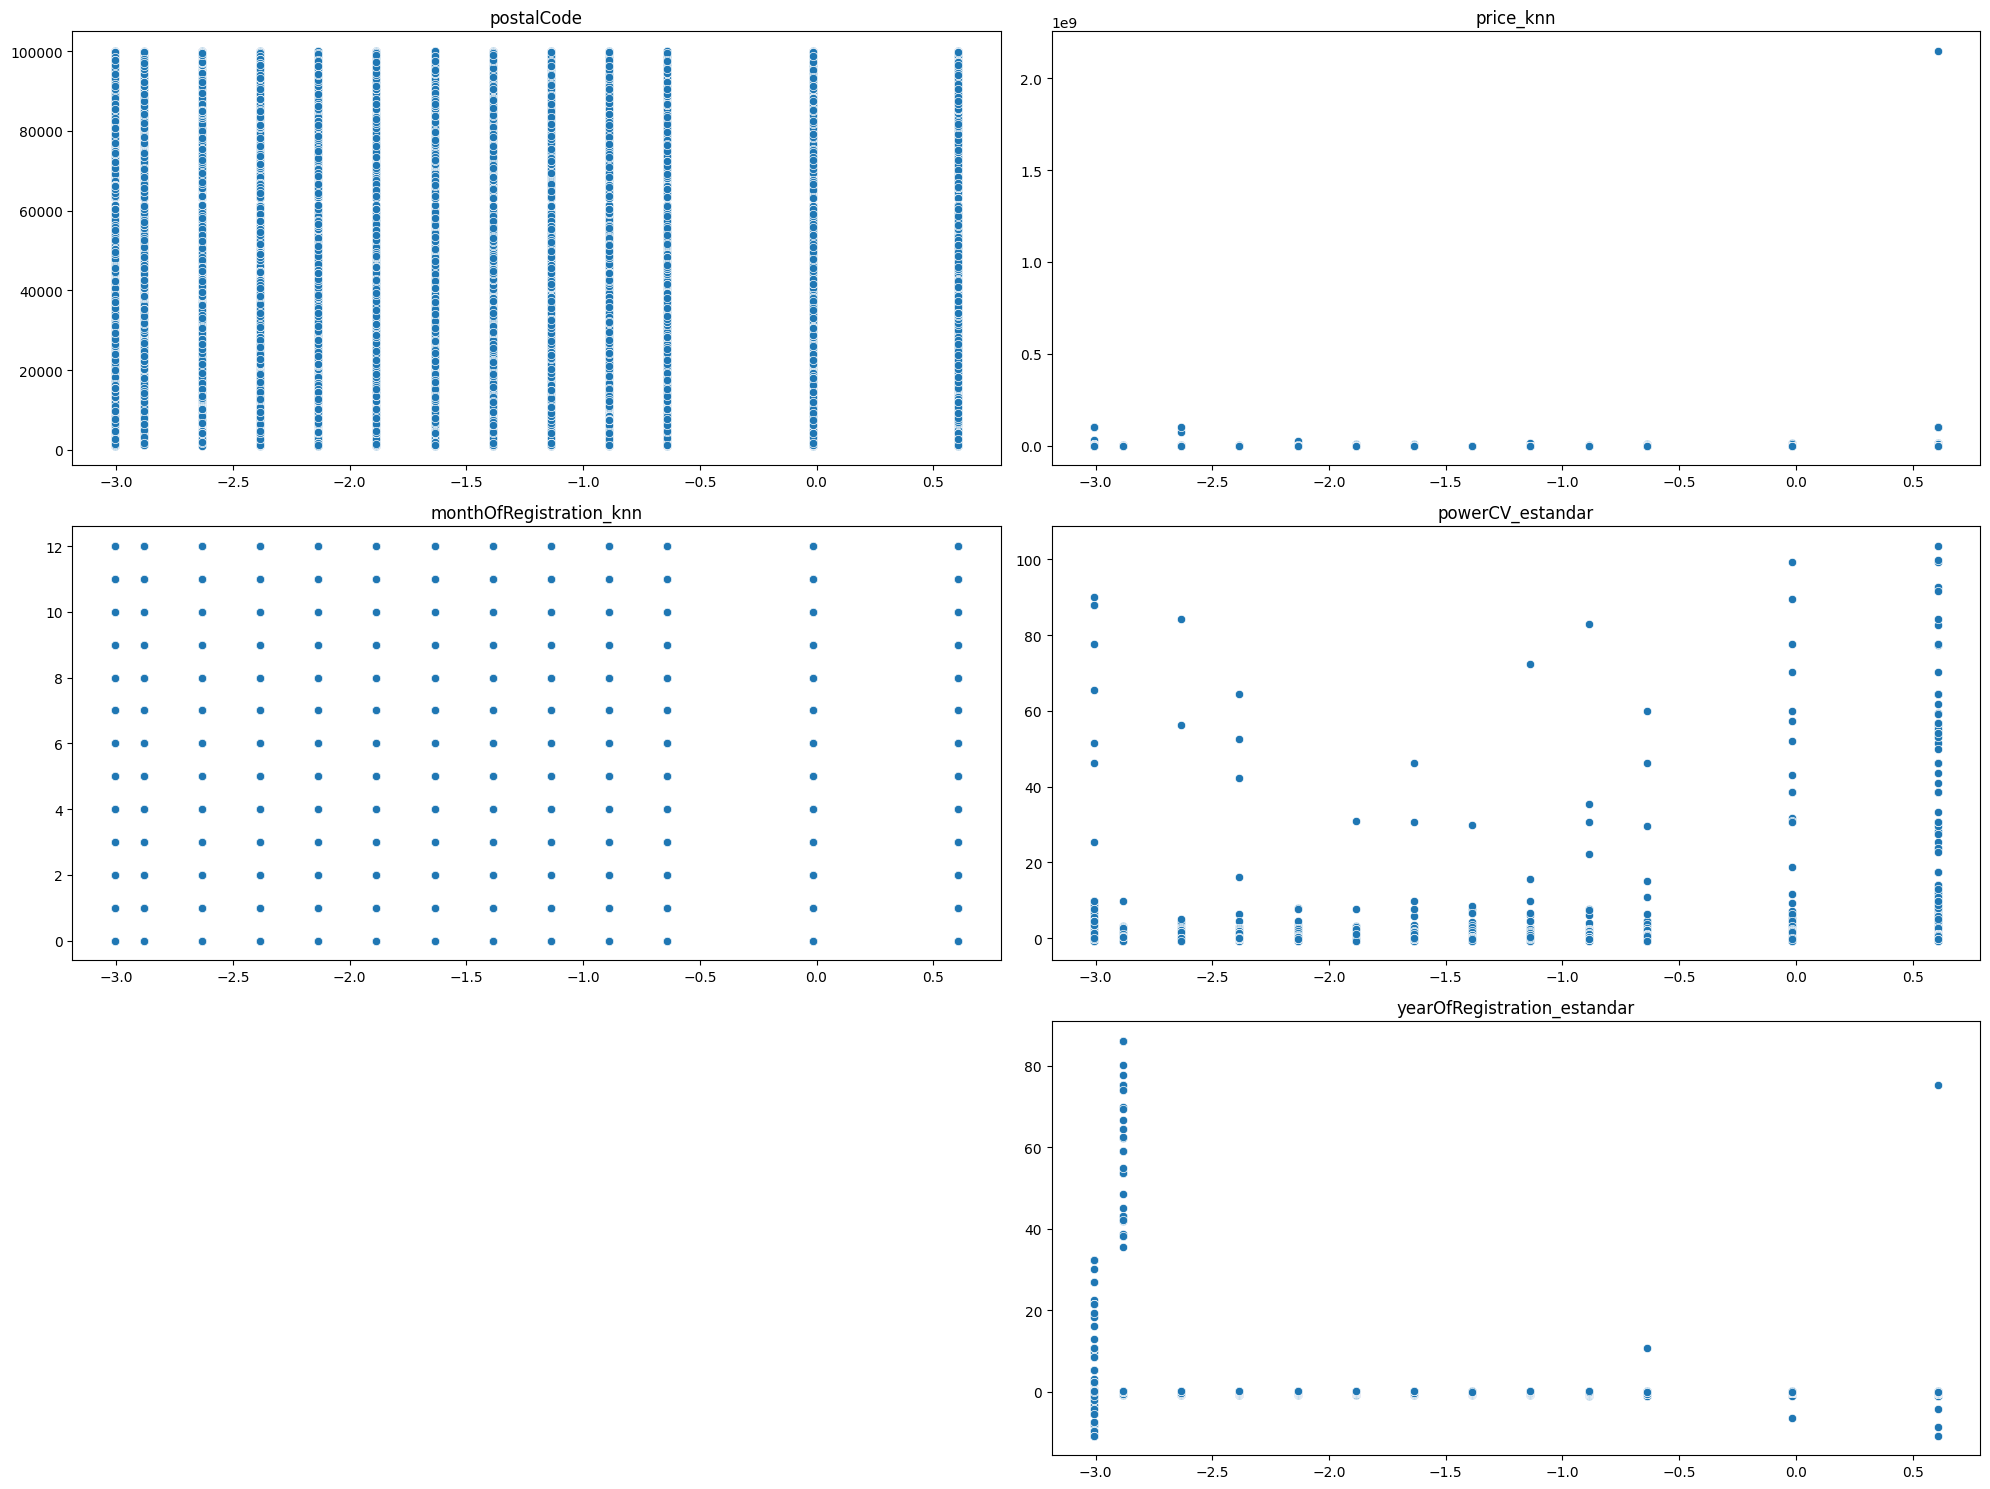

In [ ]:
#Iniciamos el metodo multivariados para los outlaier.
# instanciamos la clase de indentificación de Outliers Multivariados
gestion_multi= so.GestionOutliersMultivariados(df)
# llamamos al método que nos permite identificar los outliers de la columna kilometros
gestion_multi.visualizar_outliers_bivariados('kilometer_estandar')

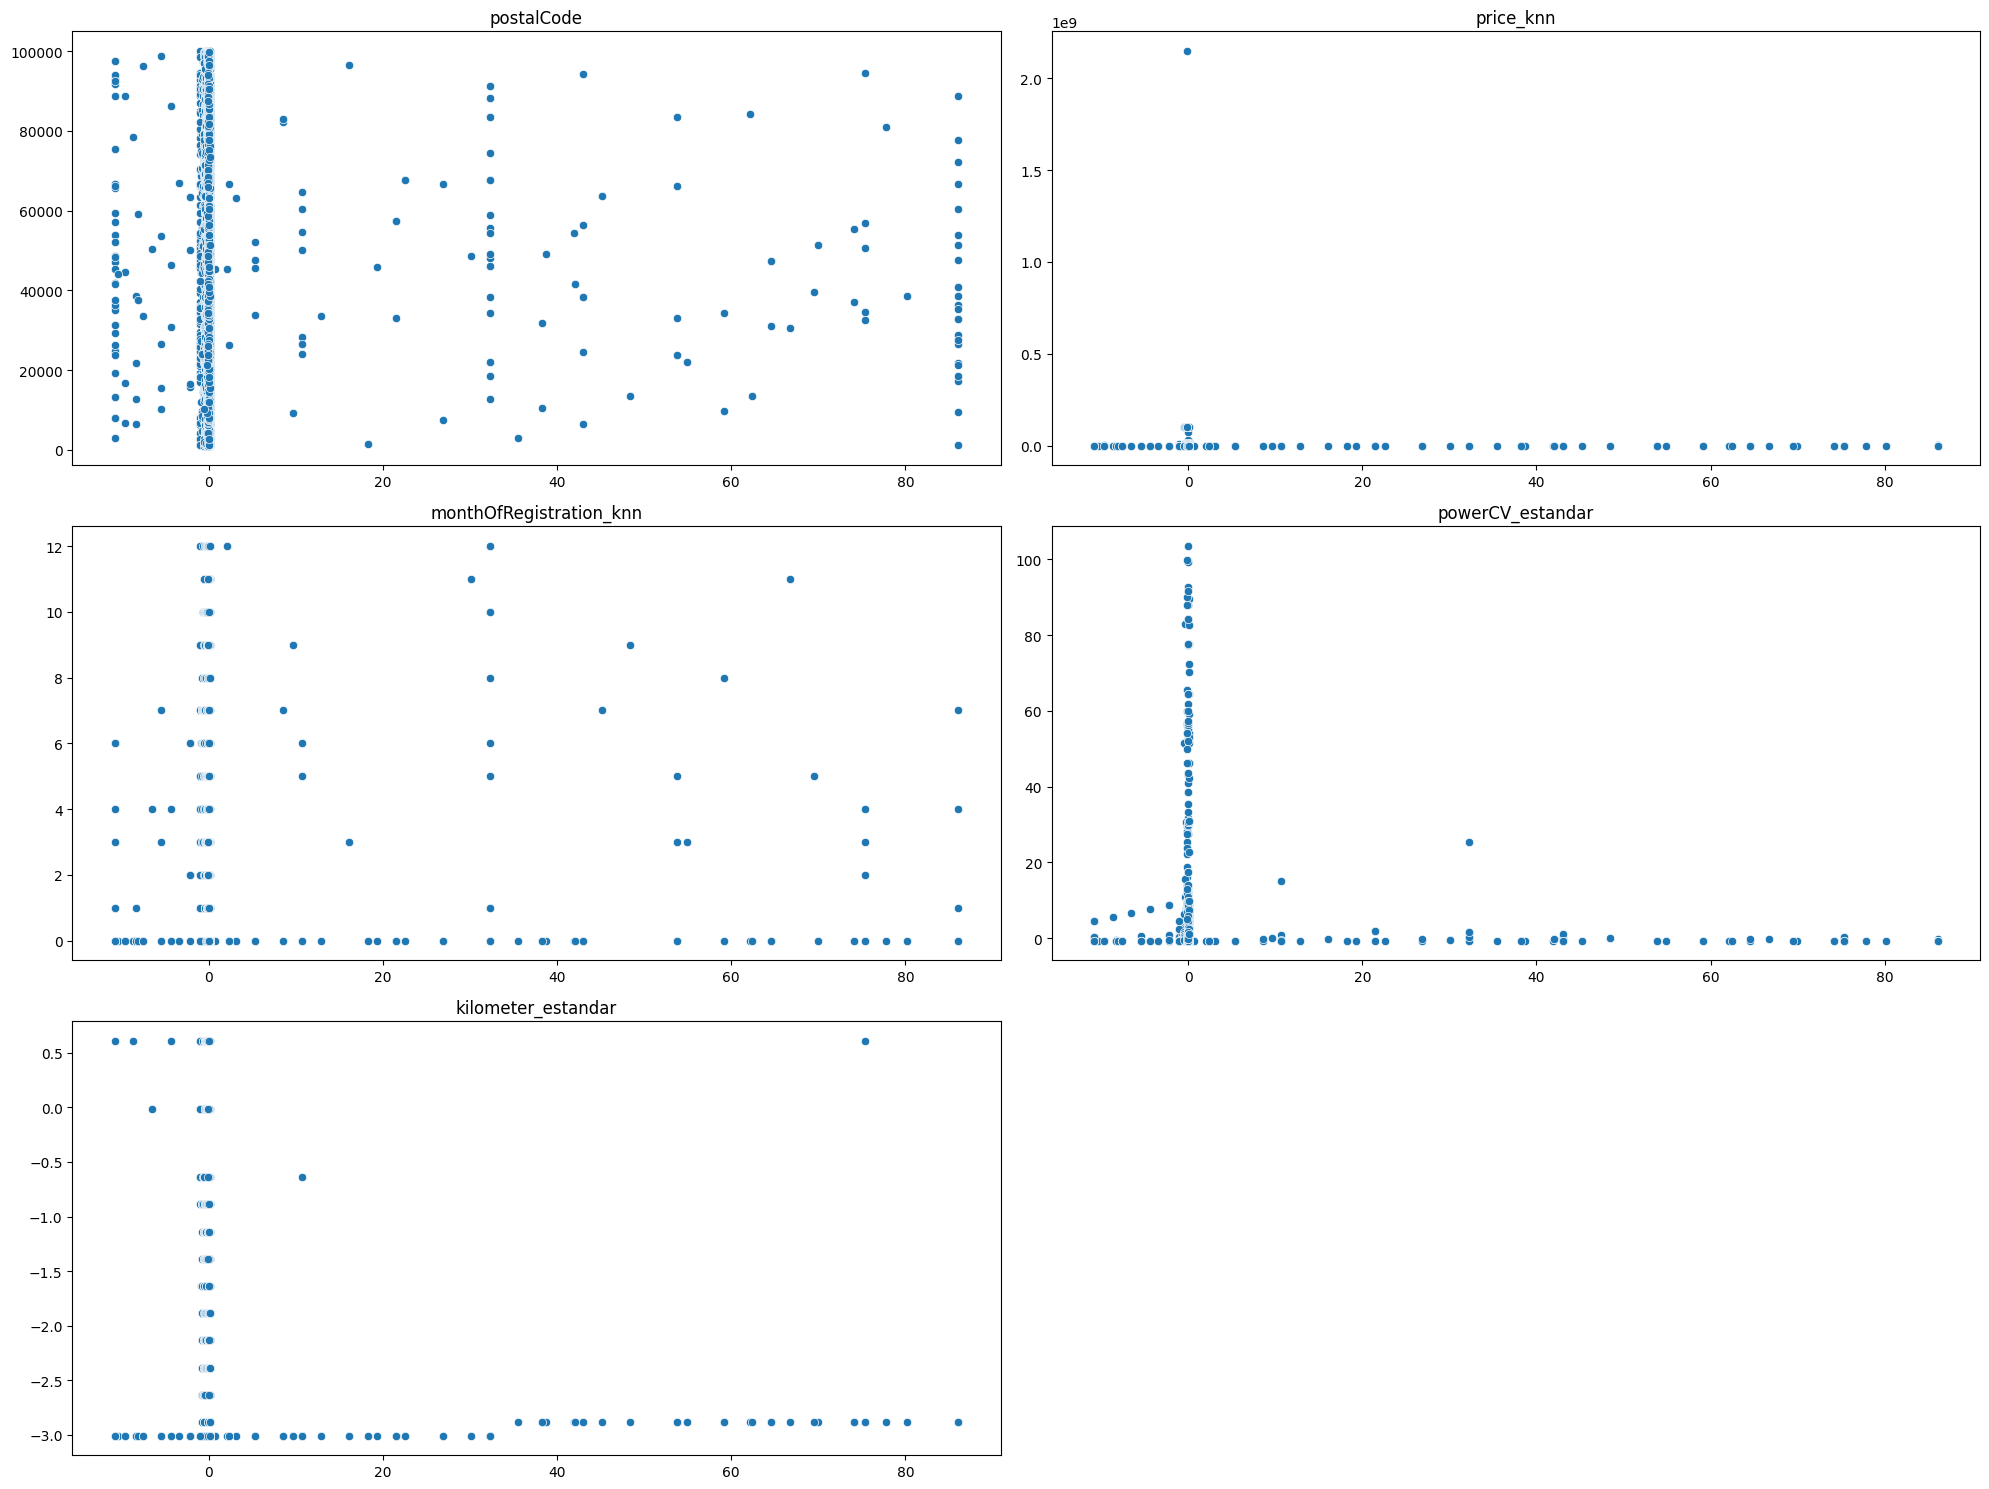

In [ ]:

# instanciamos la clase de indentificación de Outliers Multivariados
gestion_multi= so.GestionOutliersMultivariados(df)
# llamamos al método que nos permite identificar los outliers de la columna Year of registration
gestion_multi.visualizar_outliers_bivariados('yearOfRegistration_estandar')


Al igual que cuando trabajabamos con *outliers* univariados, los diagramas de dispersión visualizan muy bien los *outliers* pero no los identifican en el conjunto de datos.

**Vamos a utilizar estadisticos de exploracion de outlaiers**

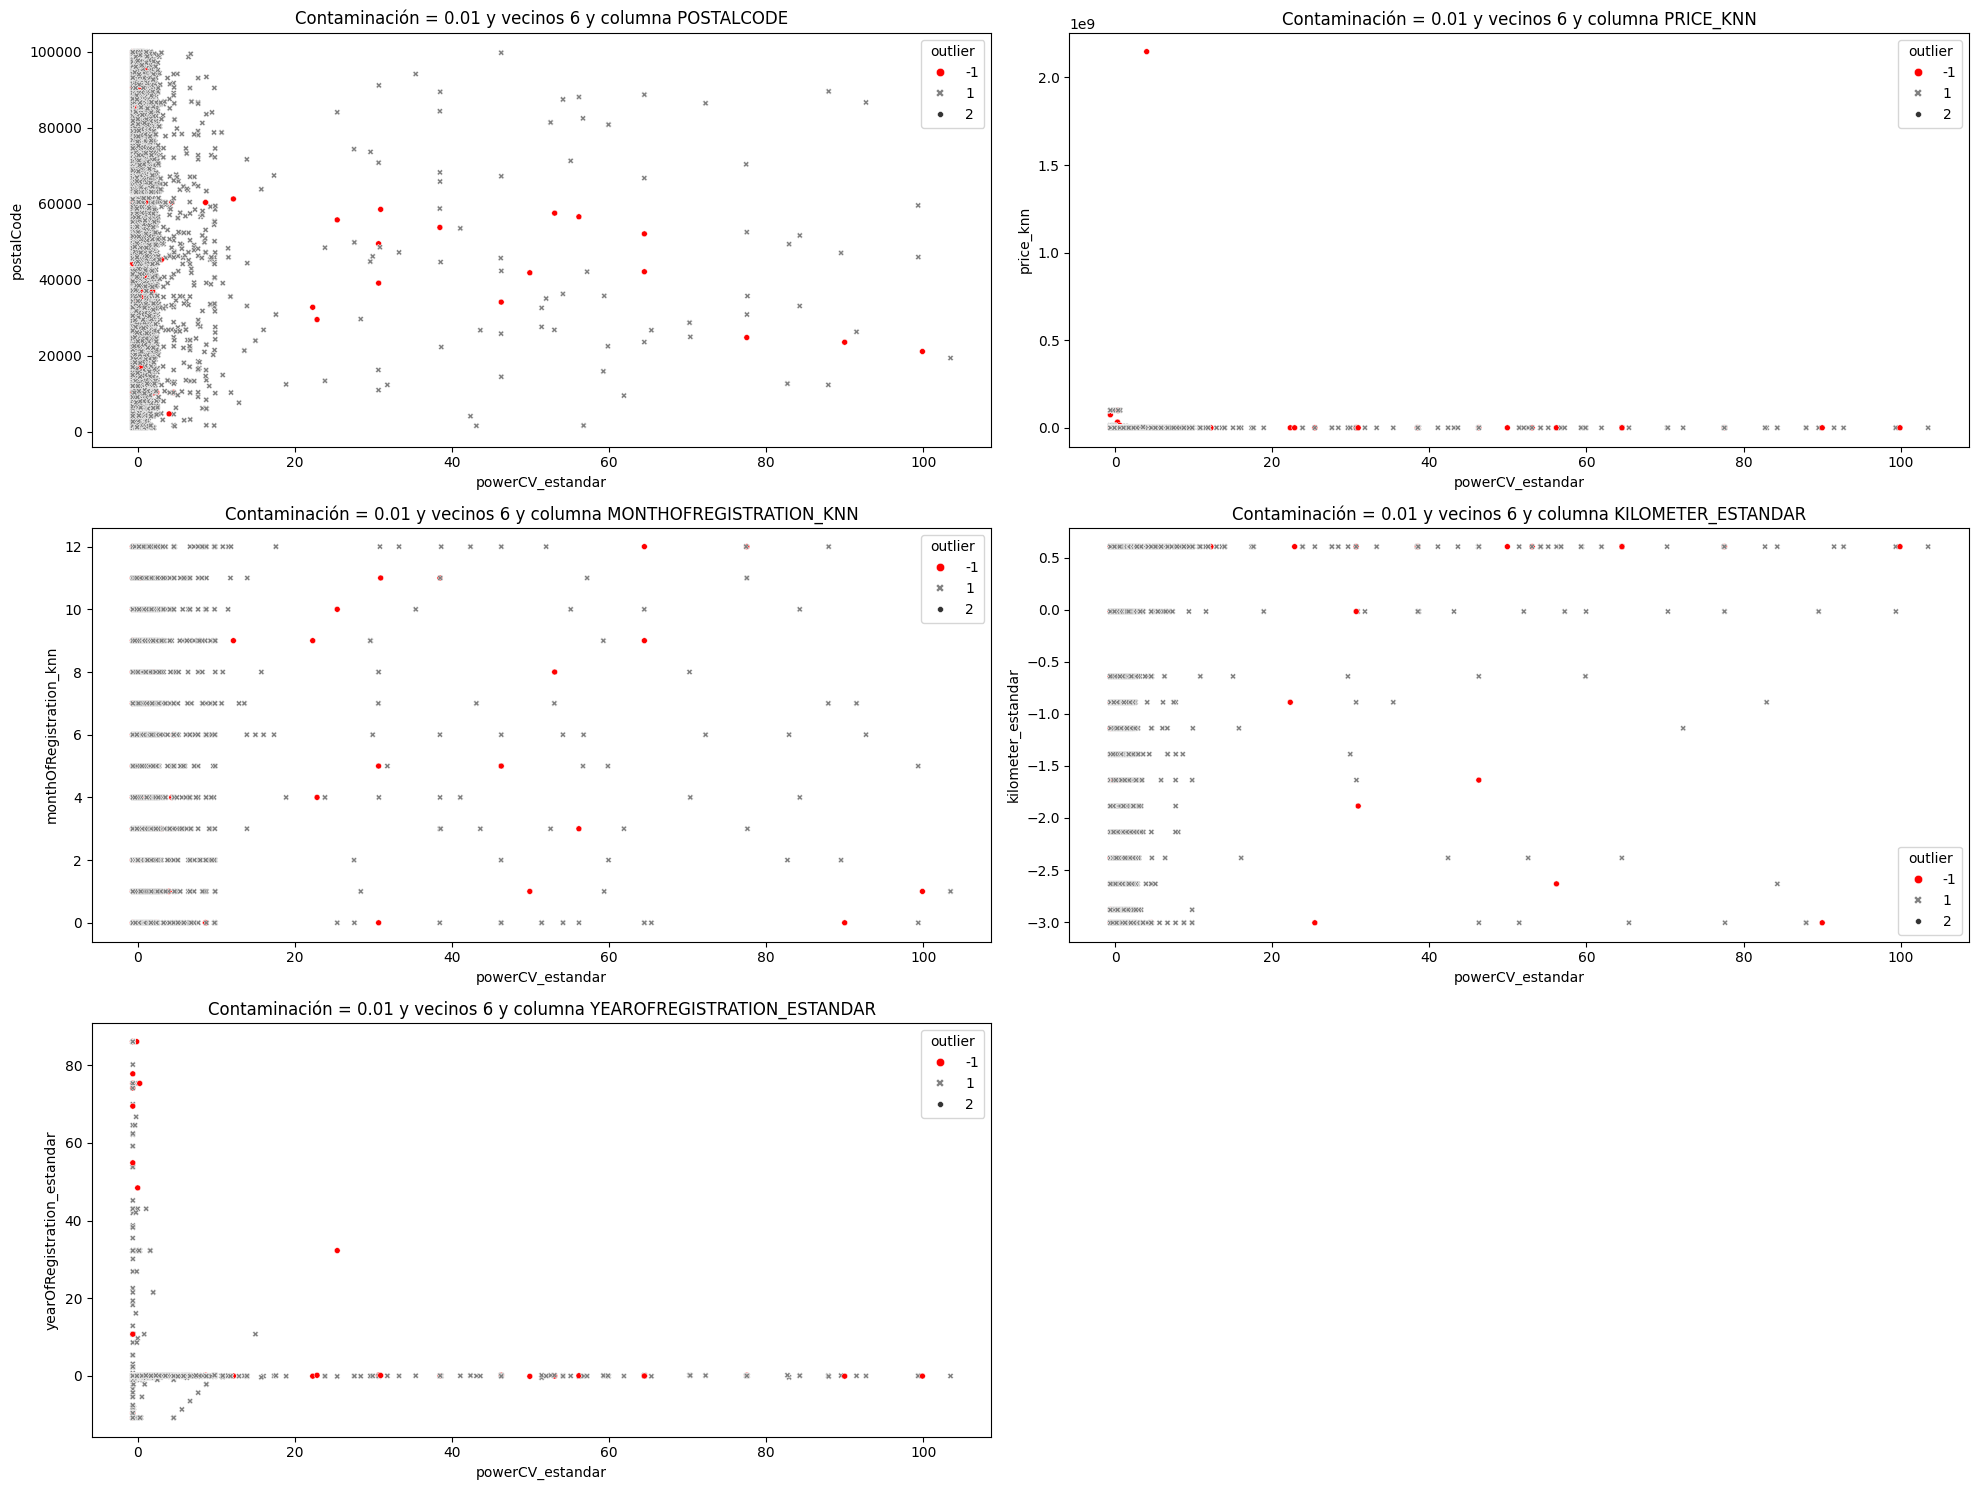

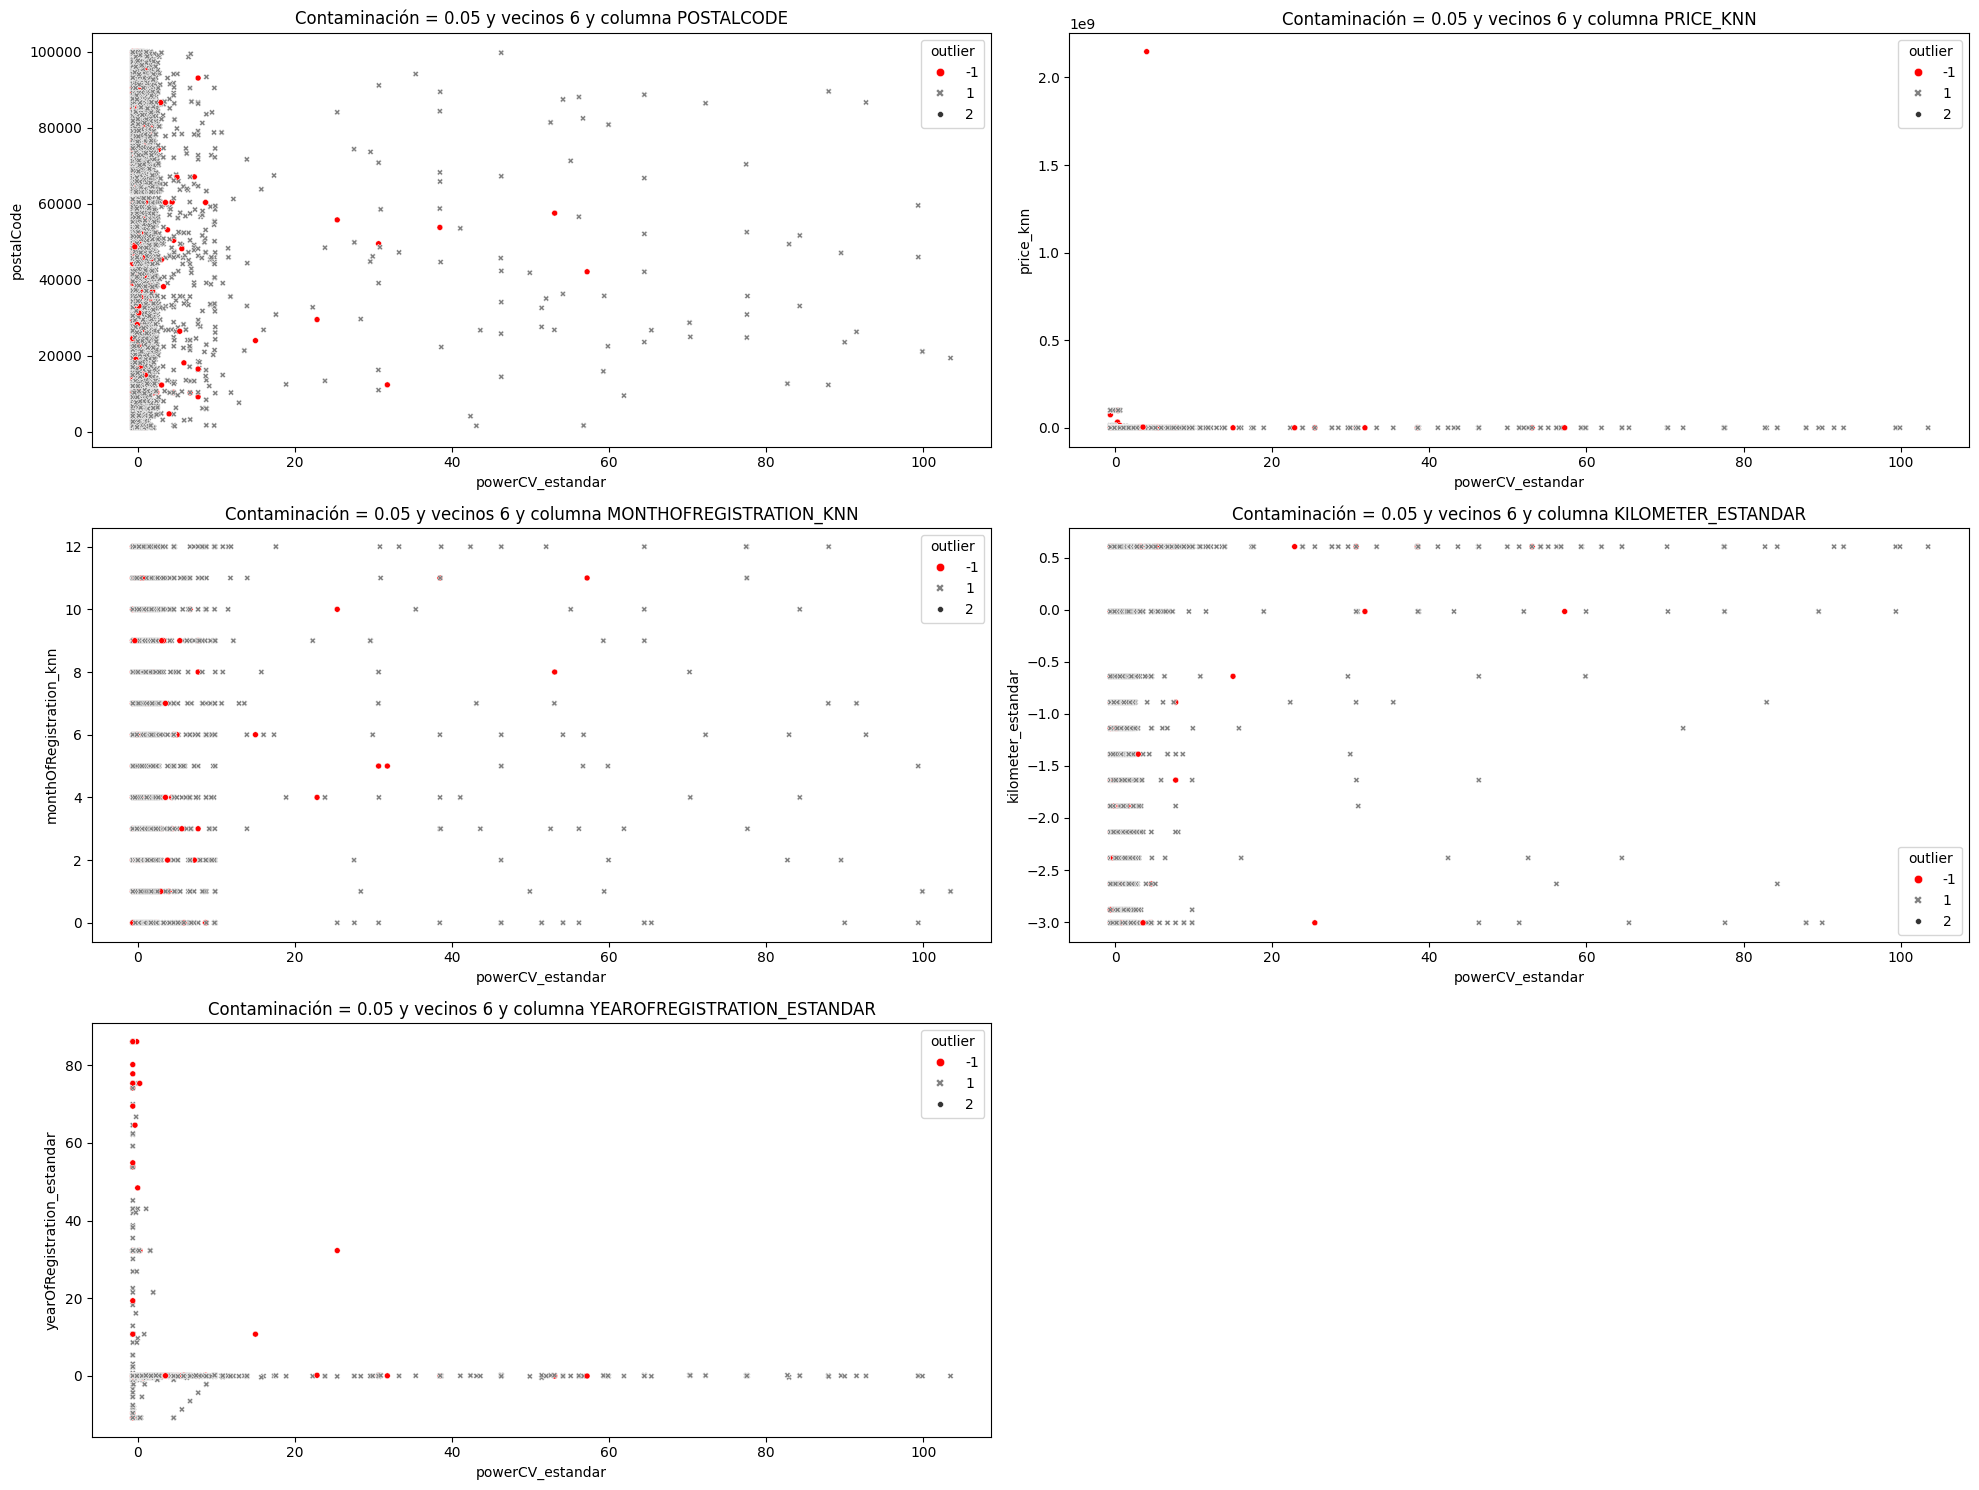

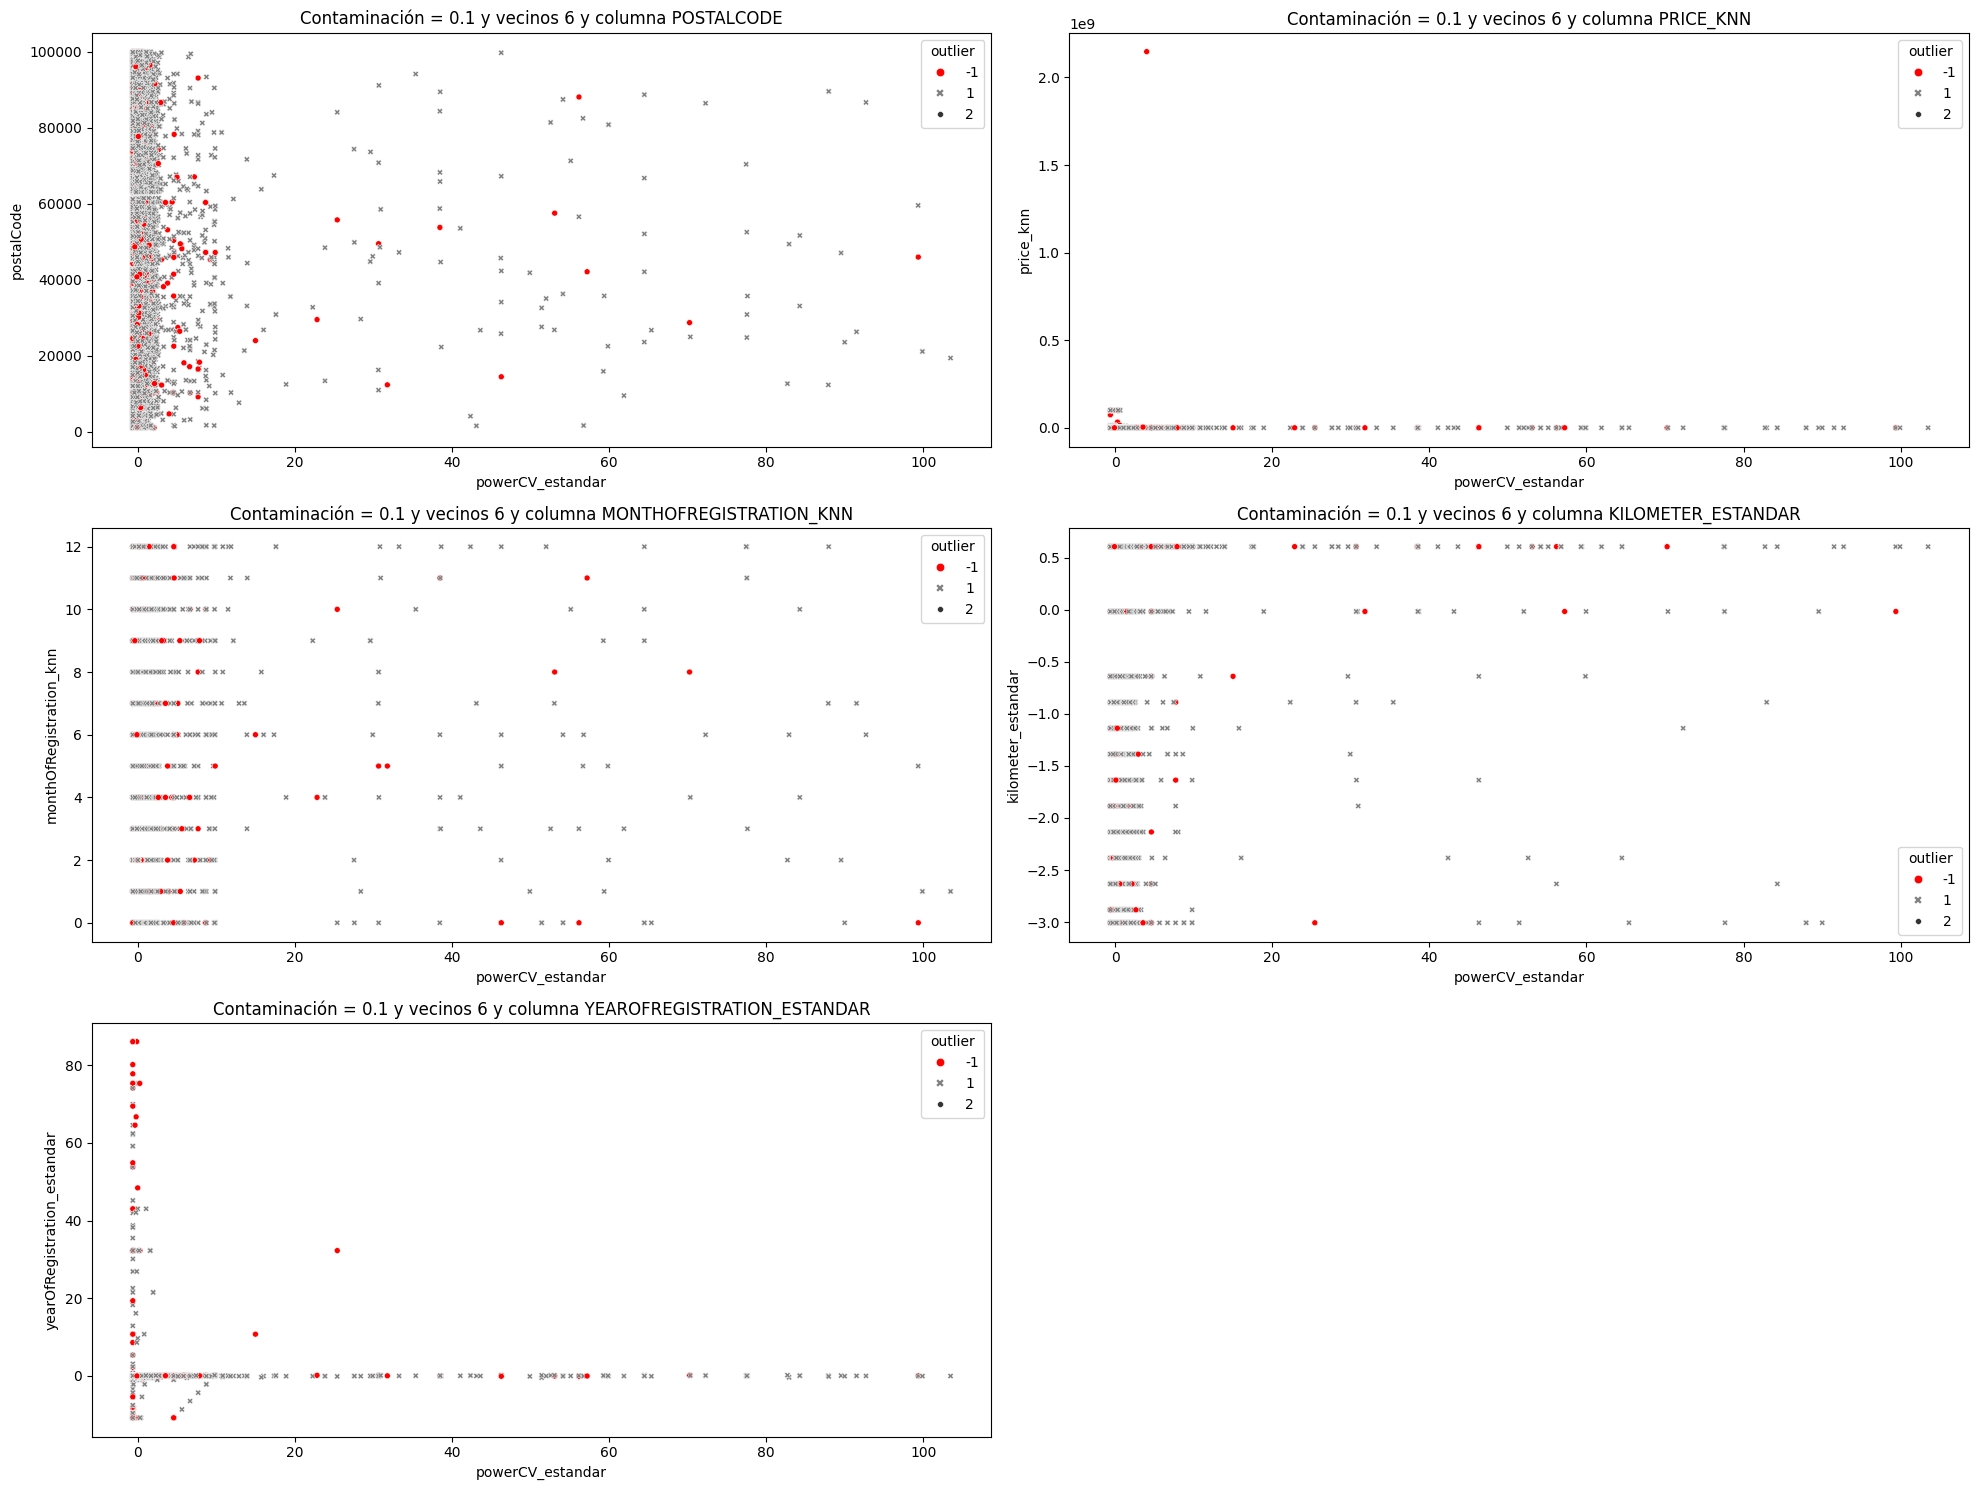

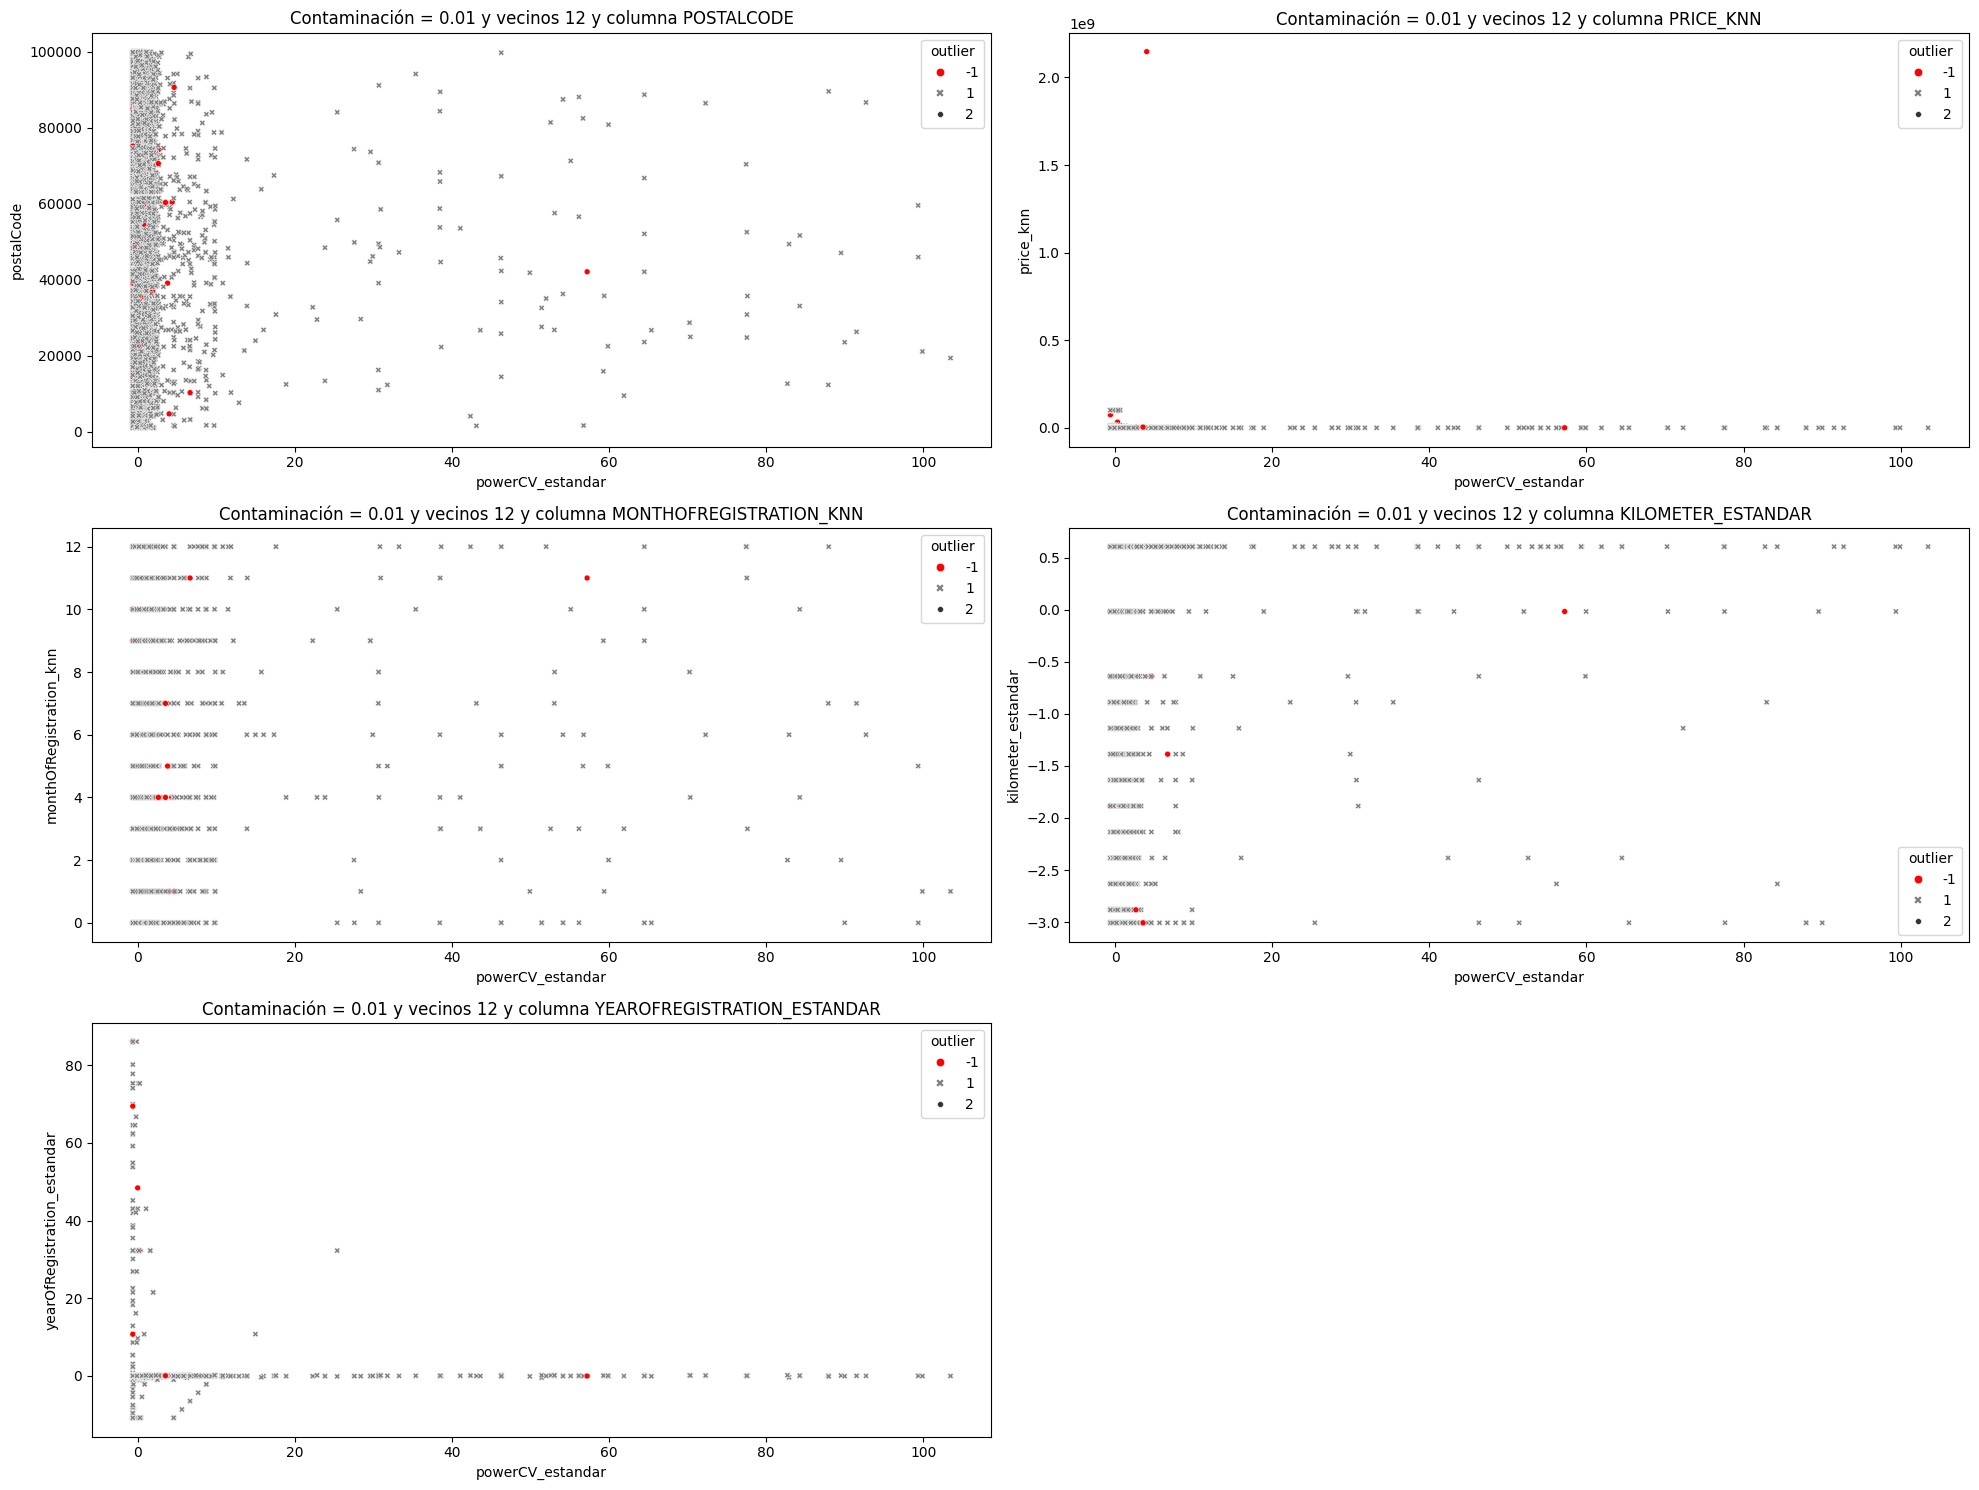

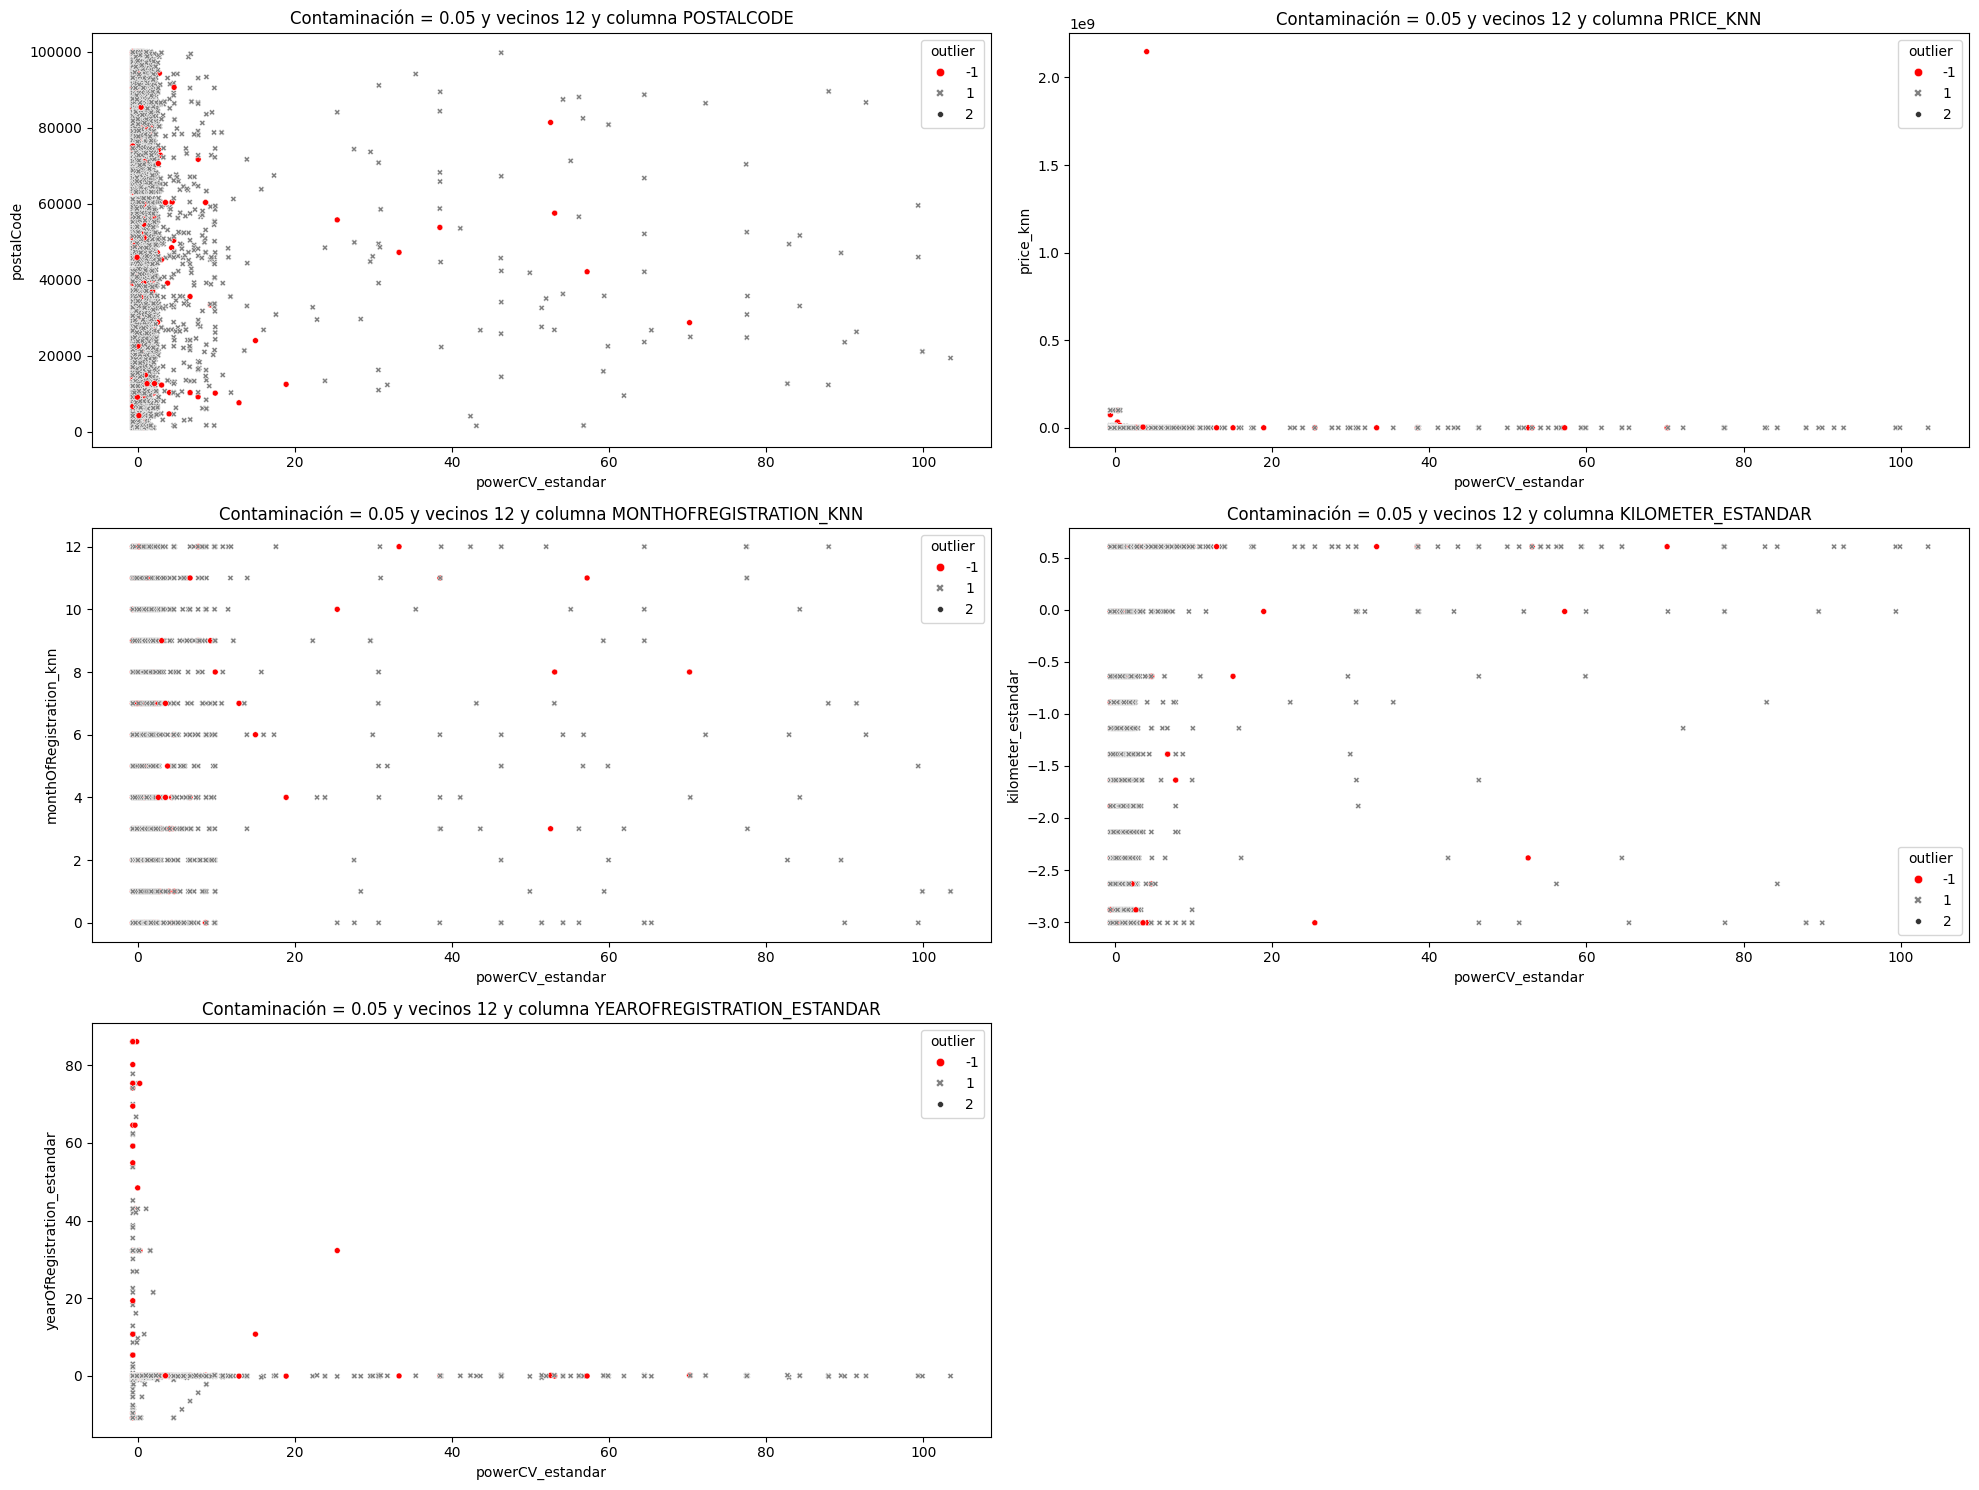

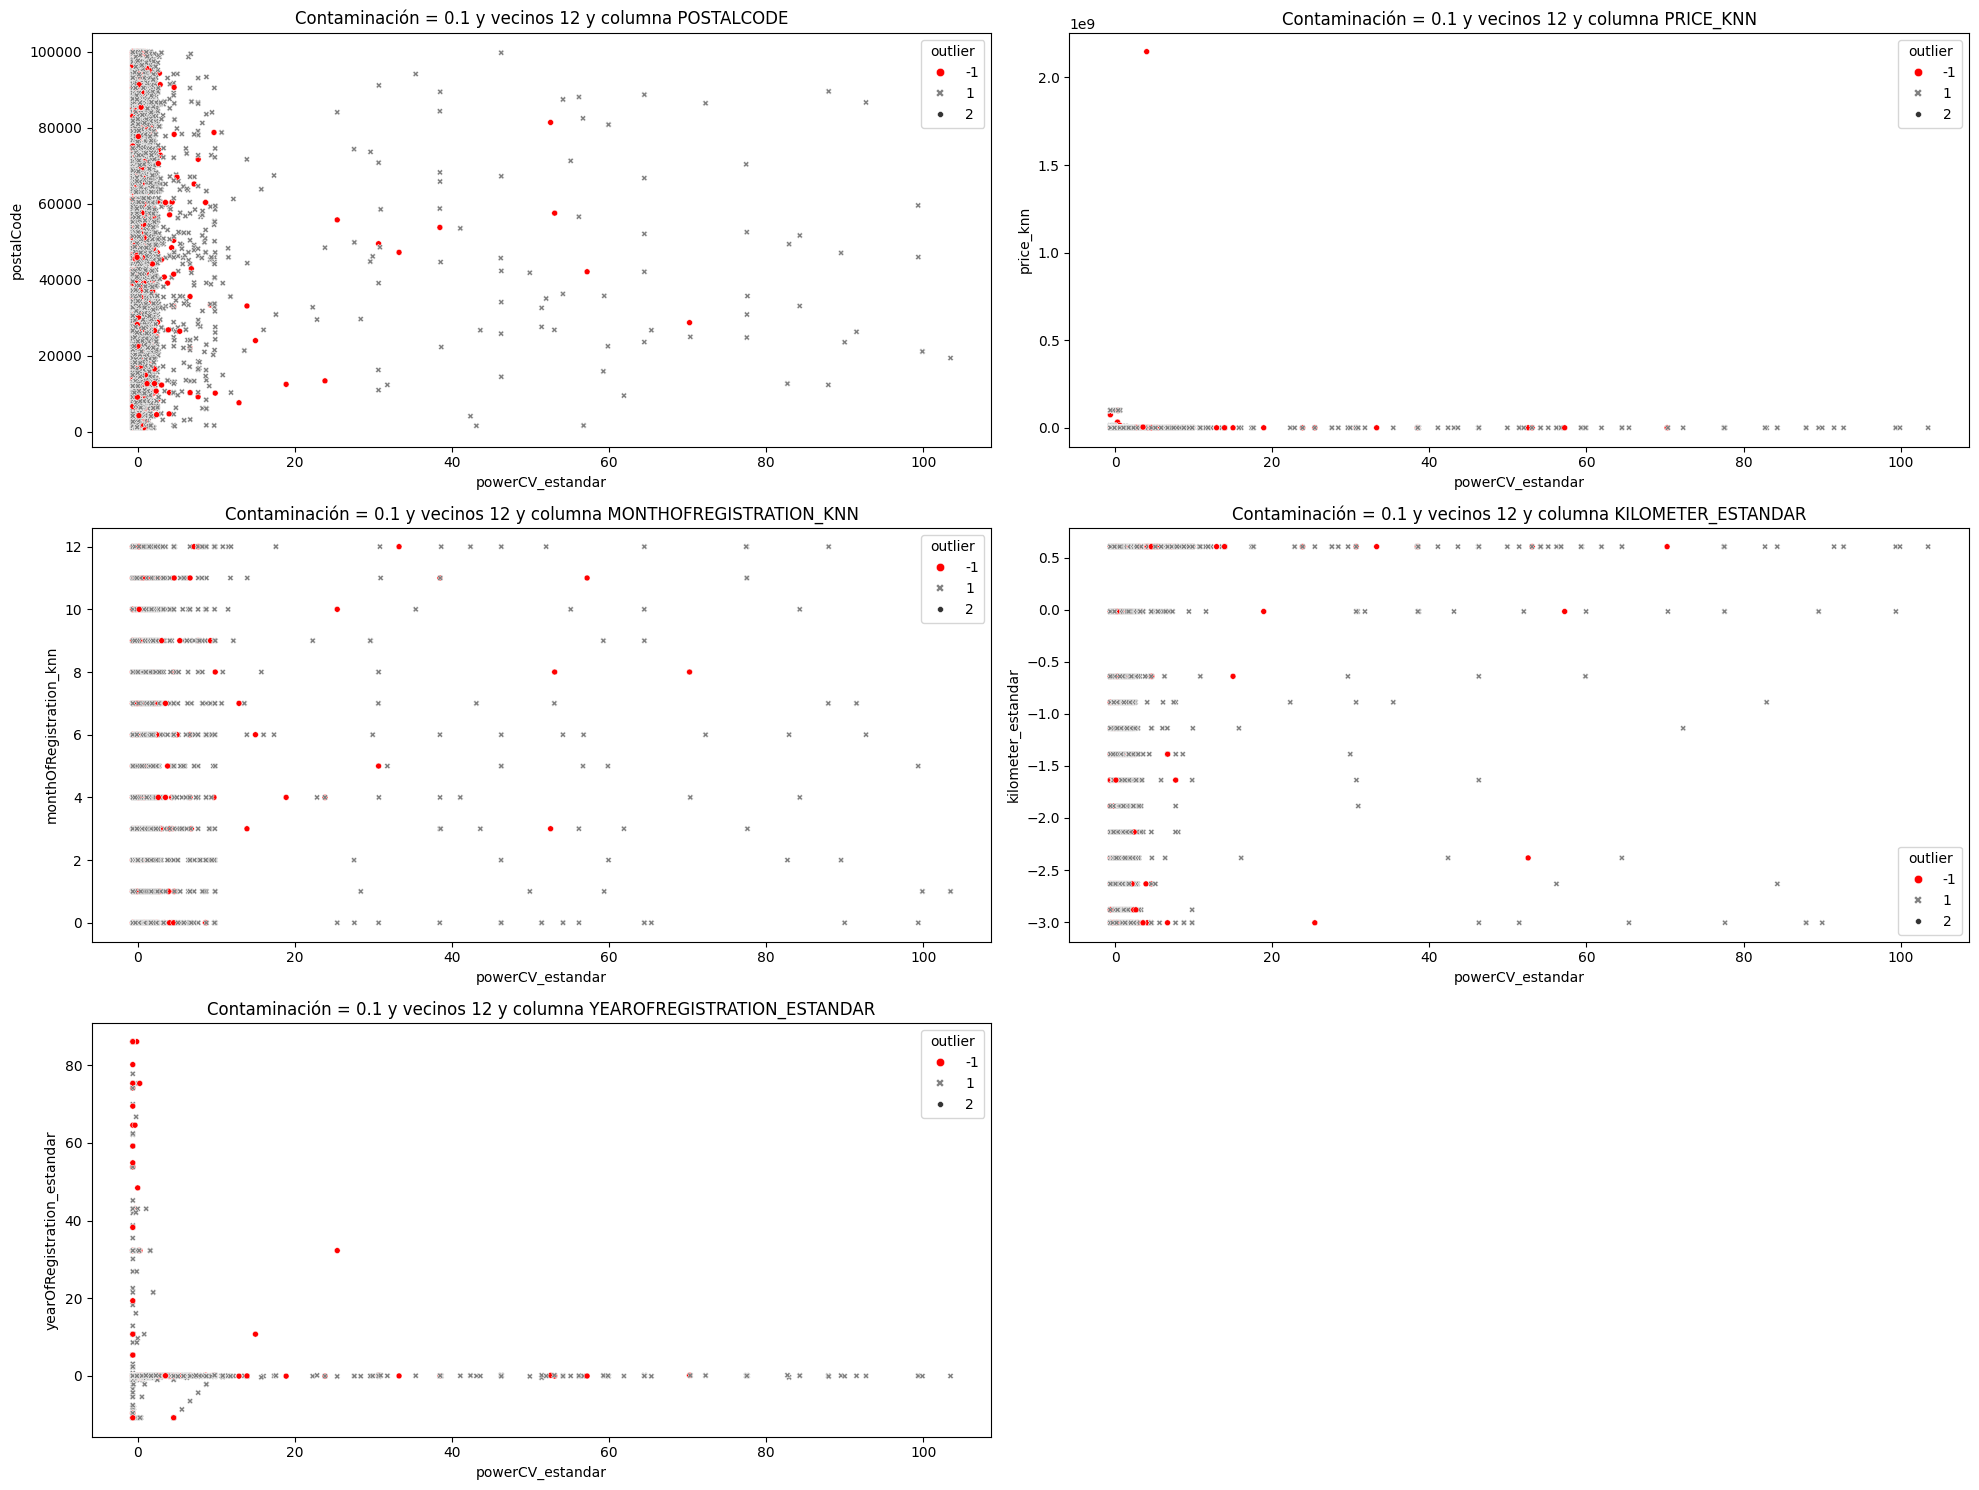

In [13]:
gestion_multi = so.GestionOutliersMultivariados(df)
gestion_multi.explorar_outliers_lof("powerCV_estandar")

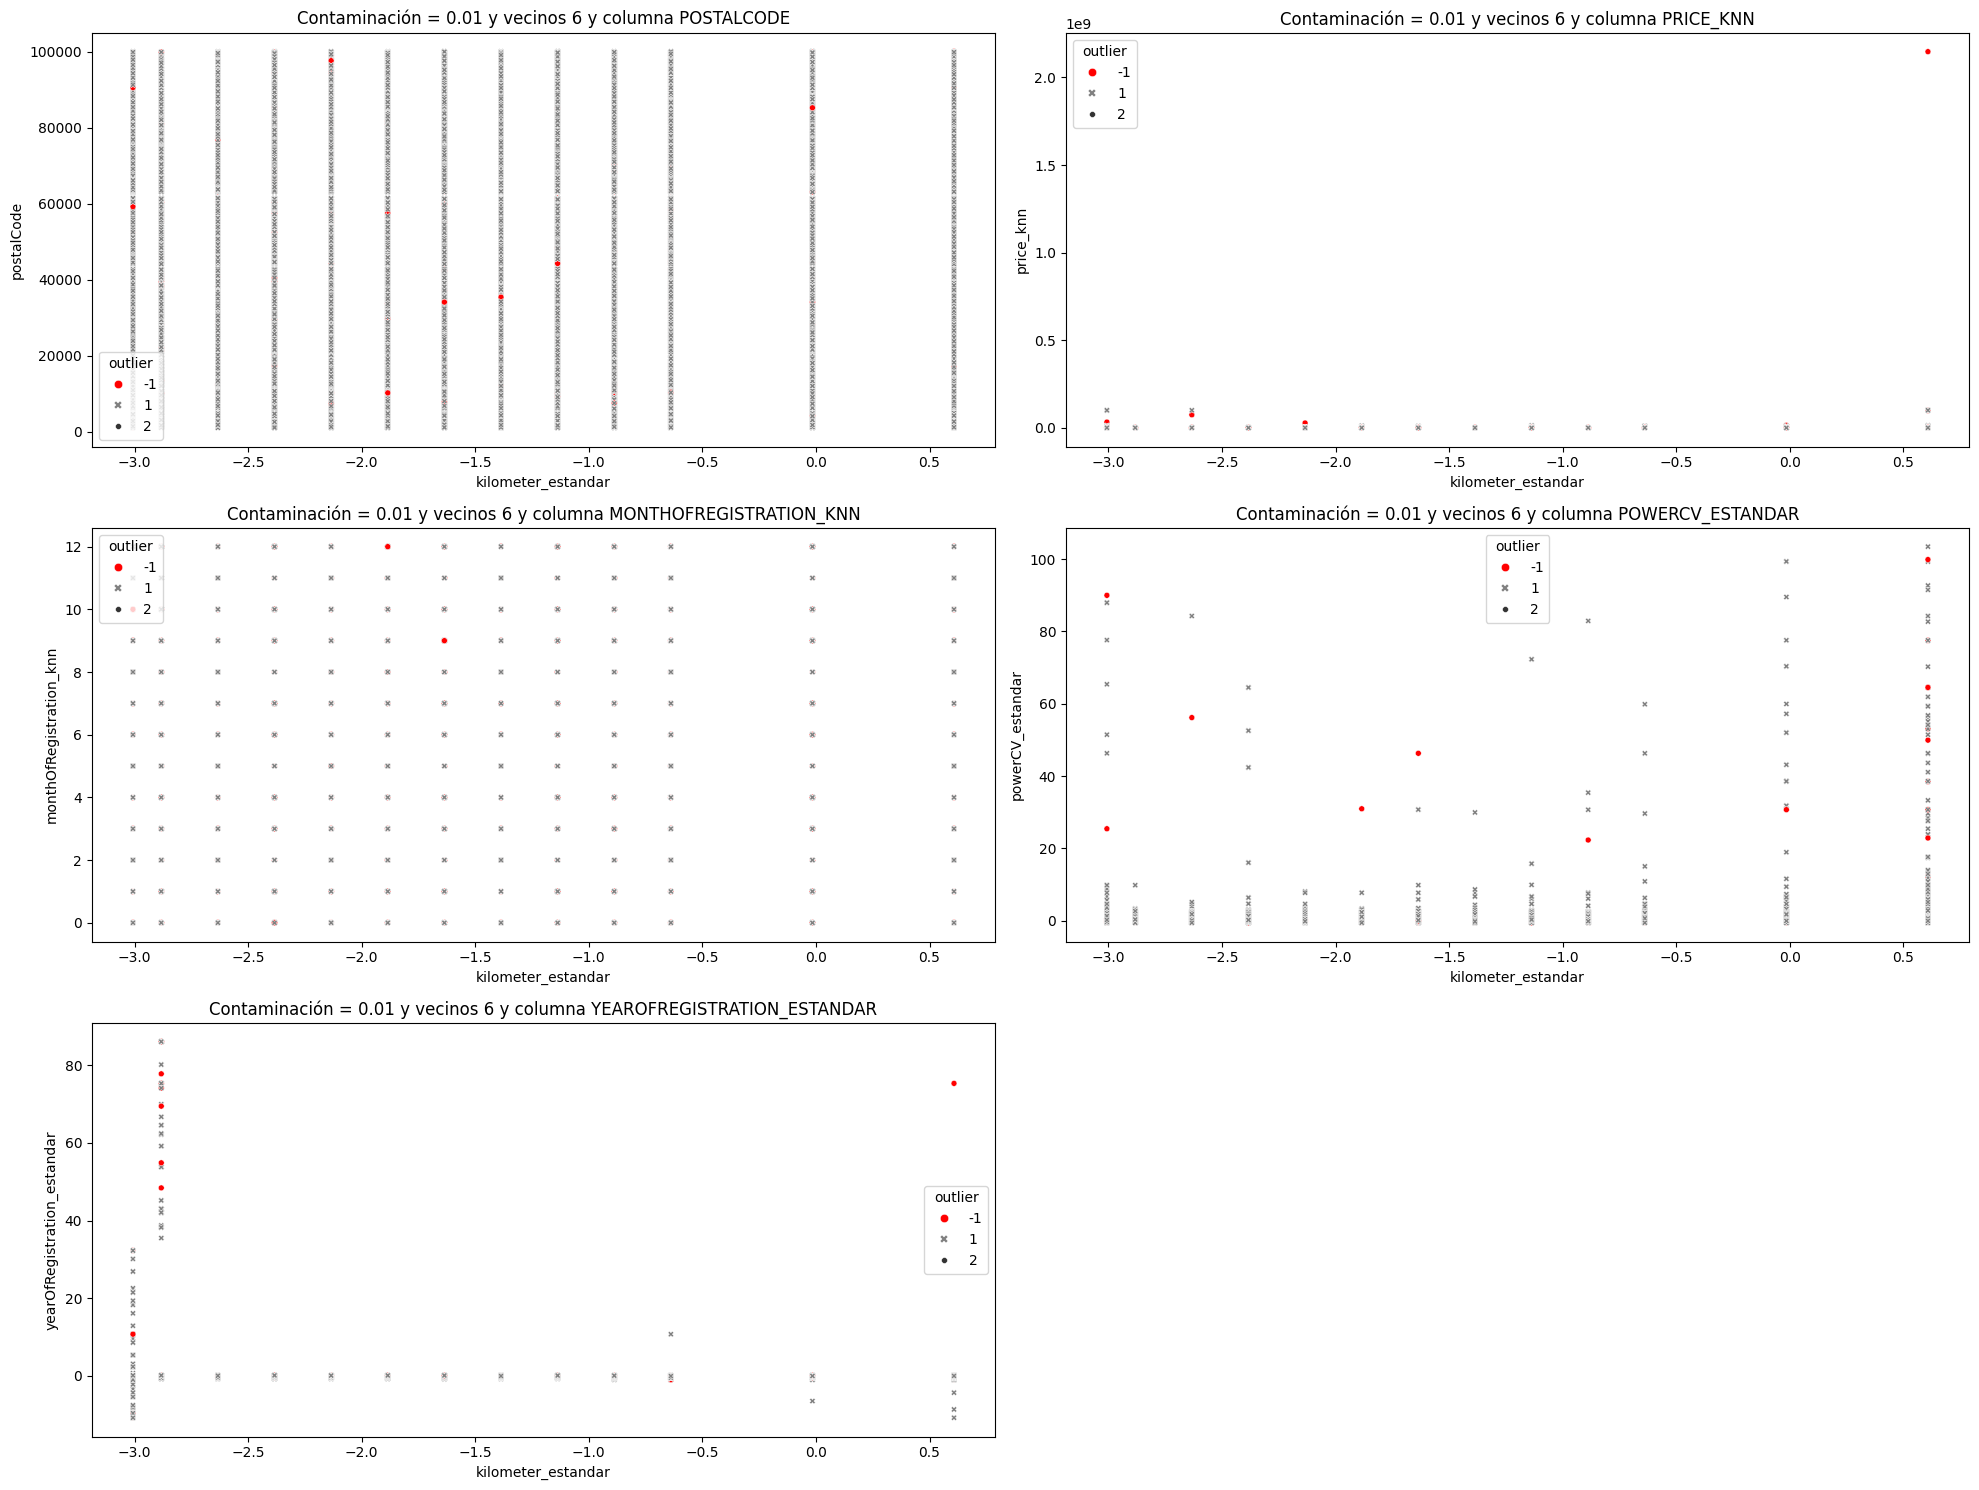

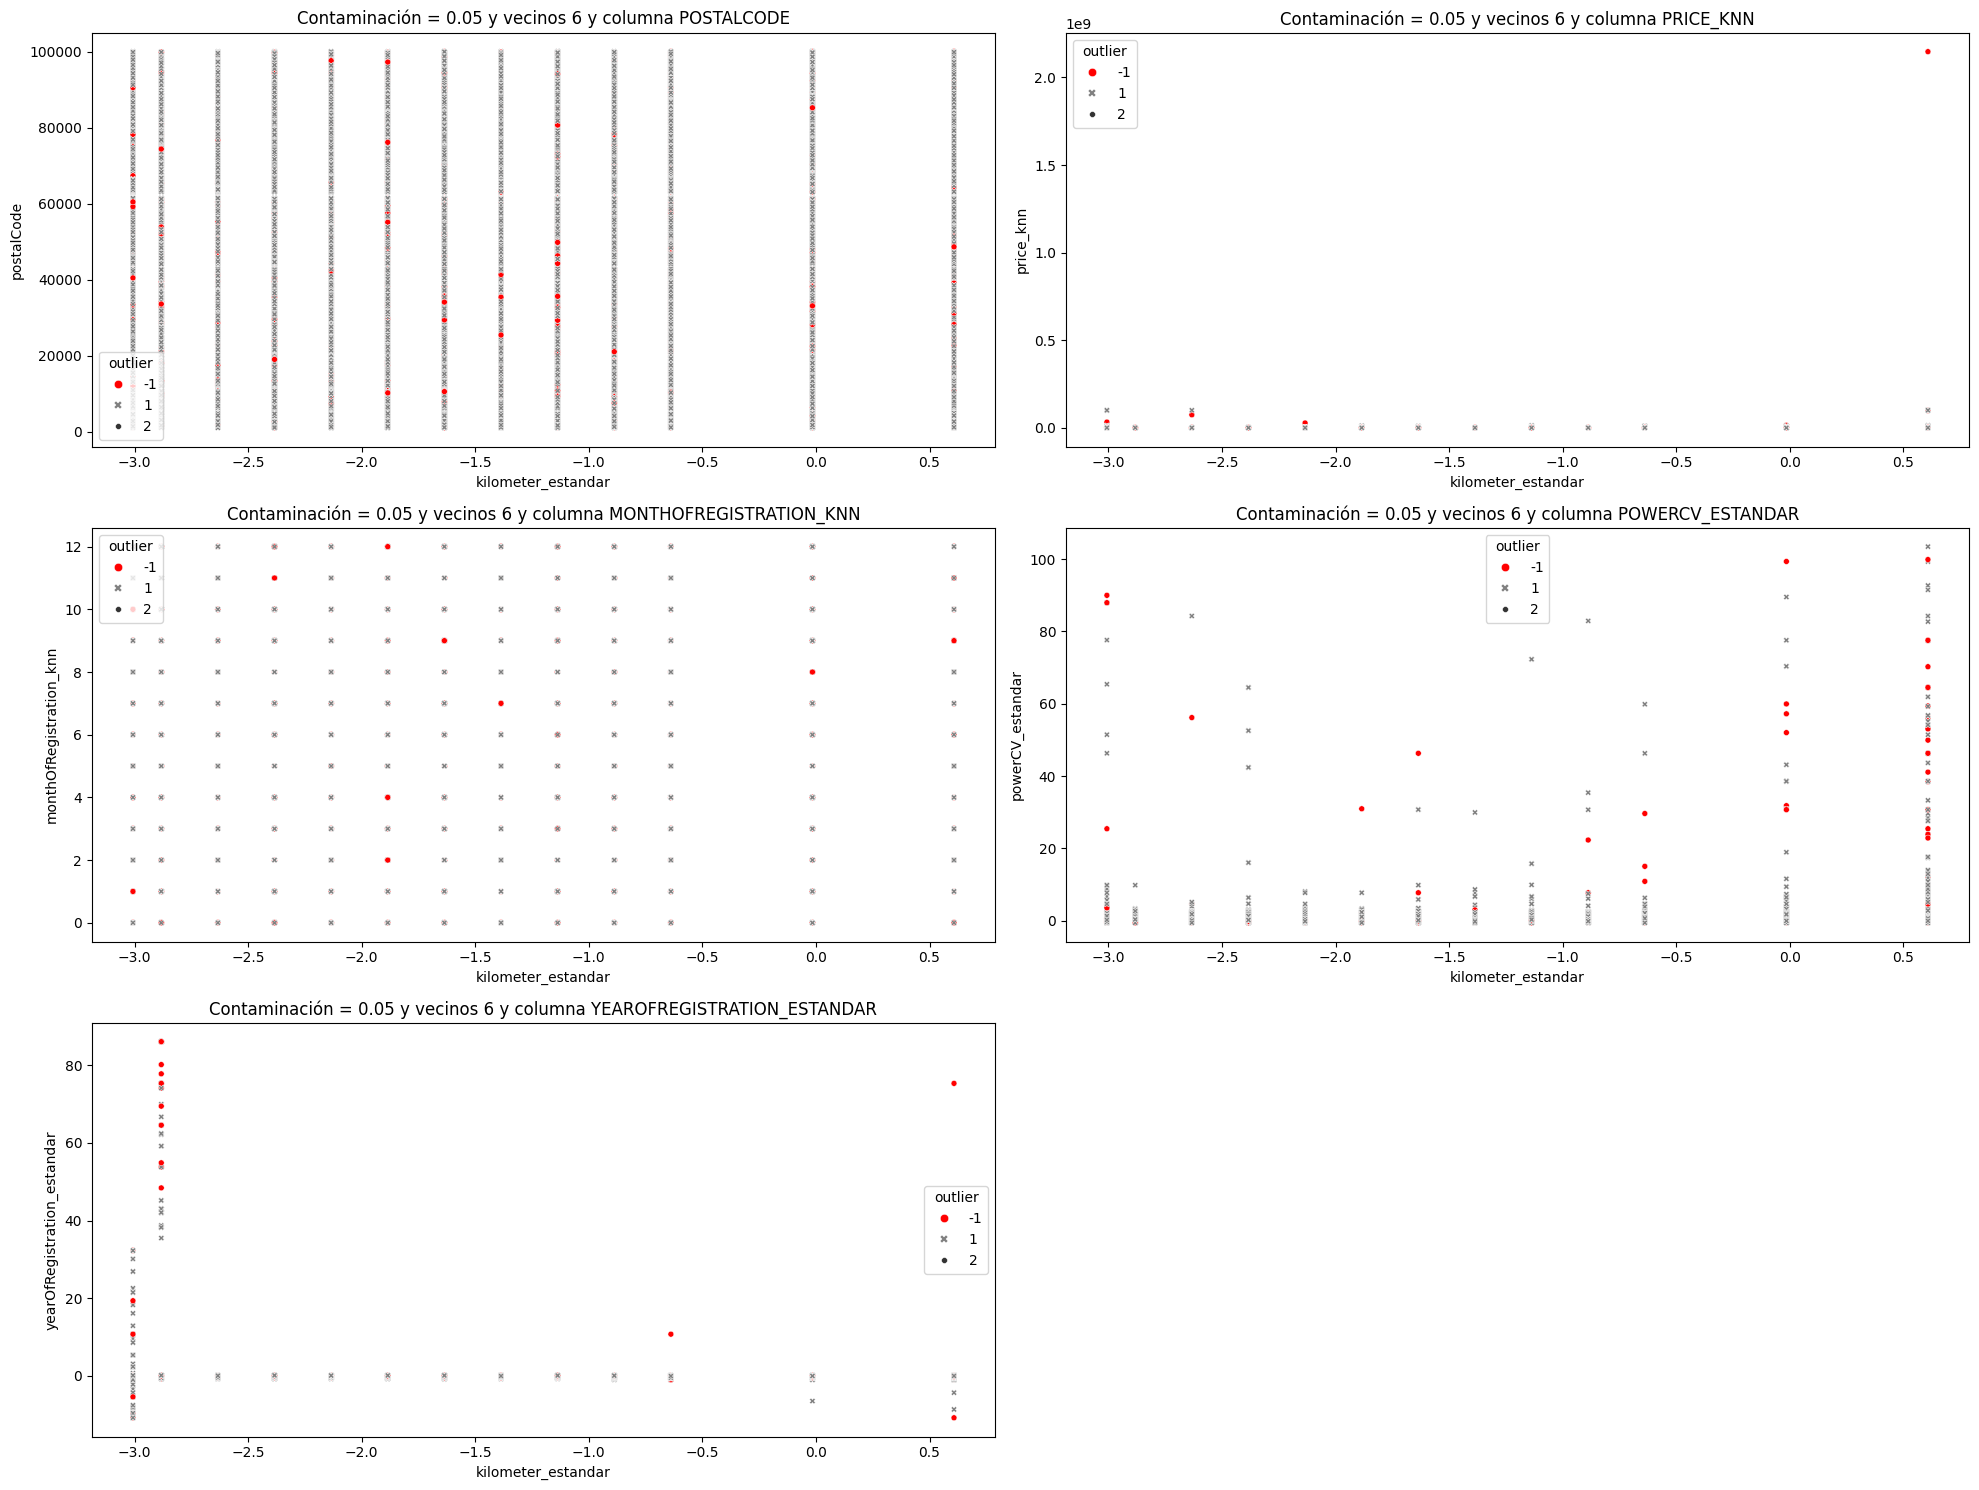

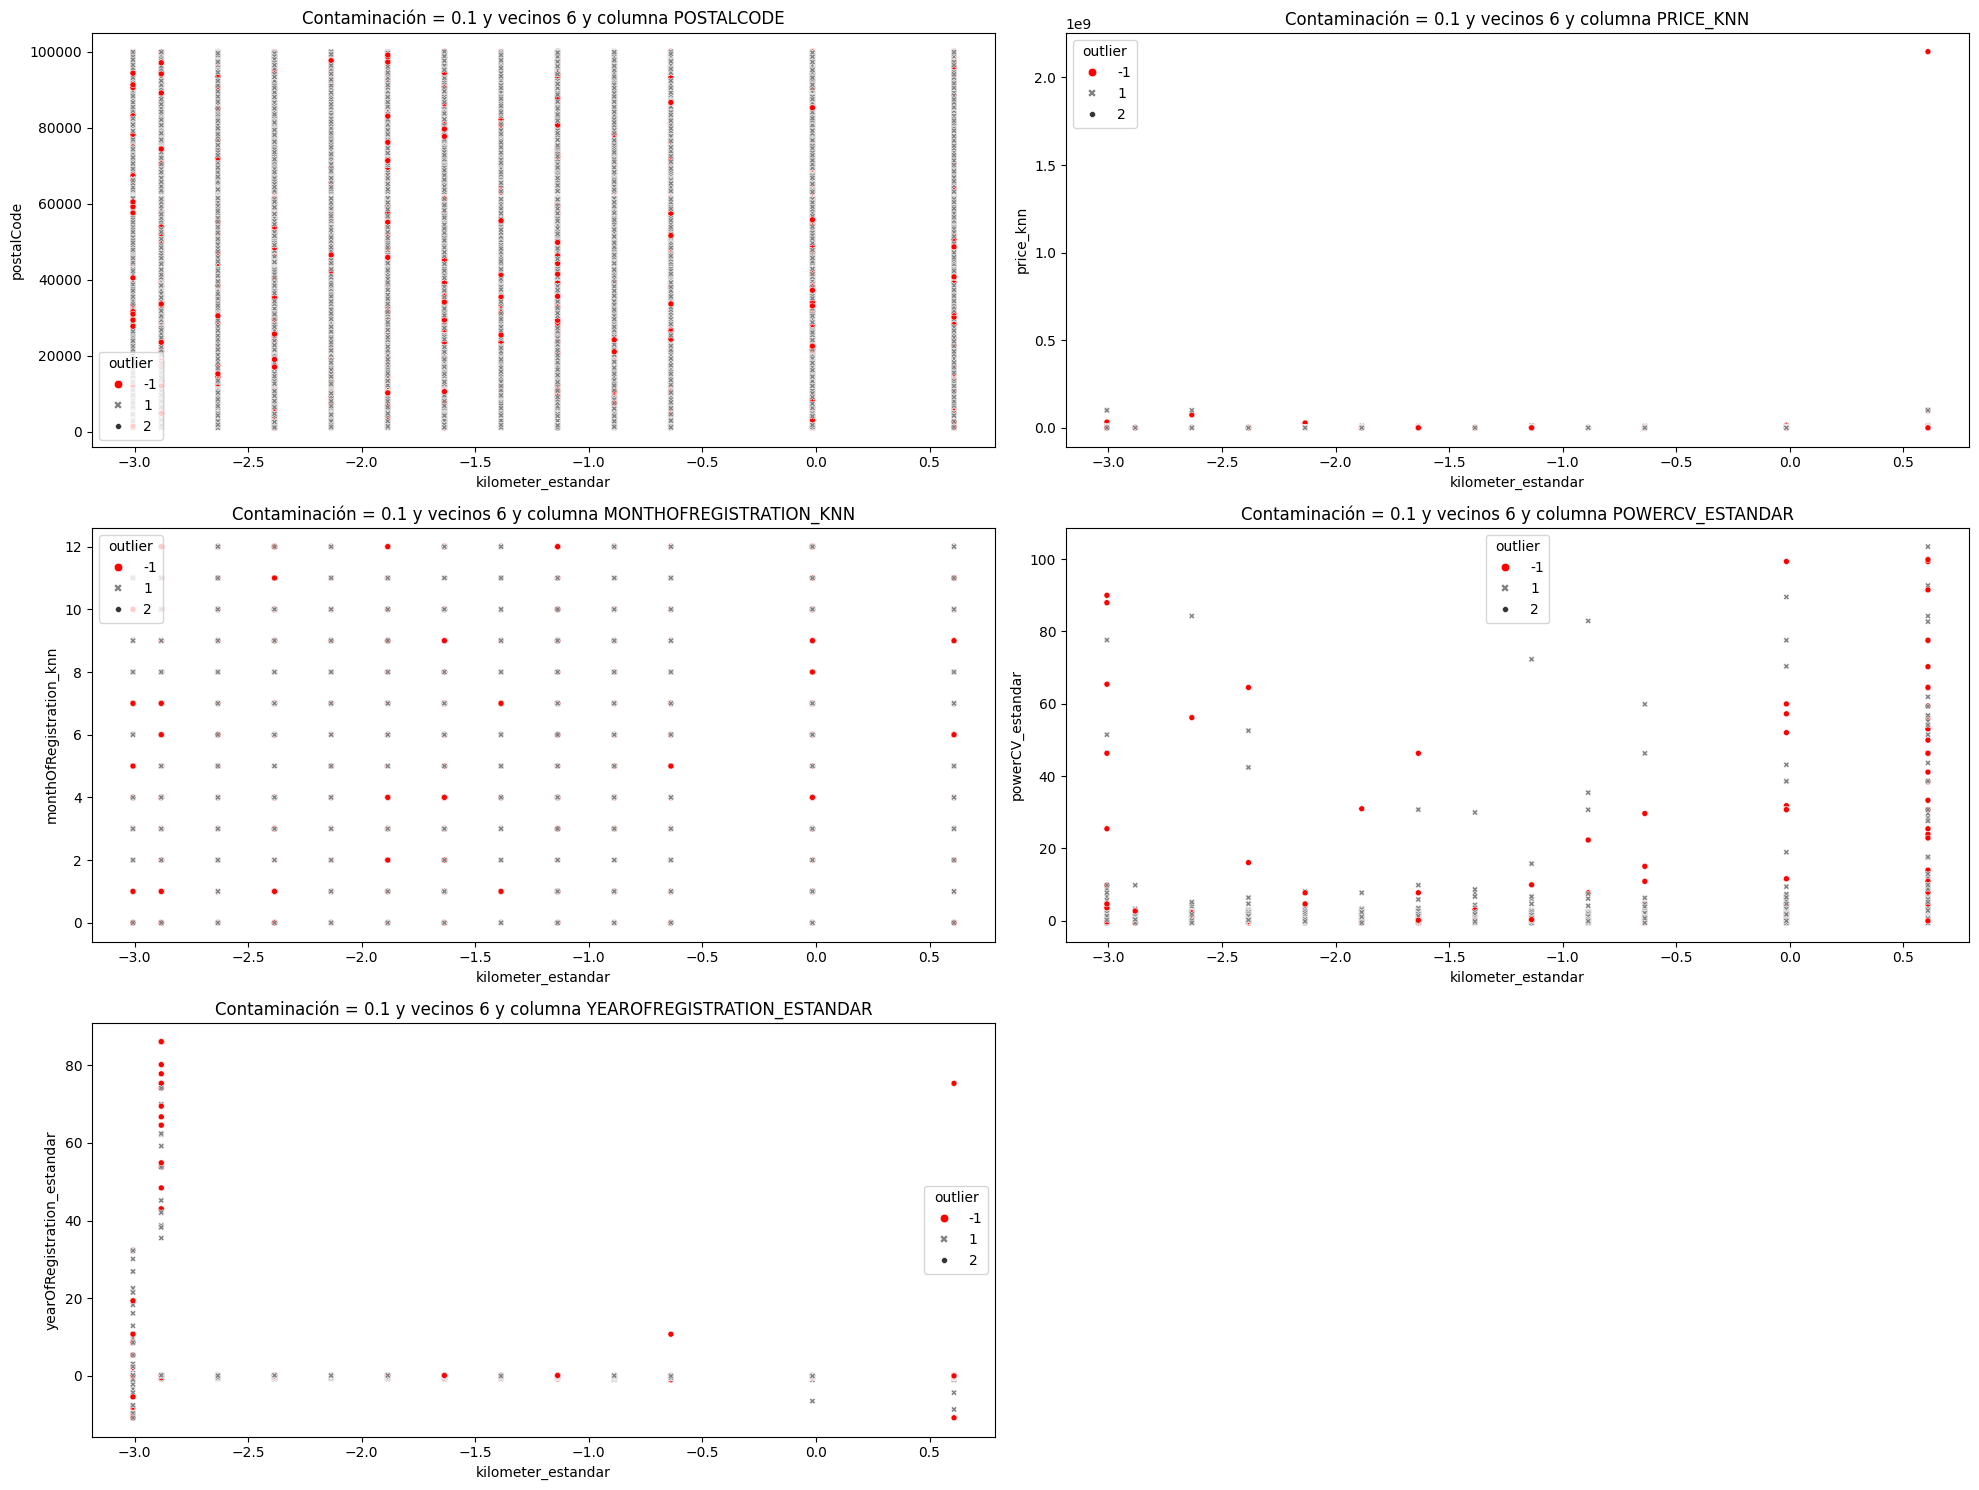

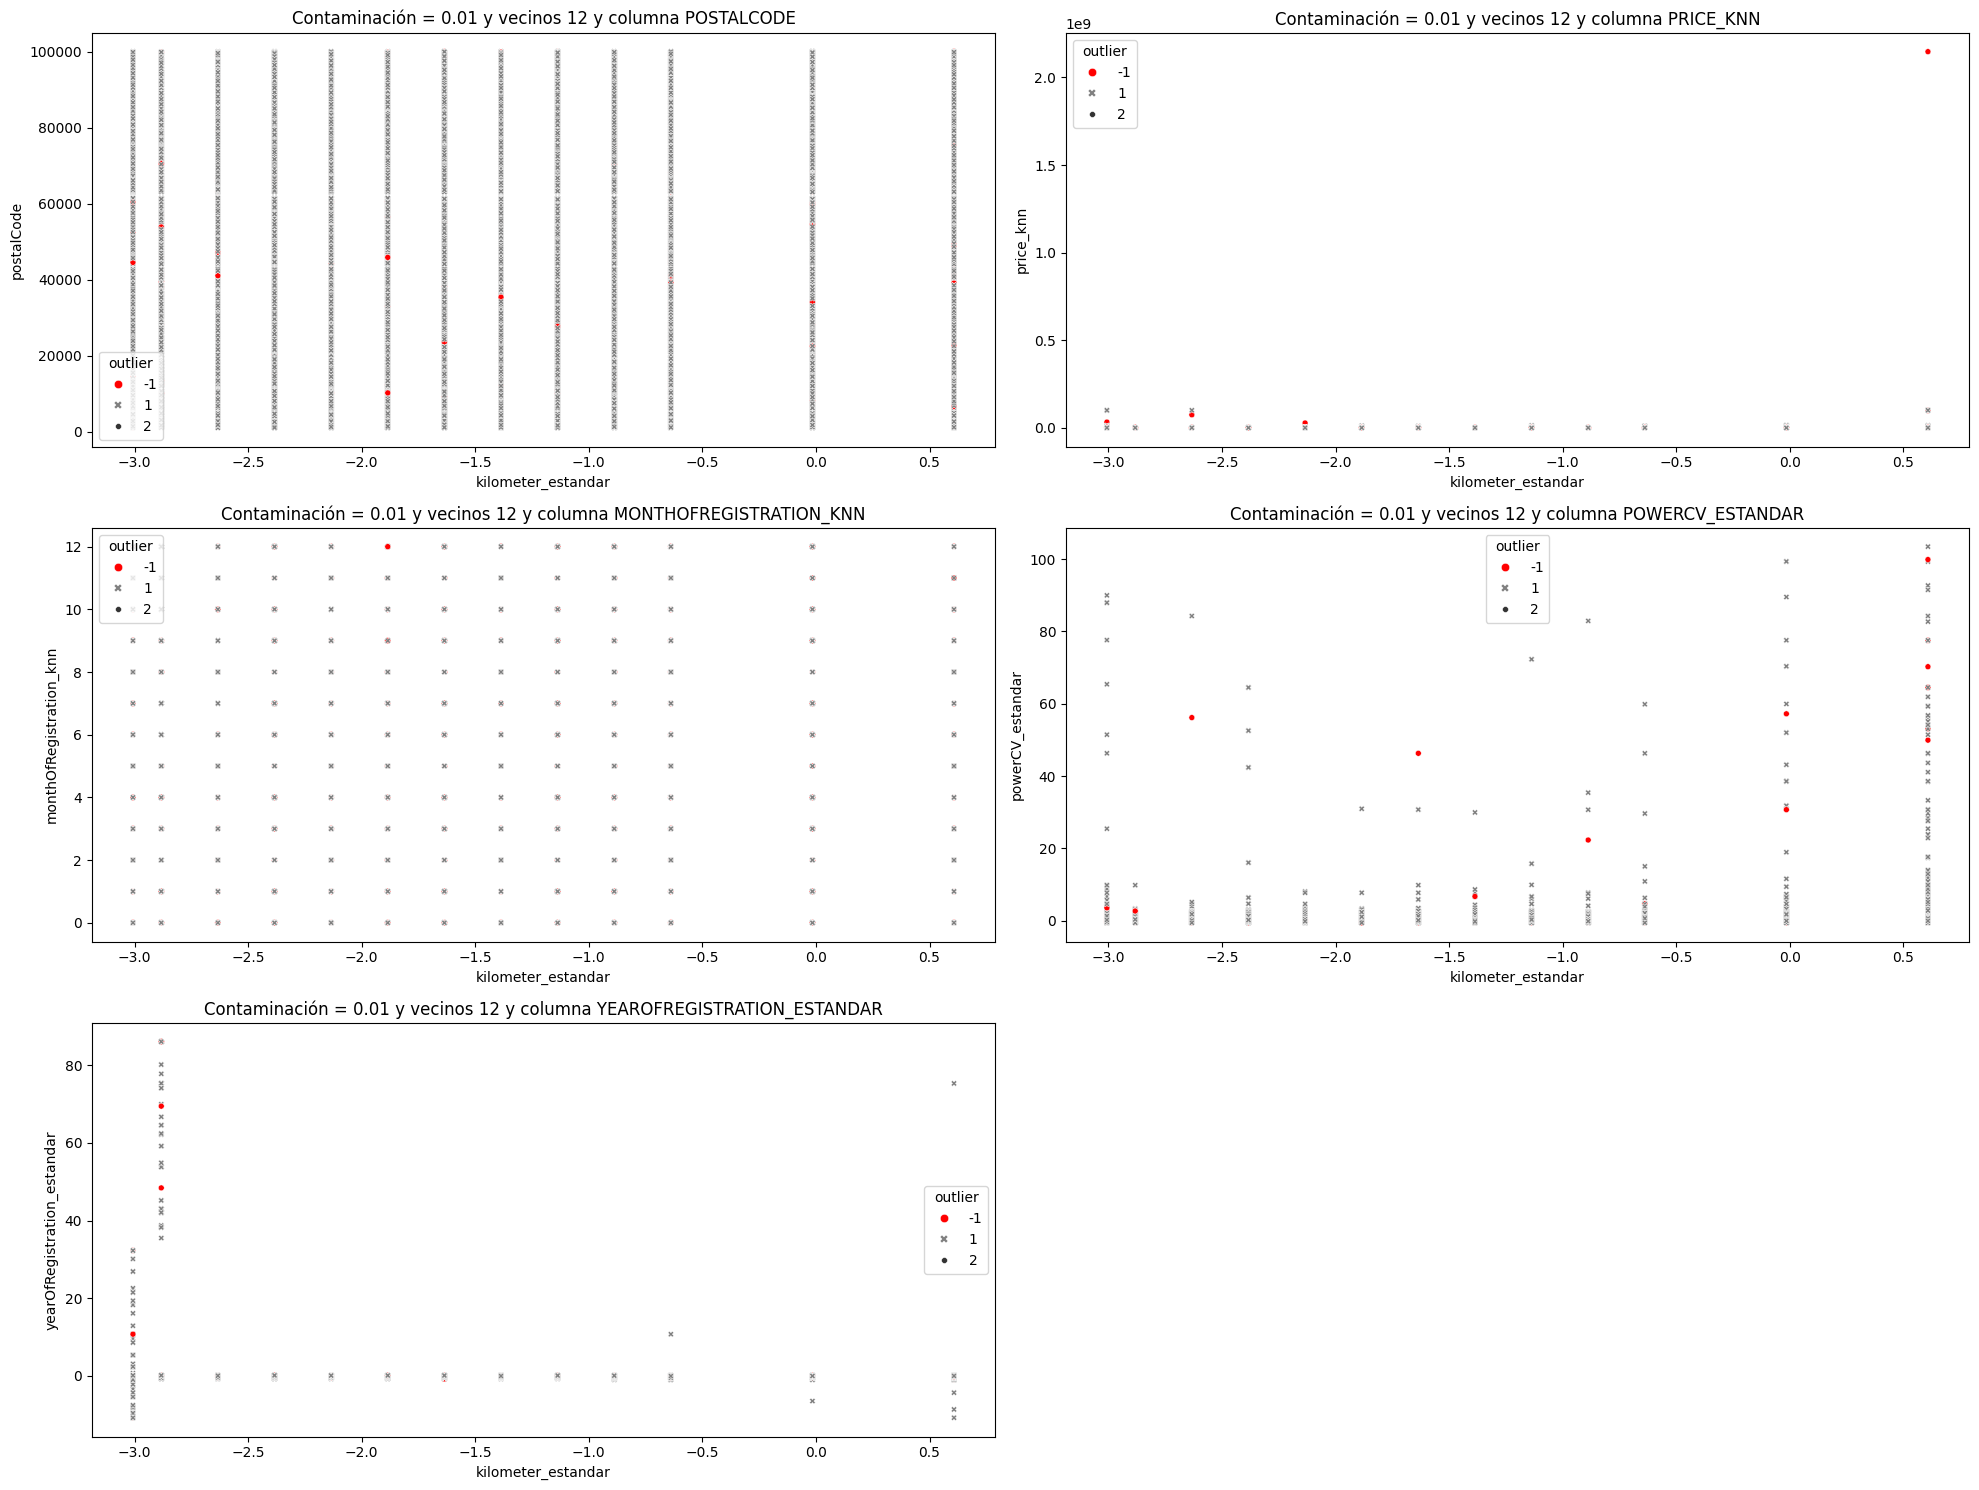

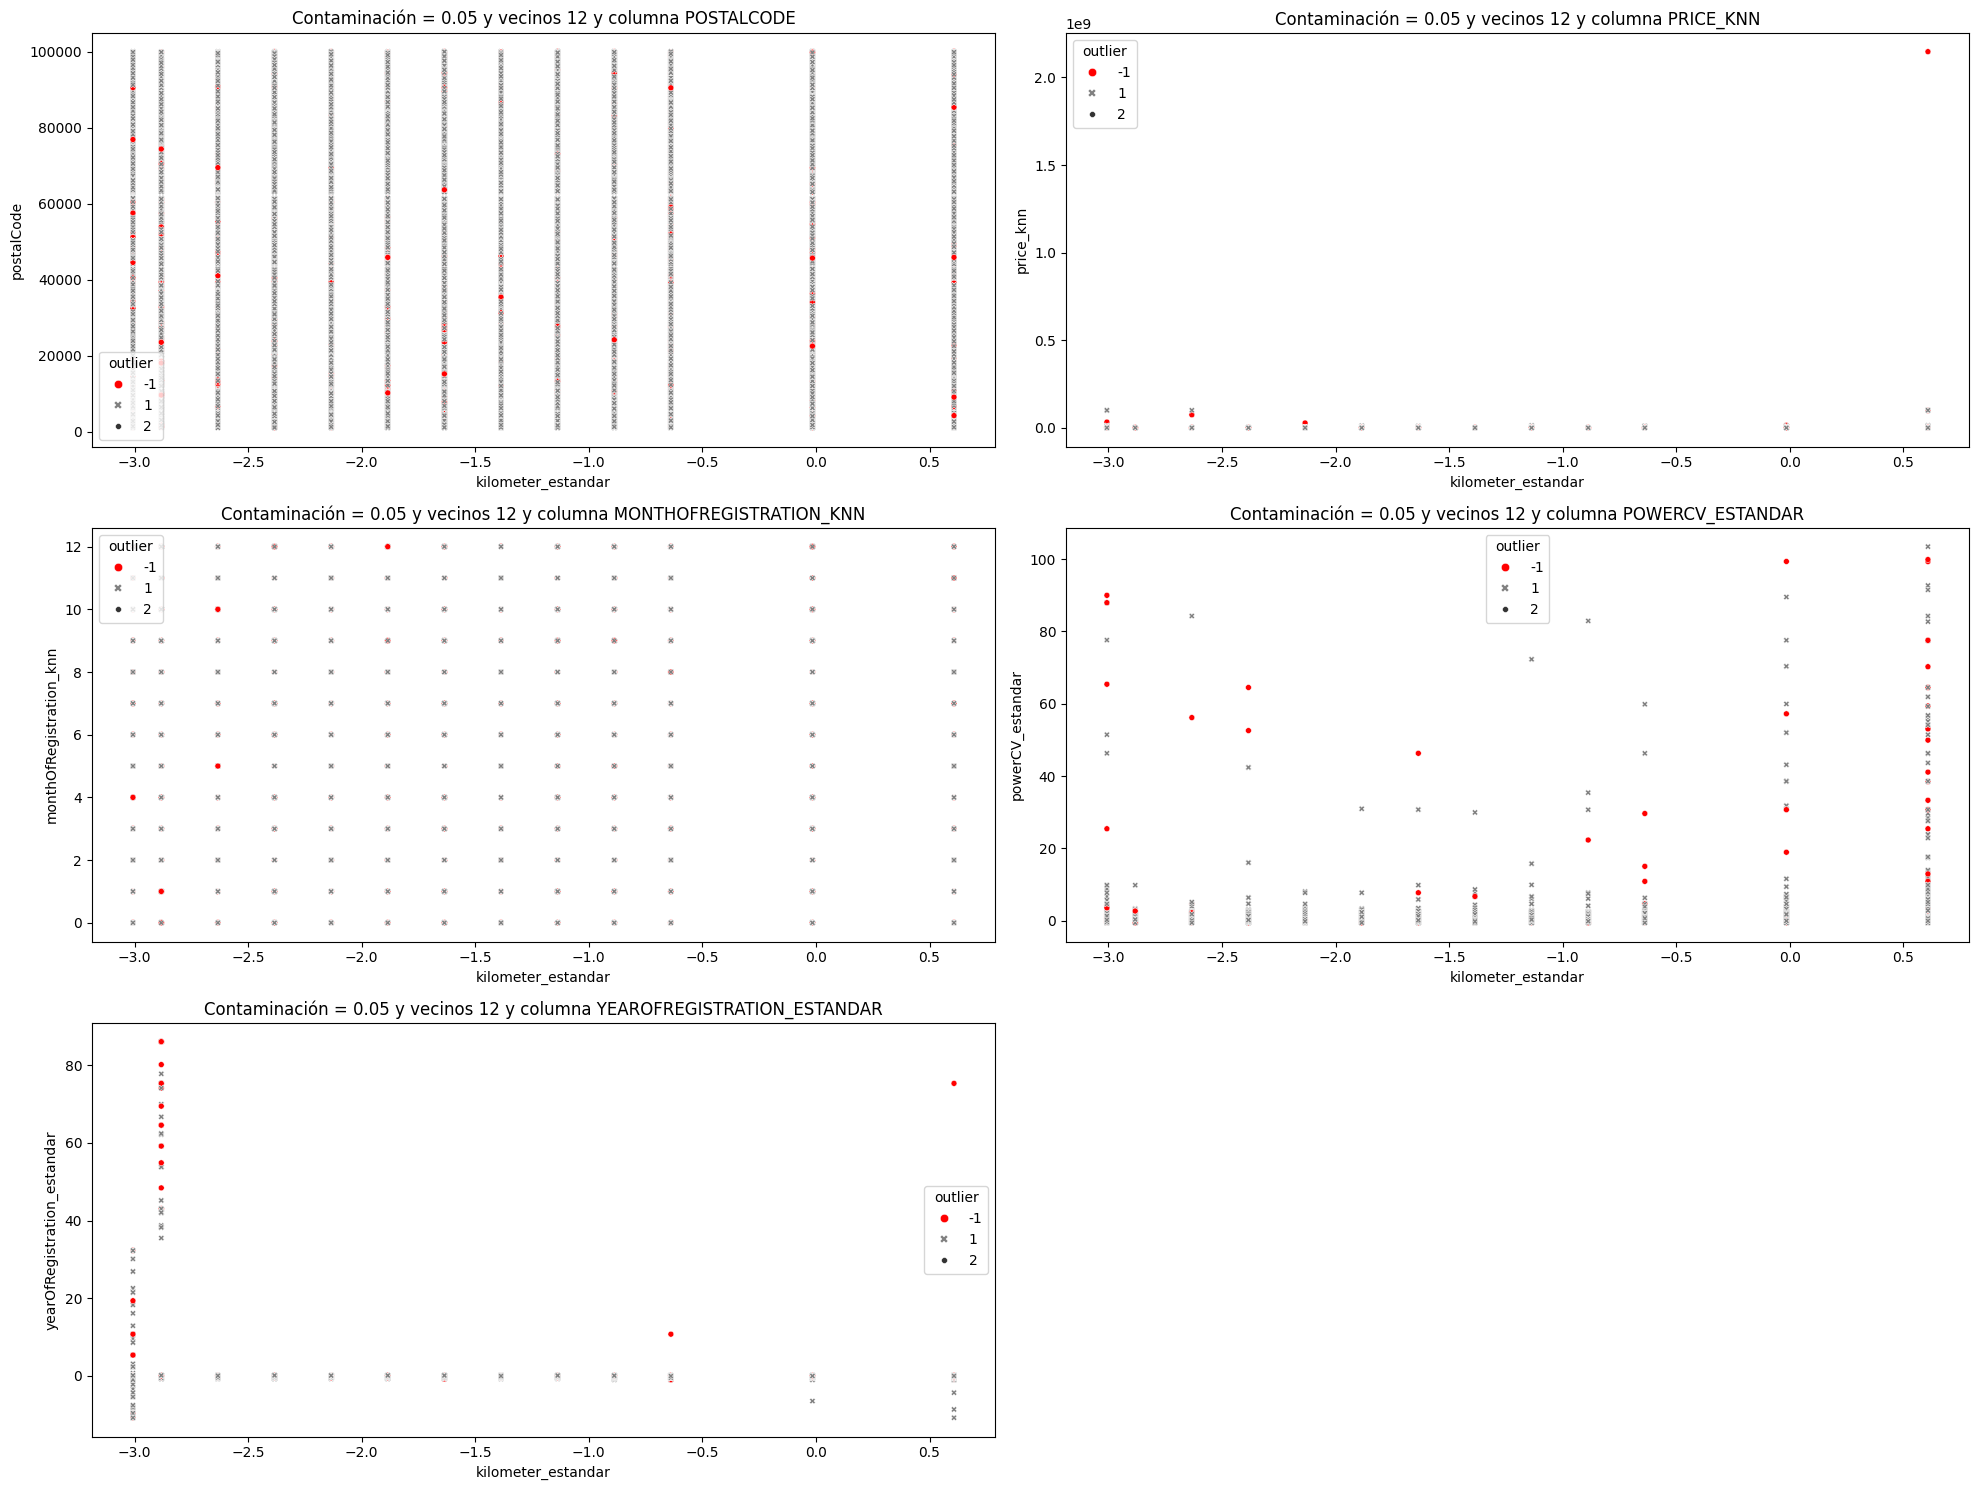

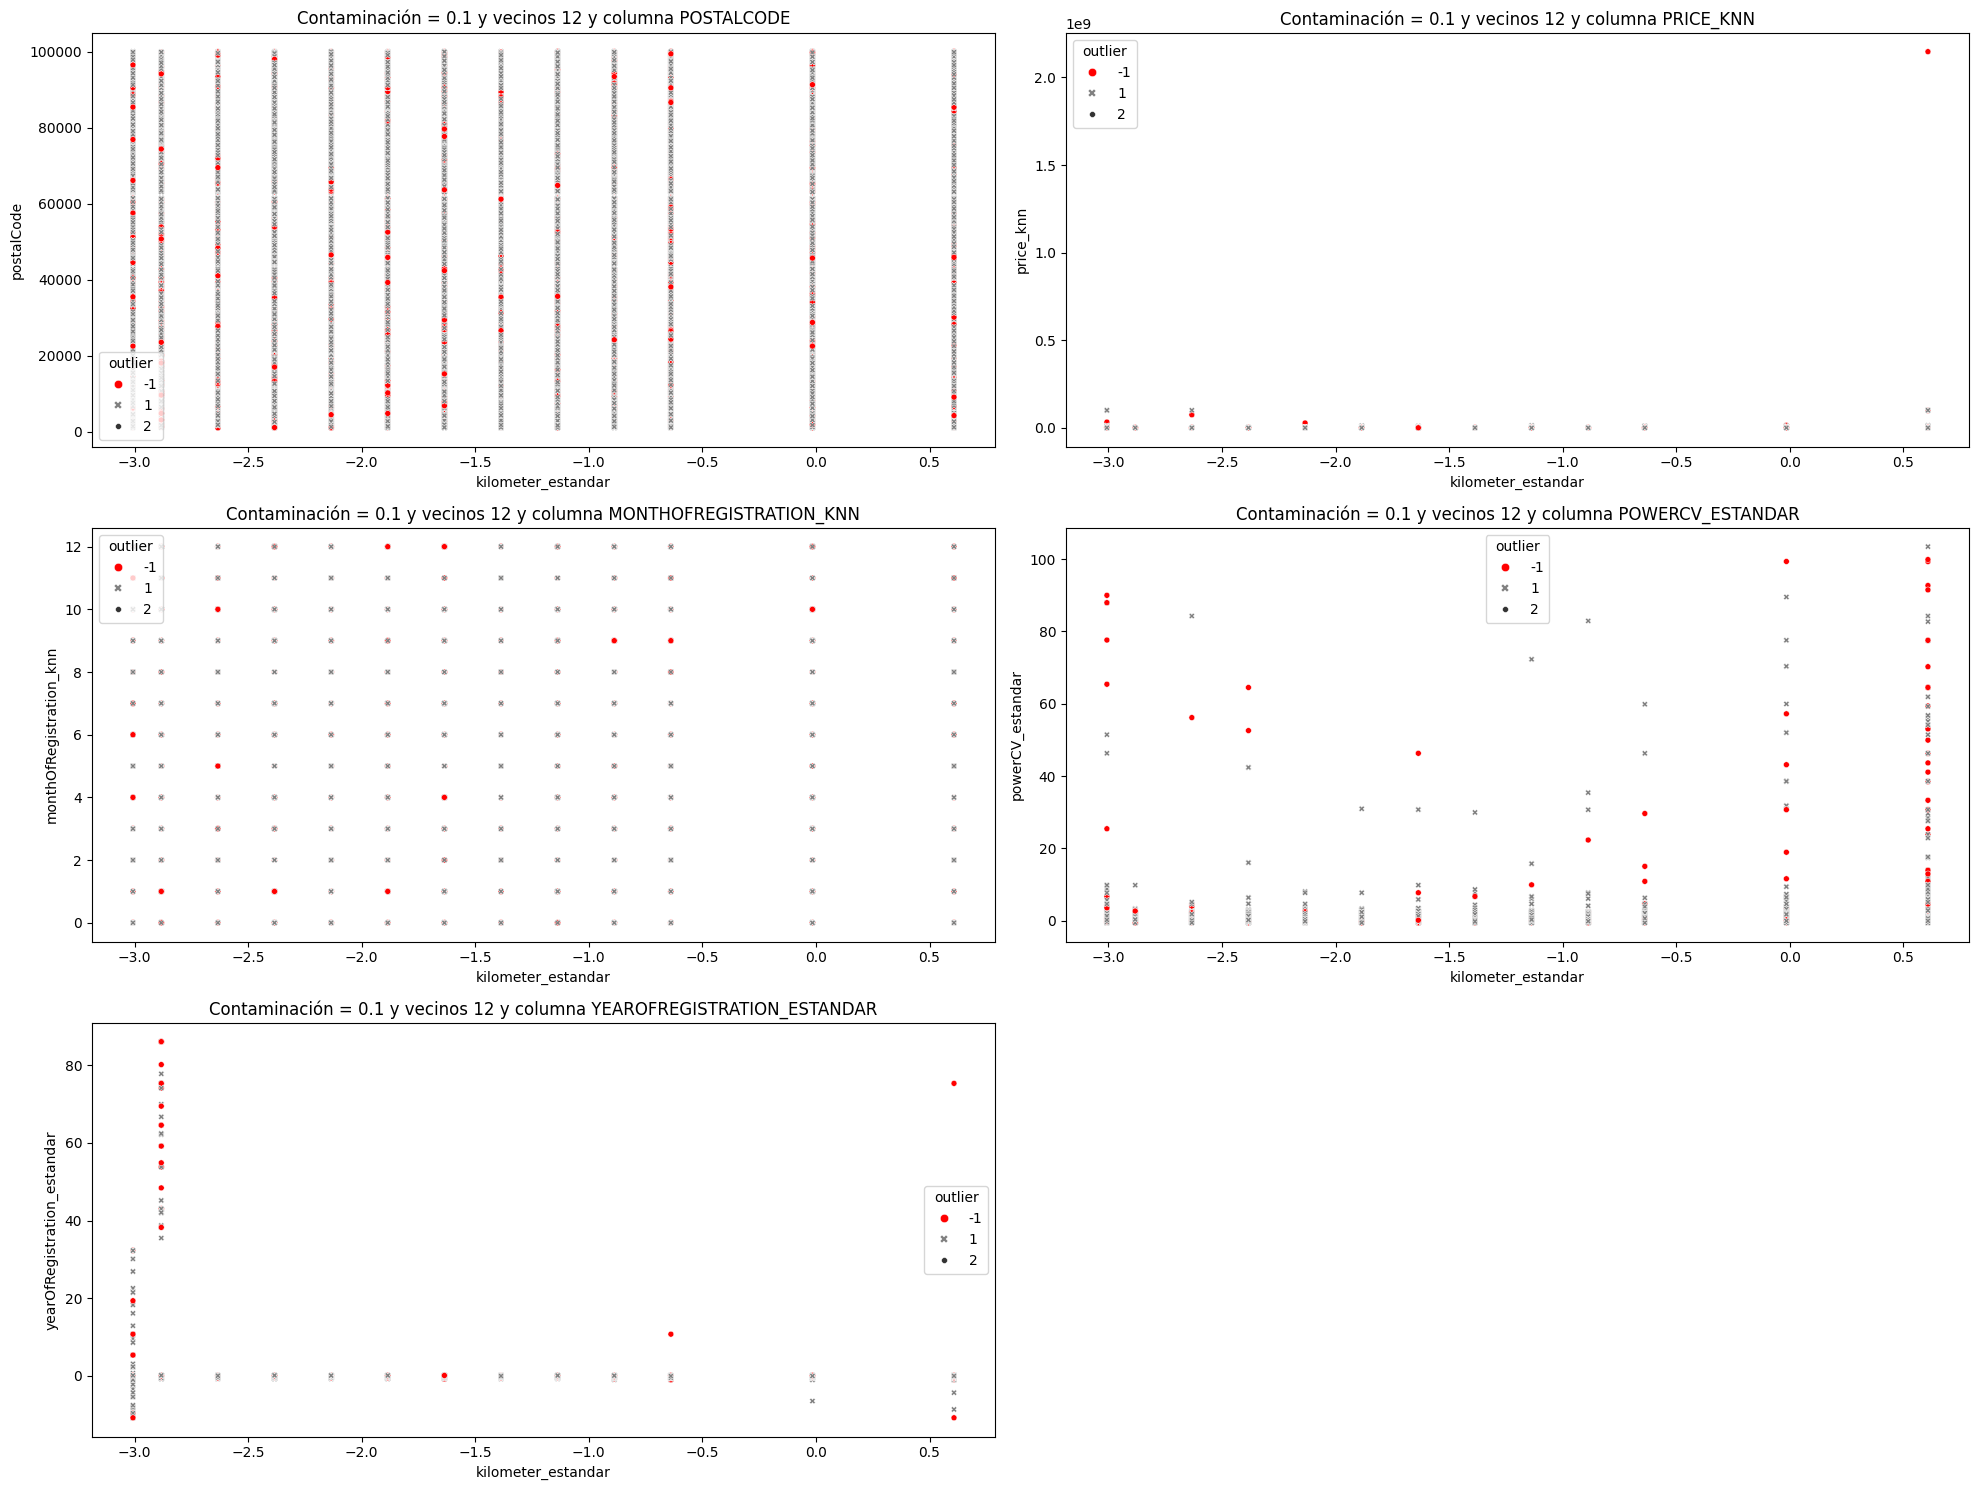

In [14]:
gestion_multi = so.GestionOutliersMultivariados(df)
gestion_multi.explorar_outliers_lof("kilometer_estandar")

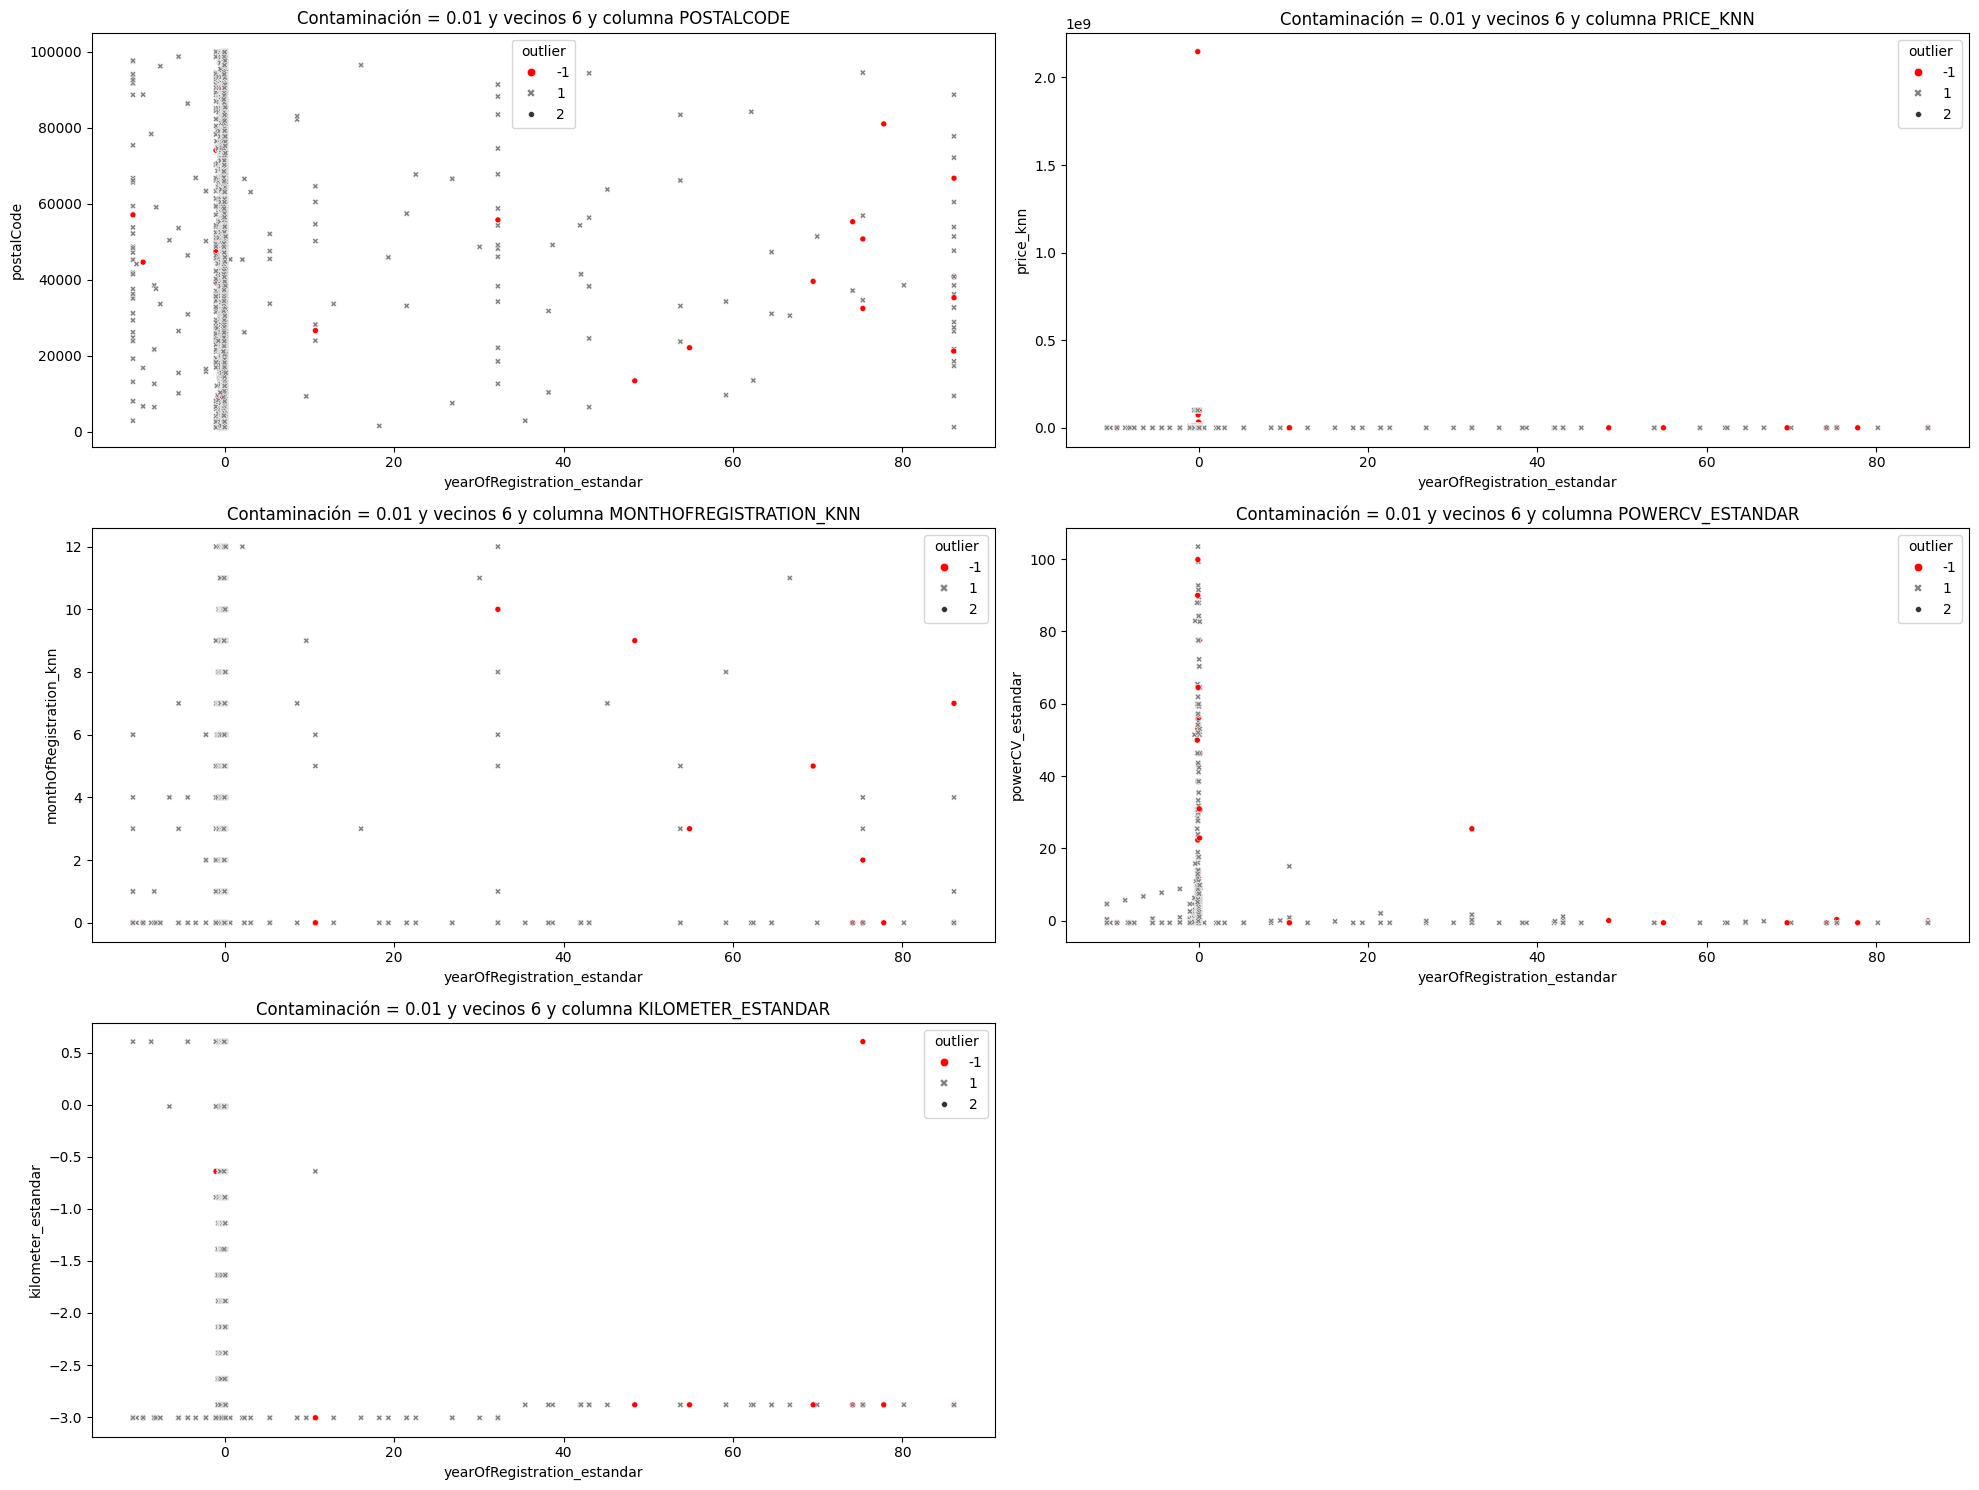

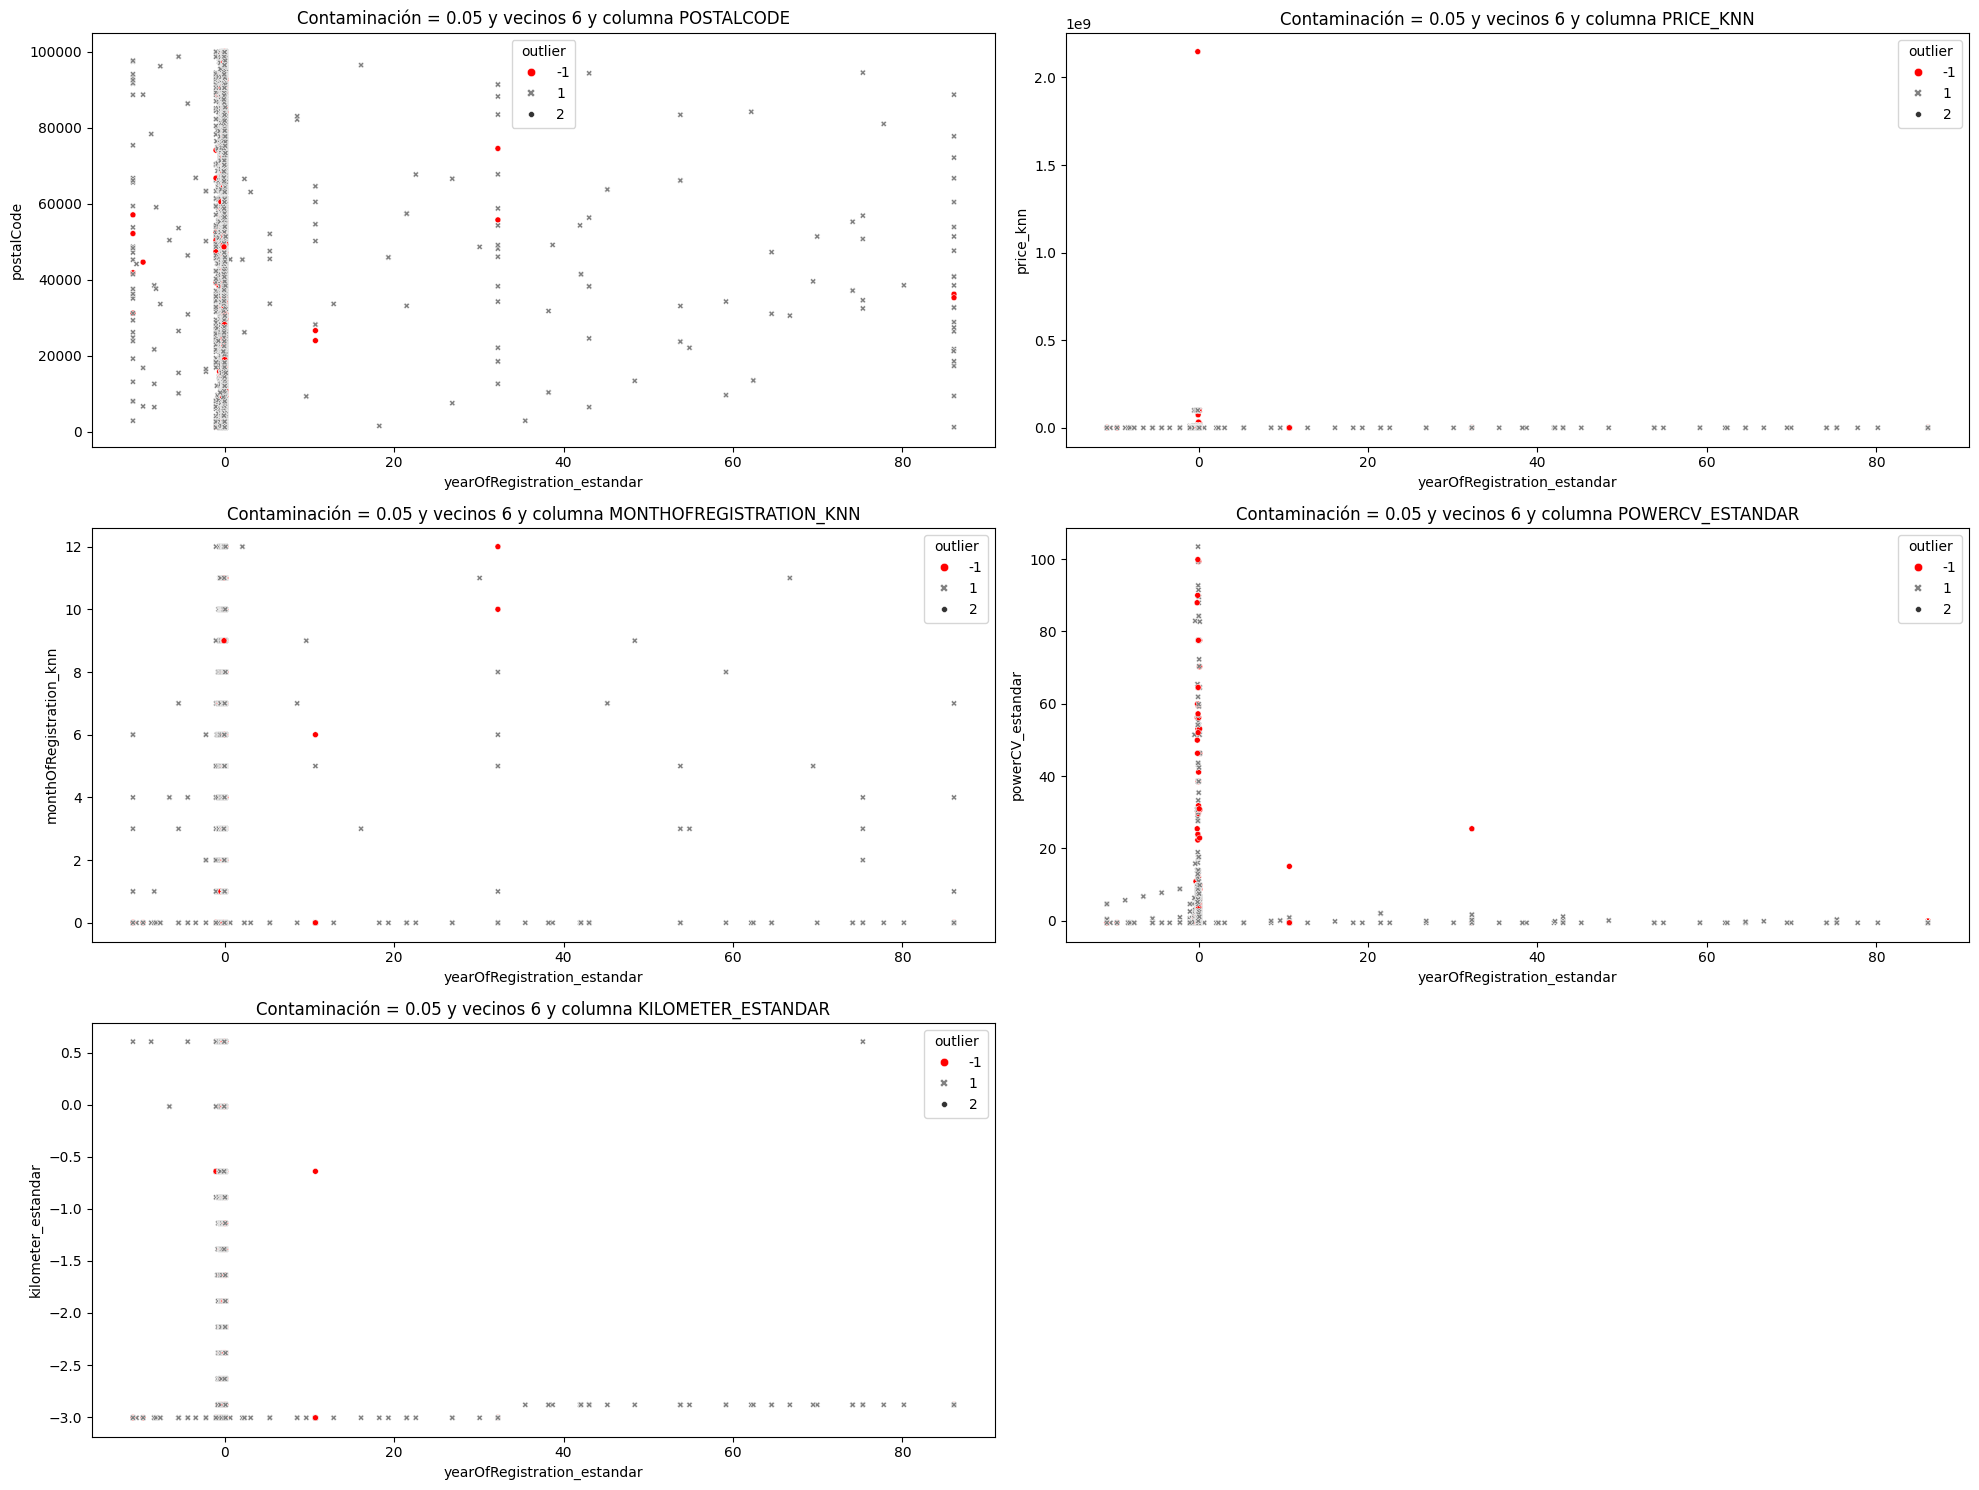

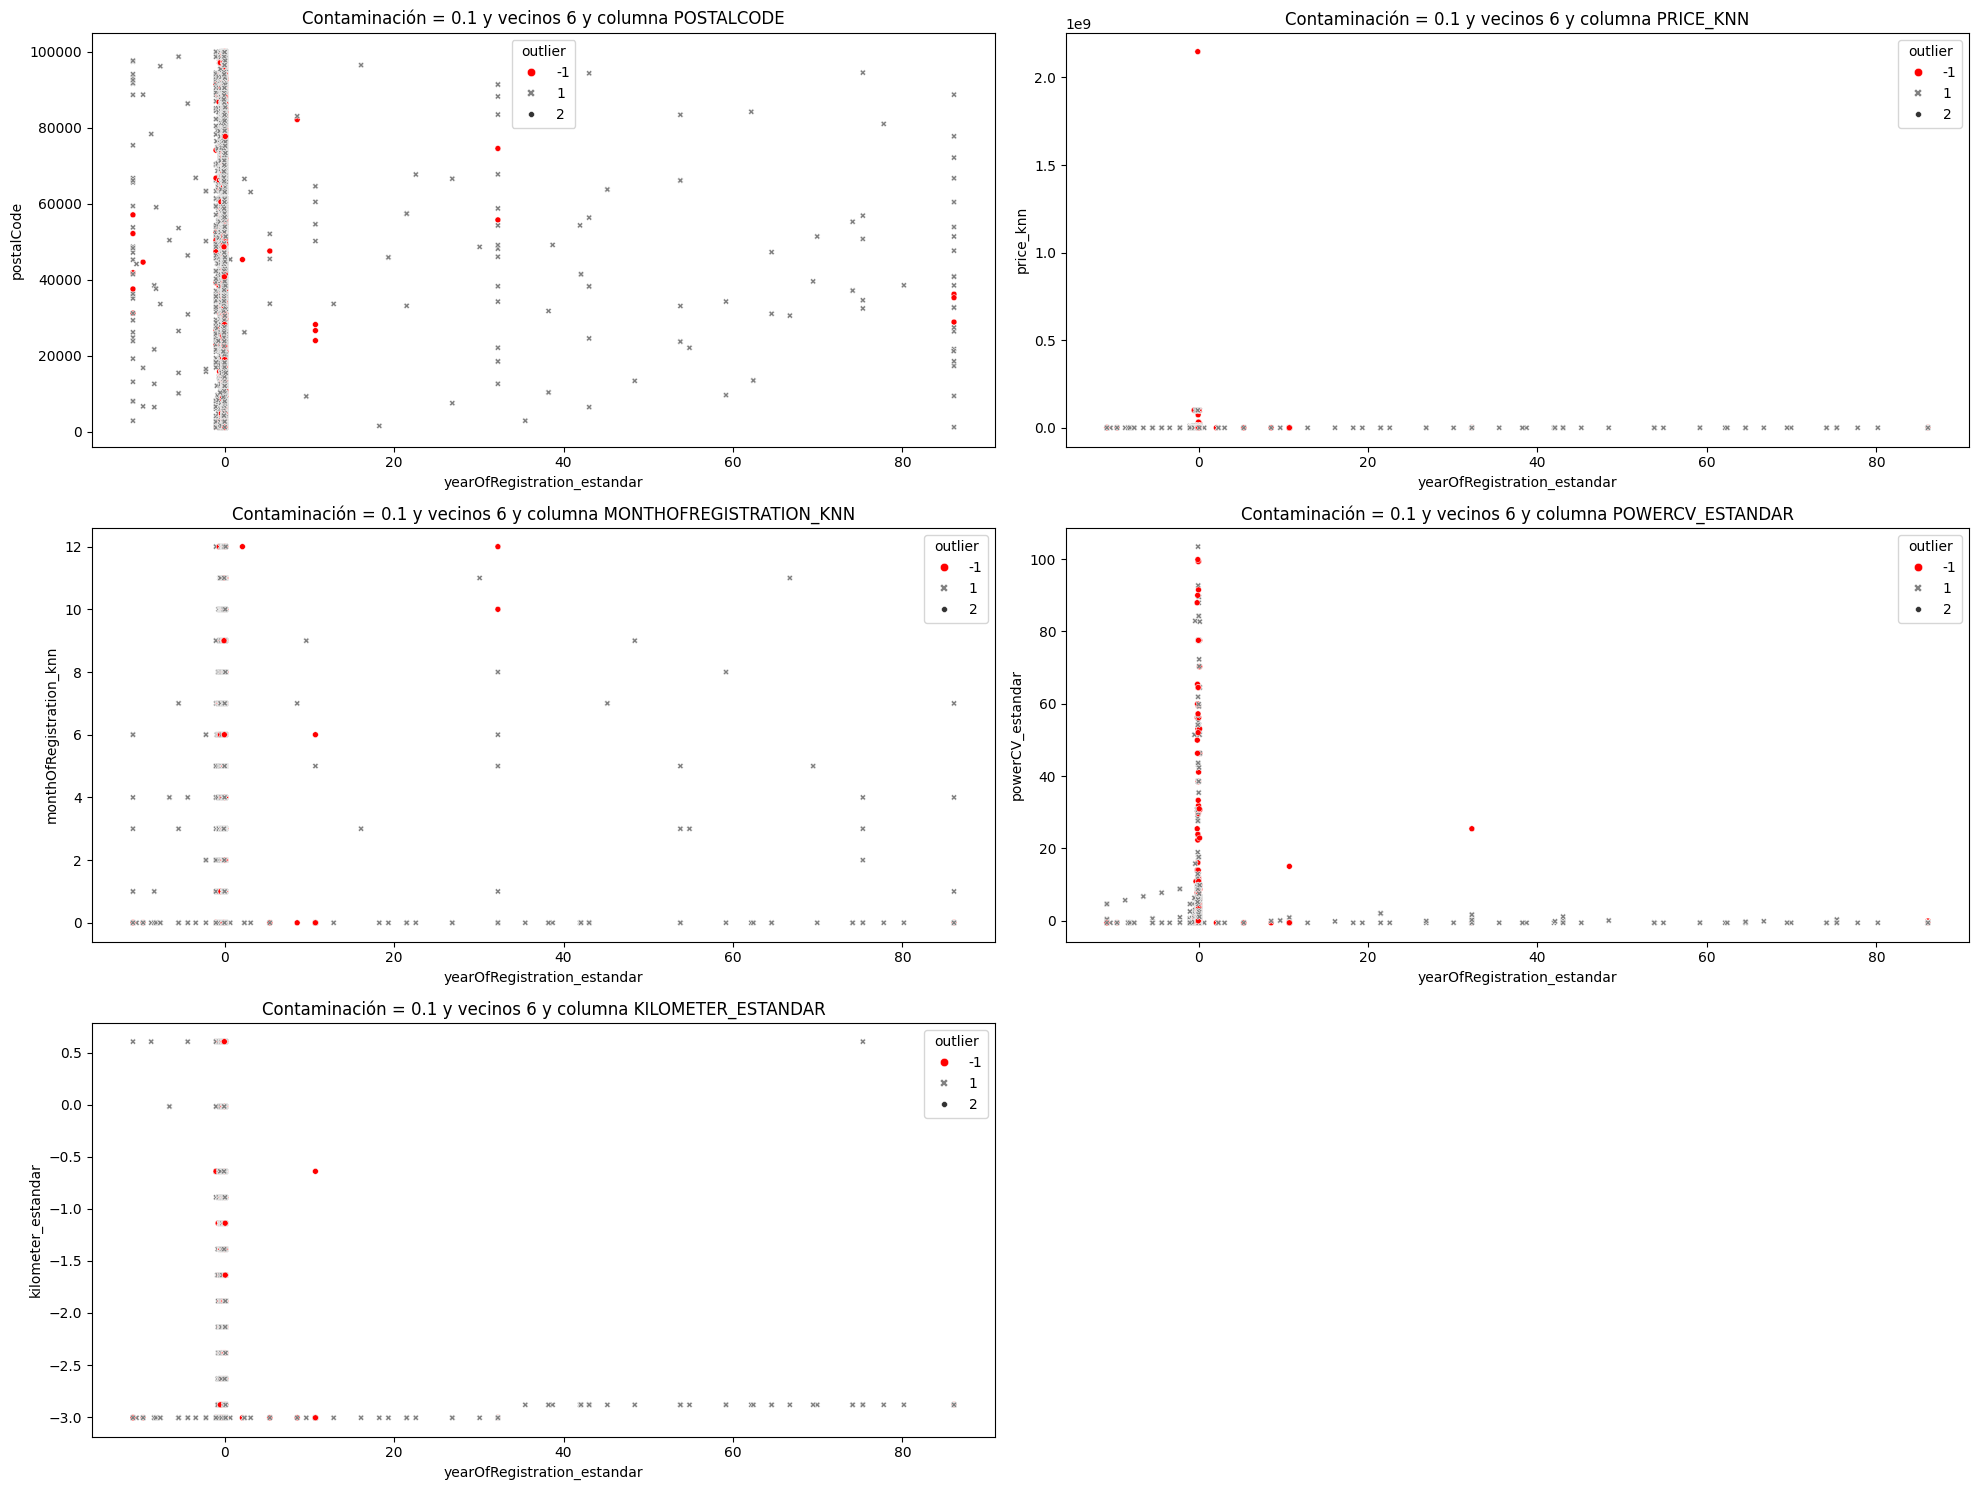

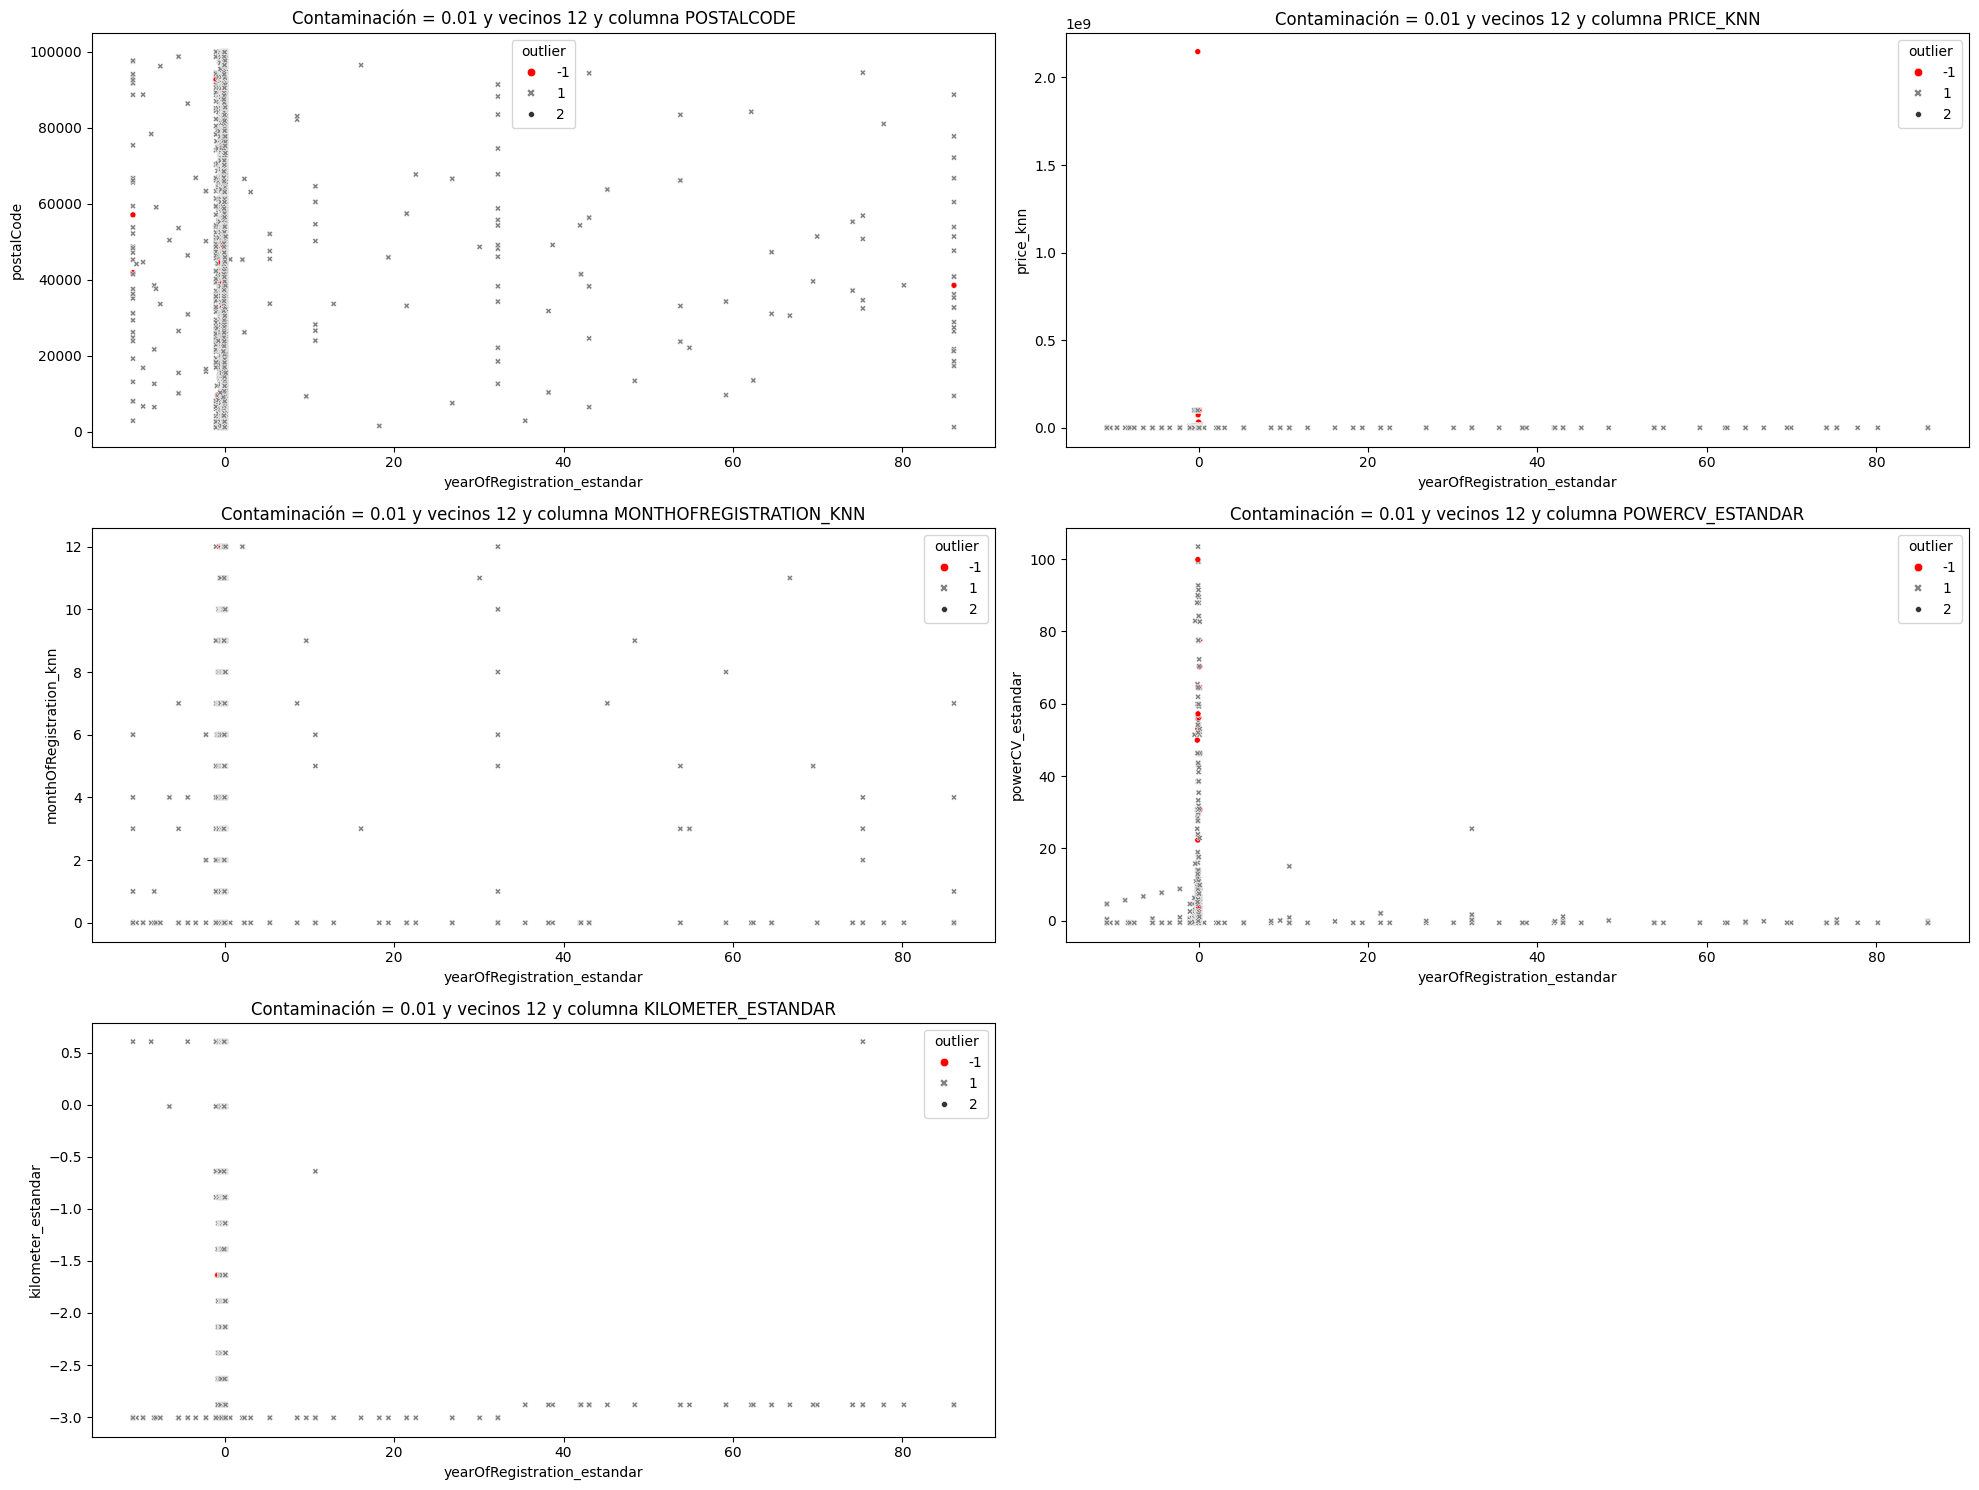

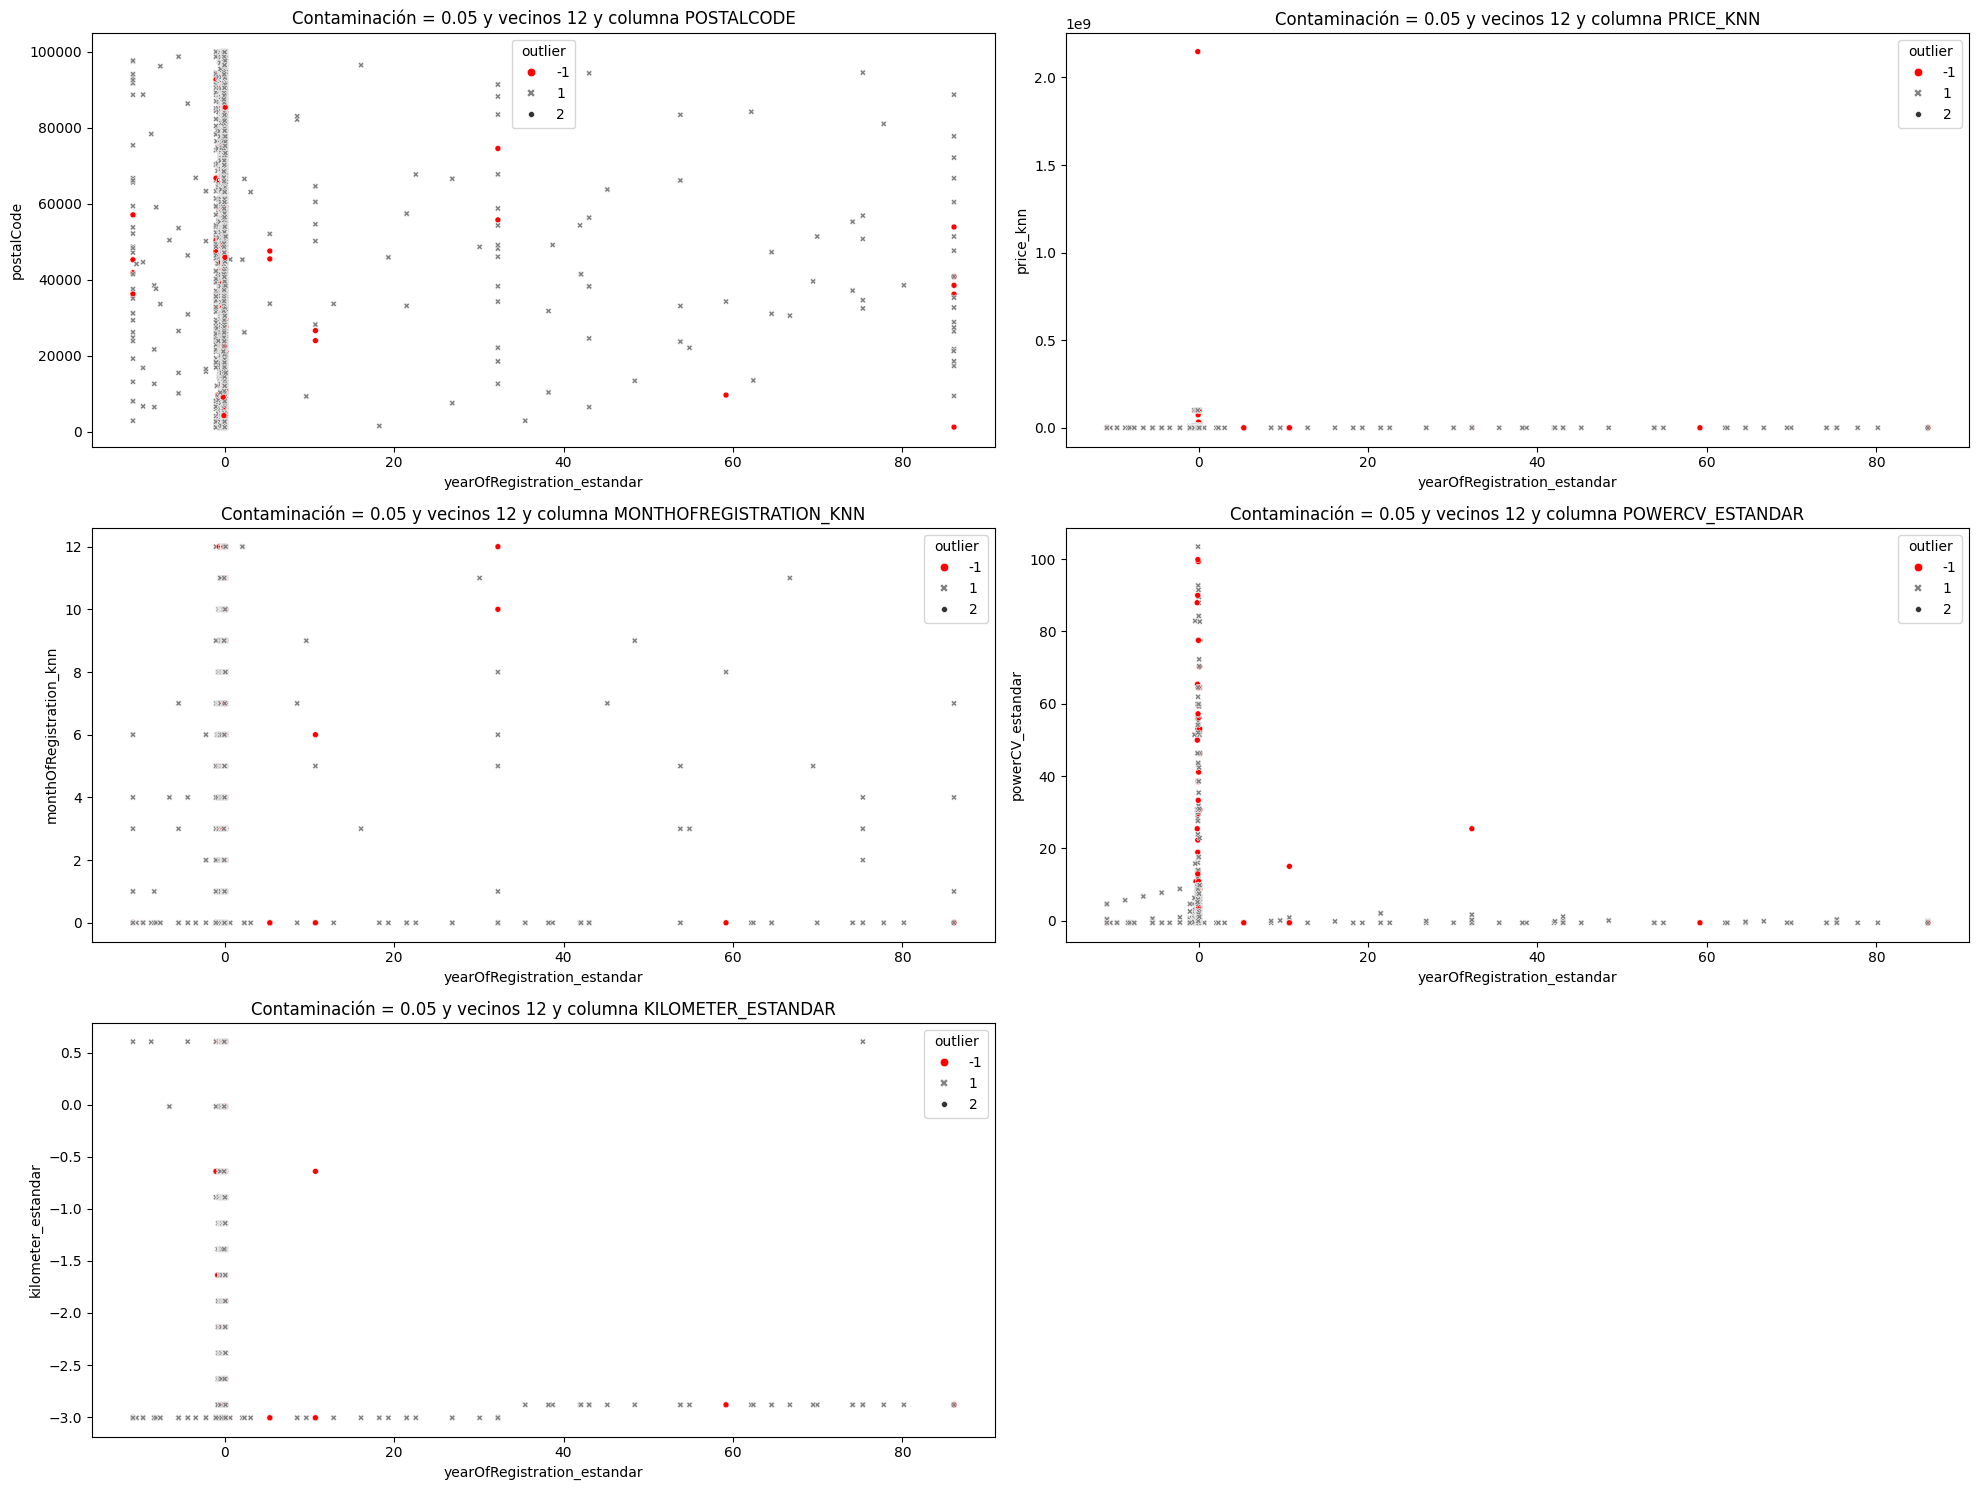

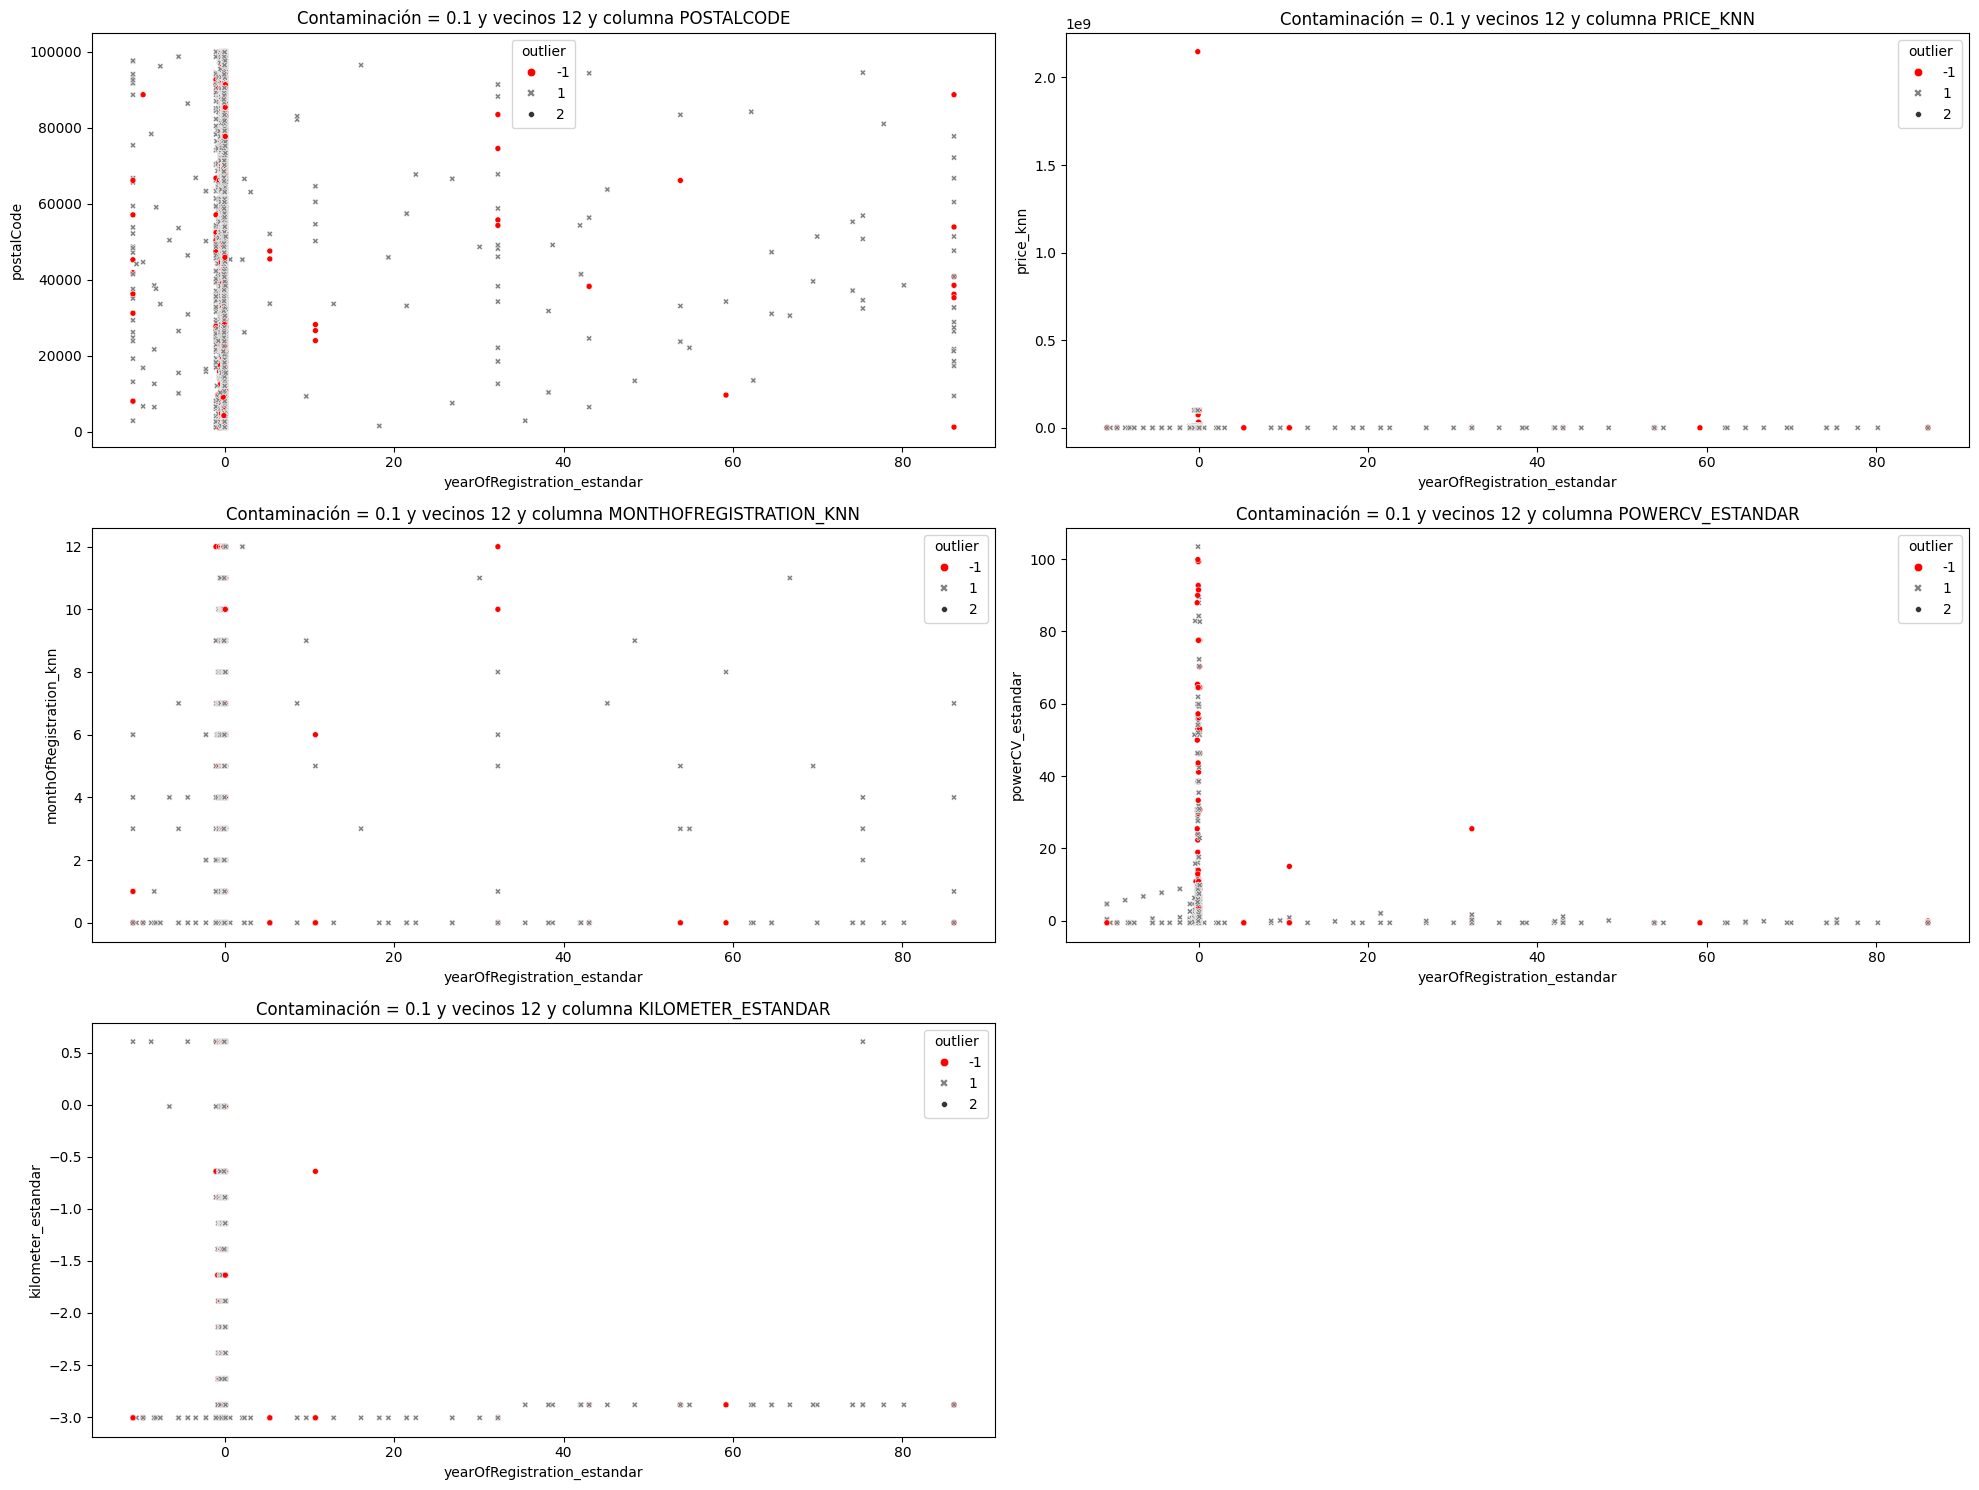

In [15]:
gestion_multi = so.GestionOutliersMultivariados(df)
gestion_multi.explorar_outliers_lof('yearOfRegistration_estandar')


- En este caso  los datos son dispersos, por lo que hemos elegido un  menor número de vecinos . En un entorno con baja densidad, considerar demasiados vecinos podría incluir puntos que están bastante lejos, lo cual podría distorsionar la estimación de la densidad local y dificultar la detección precisa de outliers. 


**Ahora comenzaremos el metodo Isolation Forest**

In [19]:
df.columns.unique()

Index(['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated',
       'postalCode', 'lastSeen', 'price_knn', 'monthOfRegistration_knn',
       'powerCV_estandar', 'kilometer_estandar',
       'yearOfRegistration_estandar'],
      dtype='object')

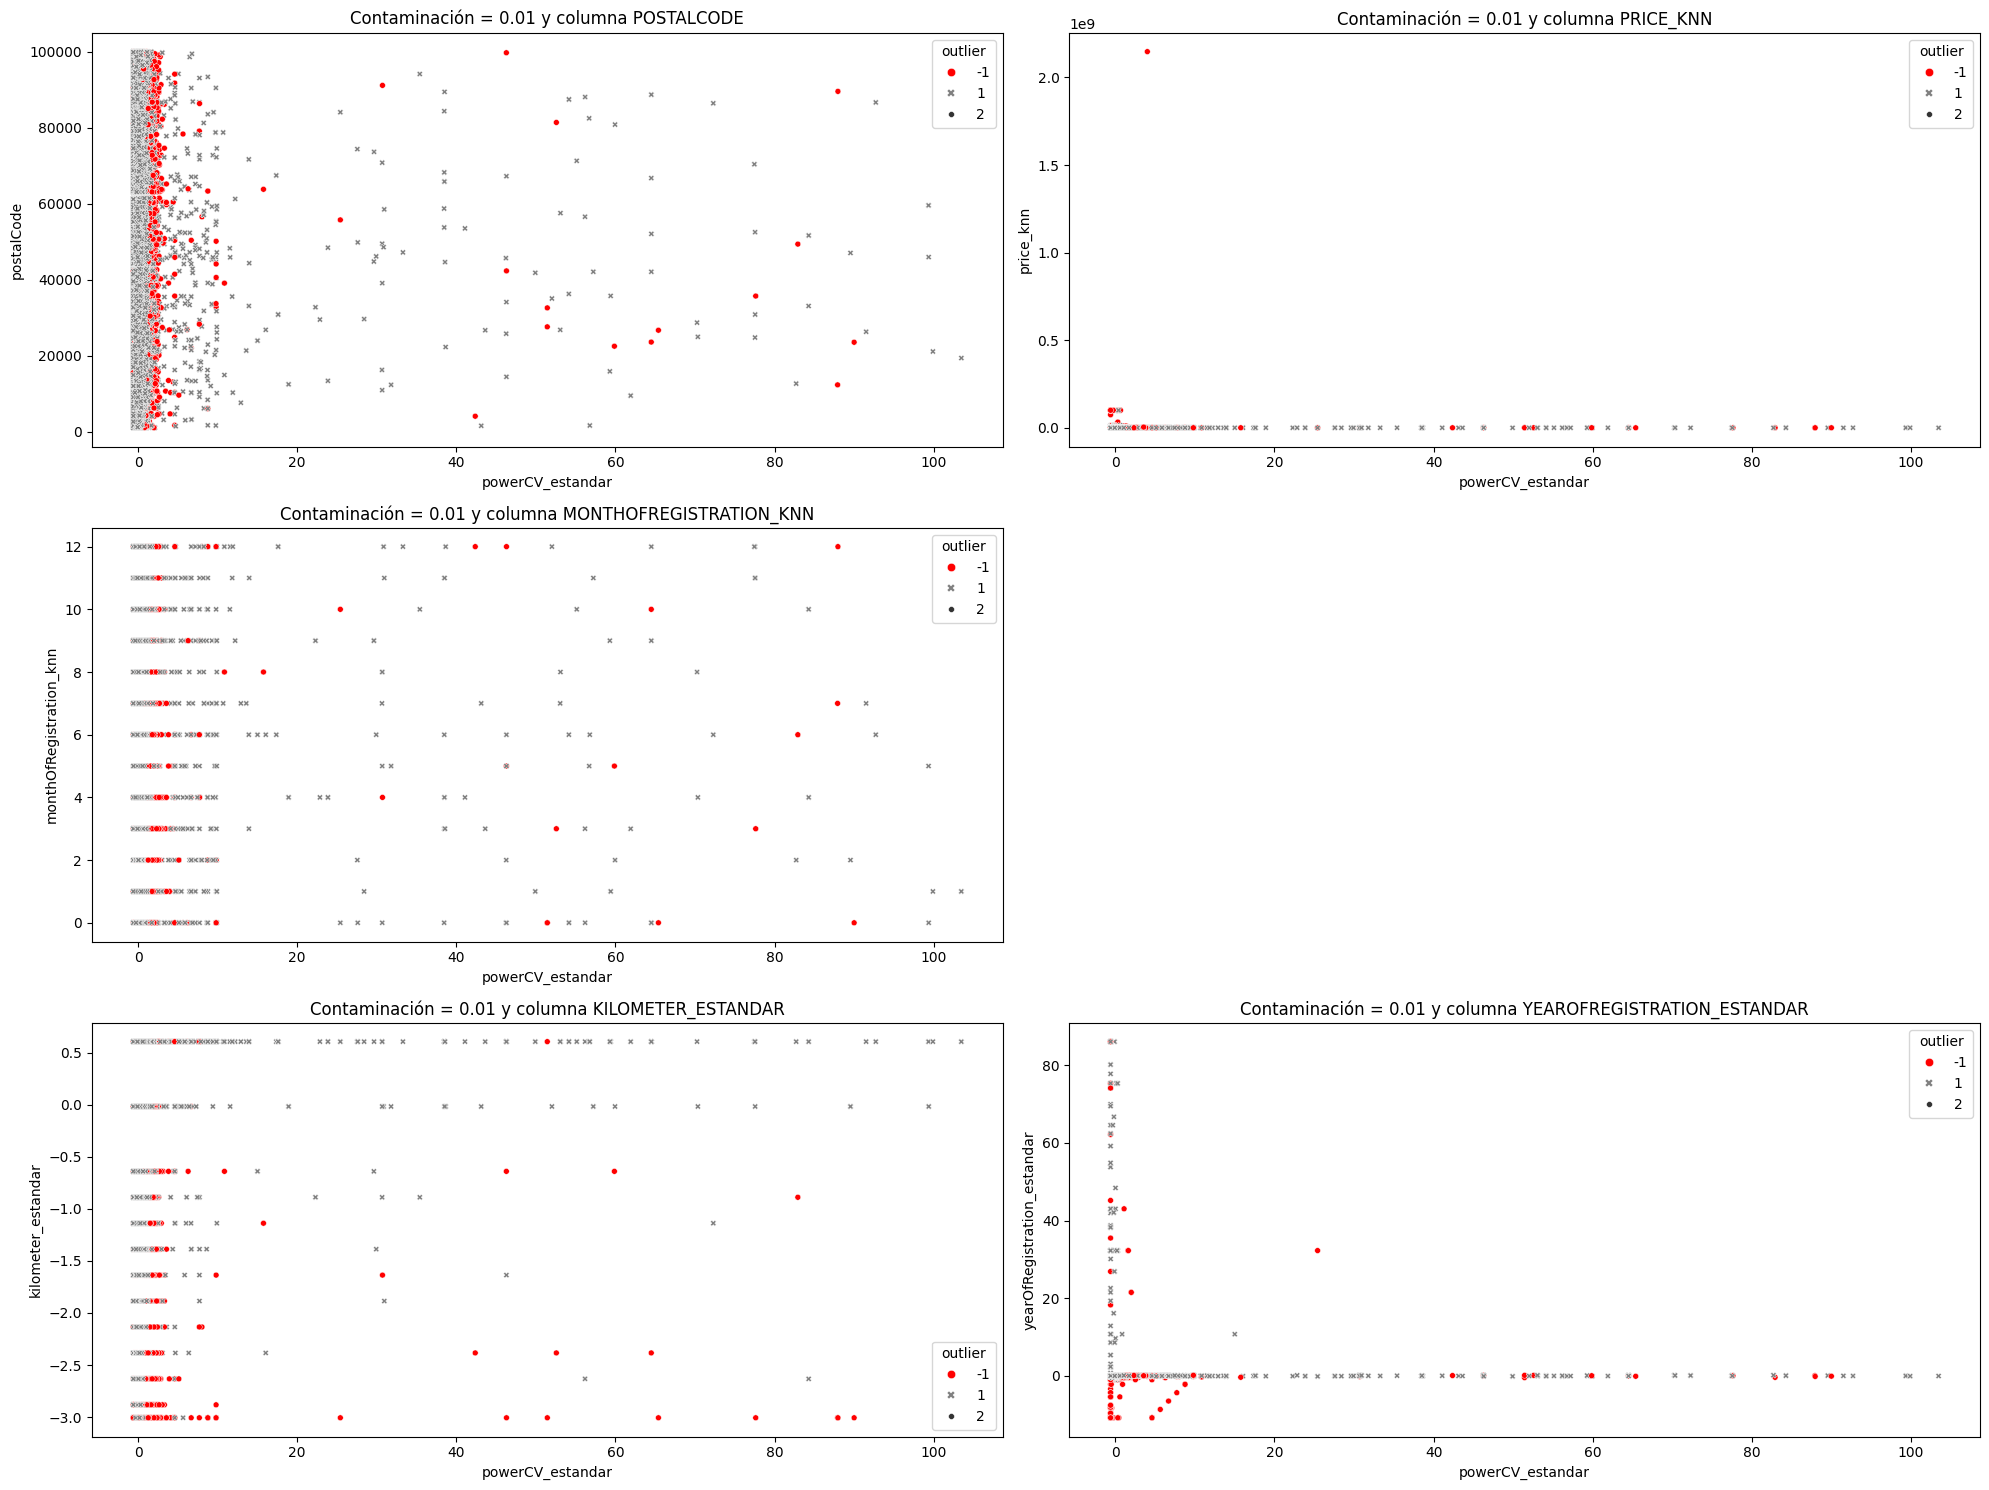

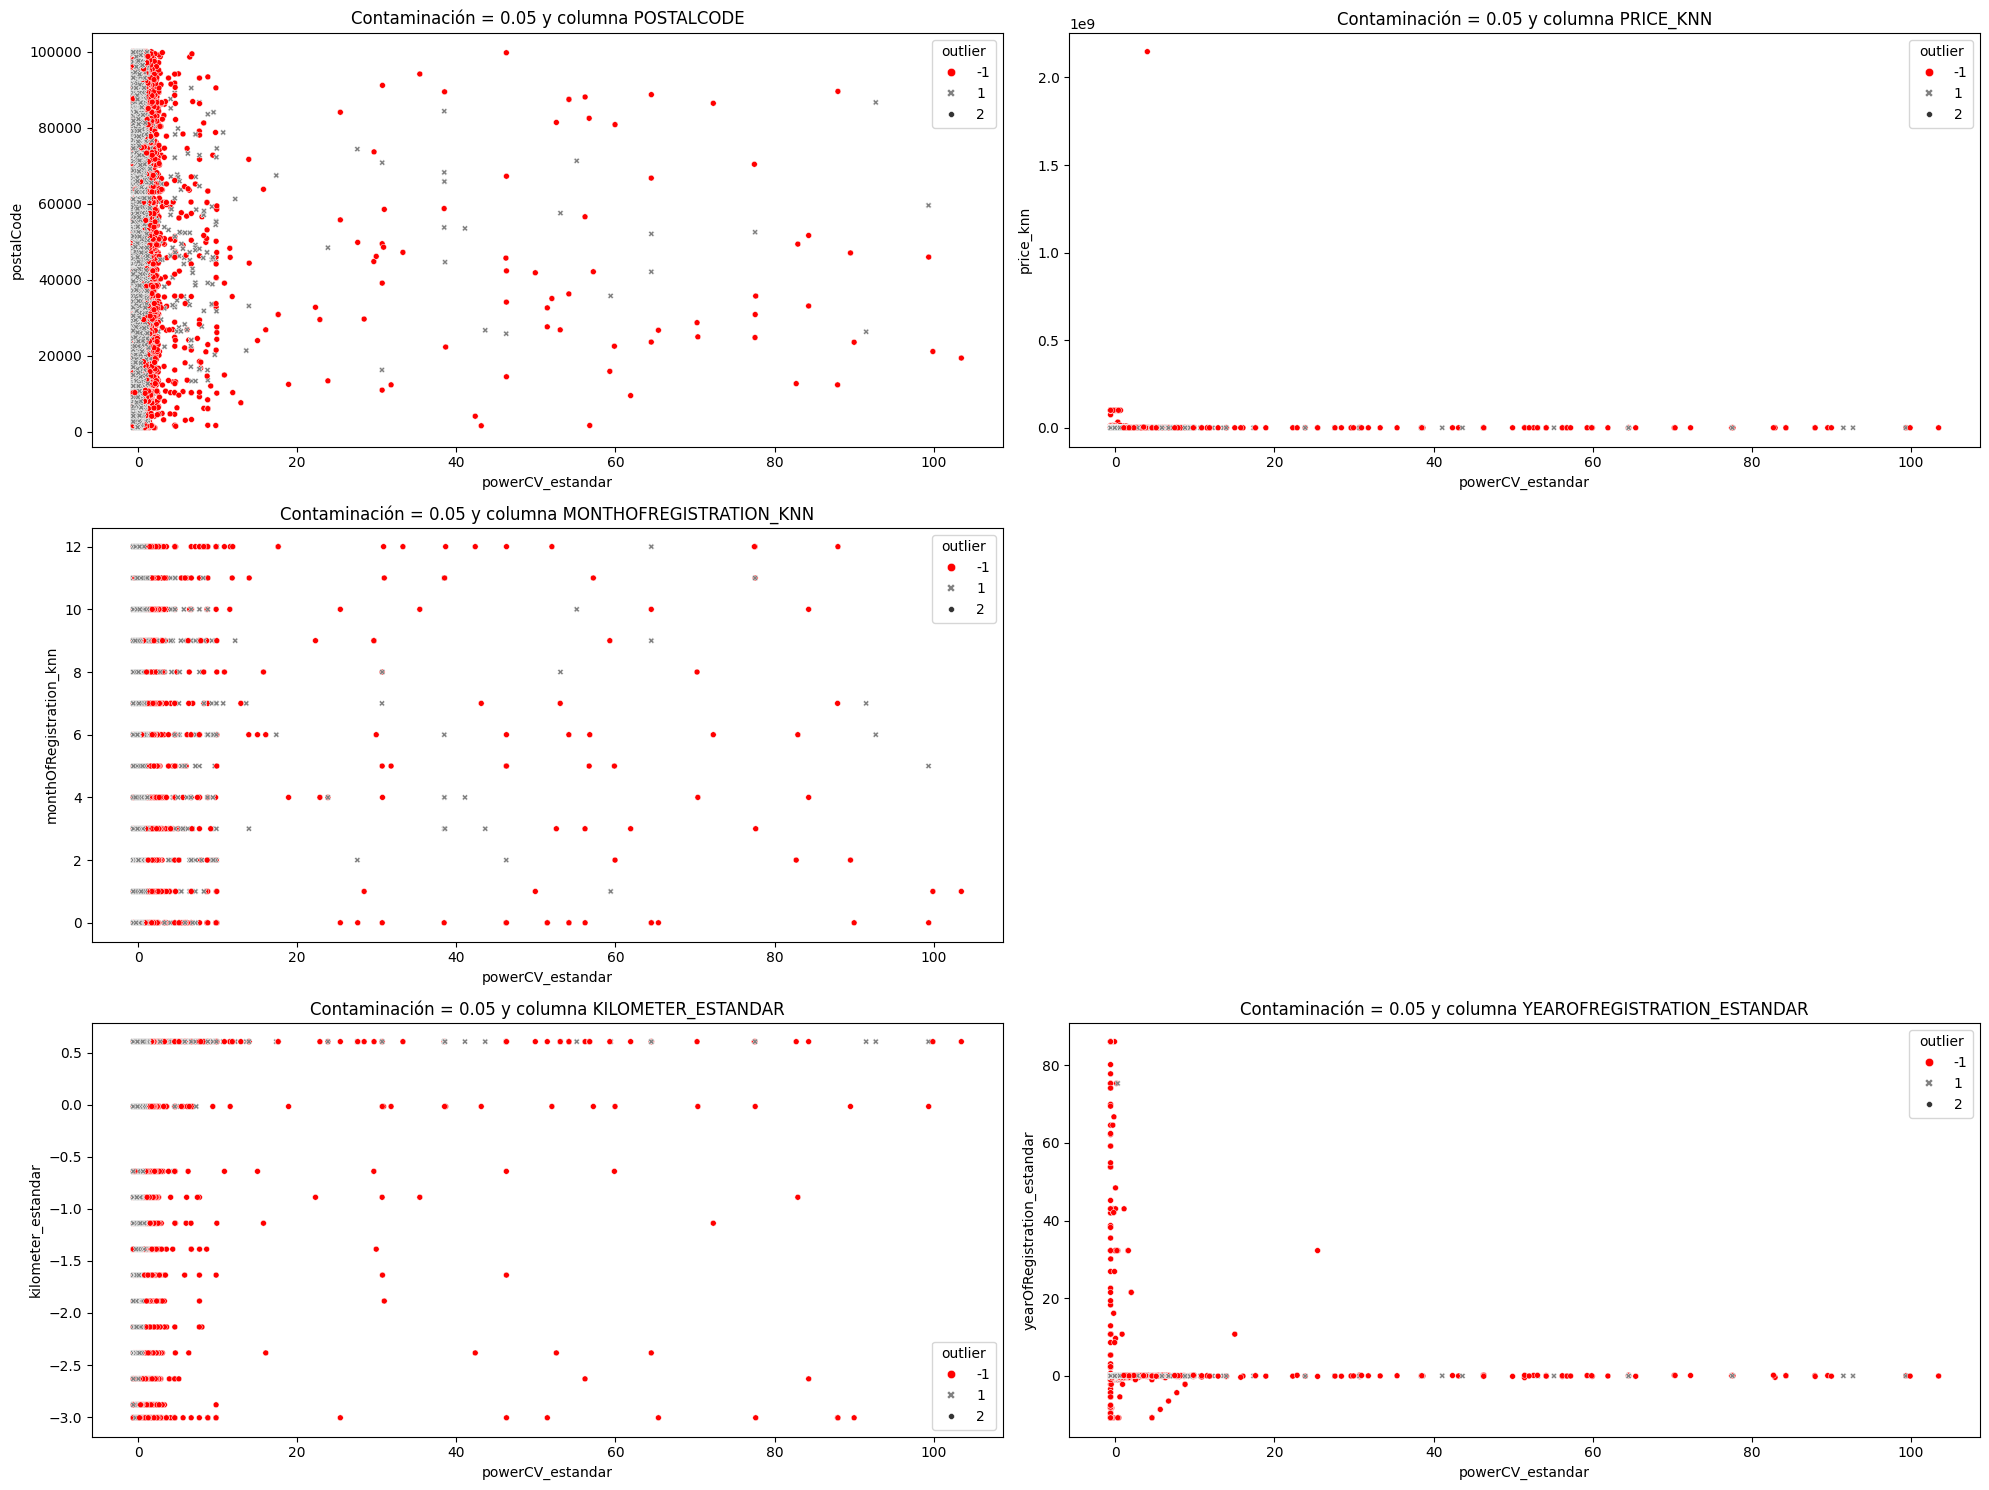

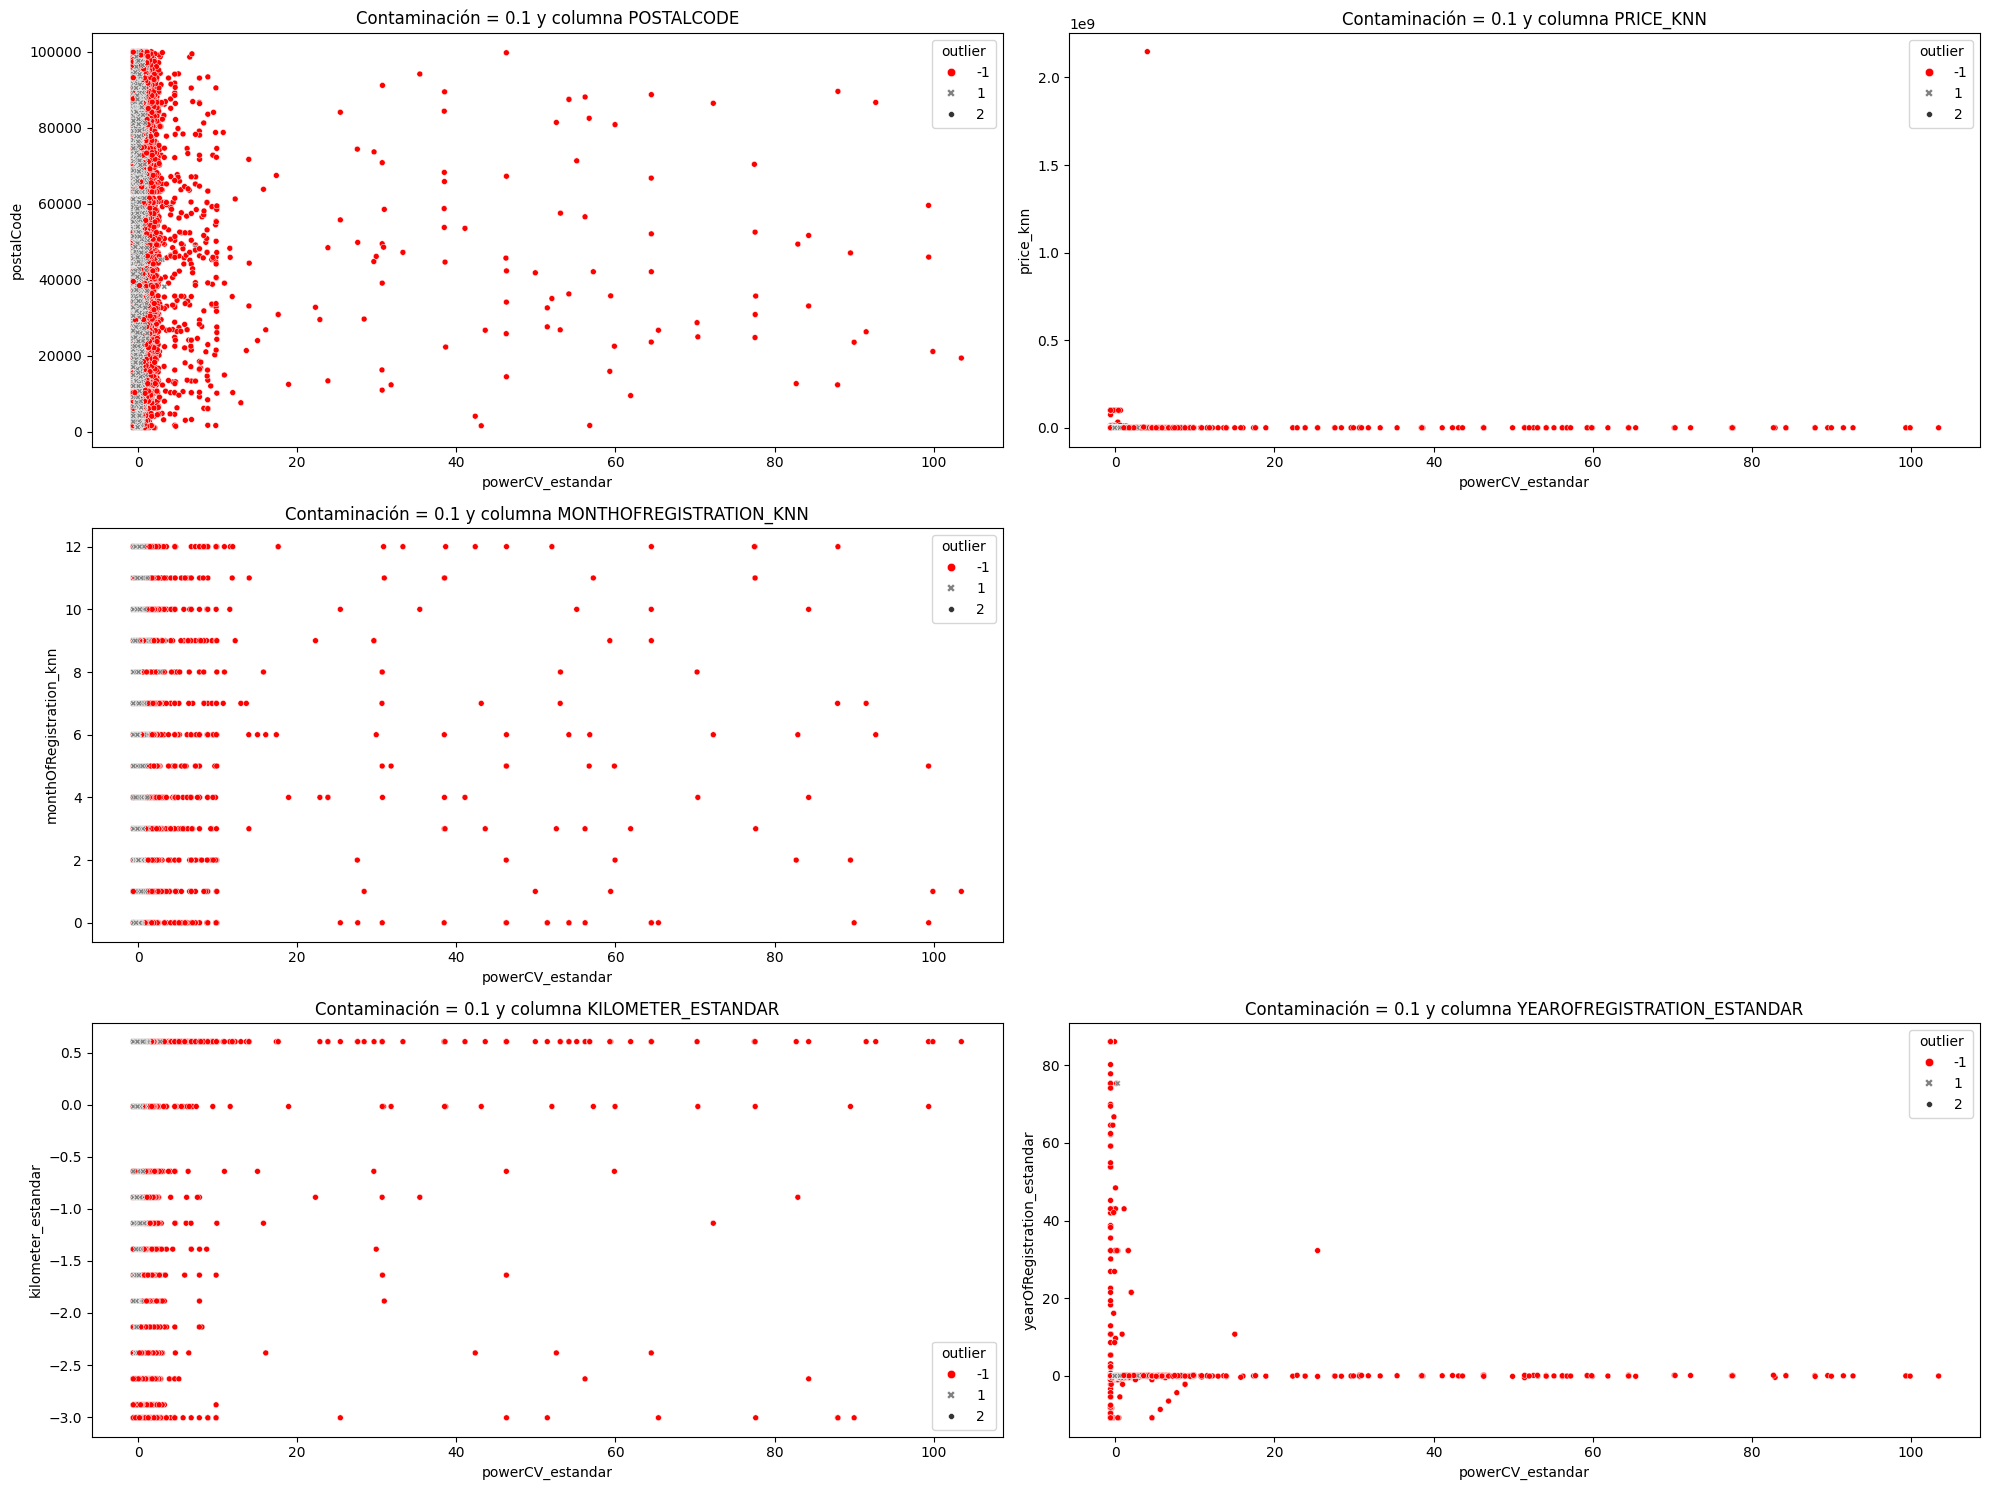

In [ ]:
gestion_multi.explorar_outliers_if("kilometer_estandar")

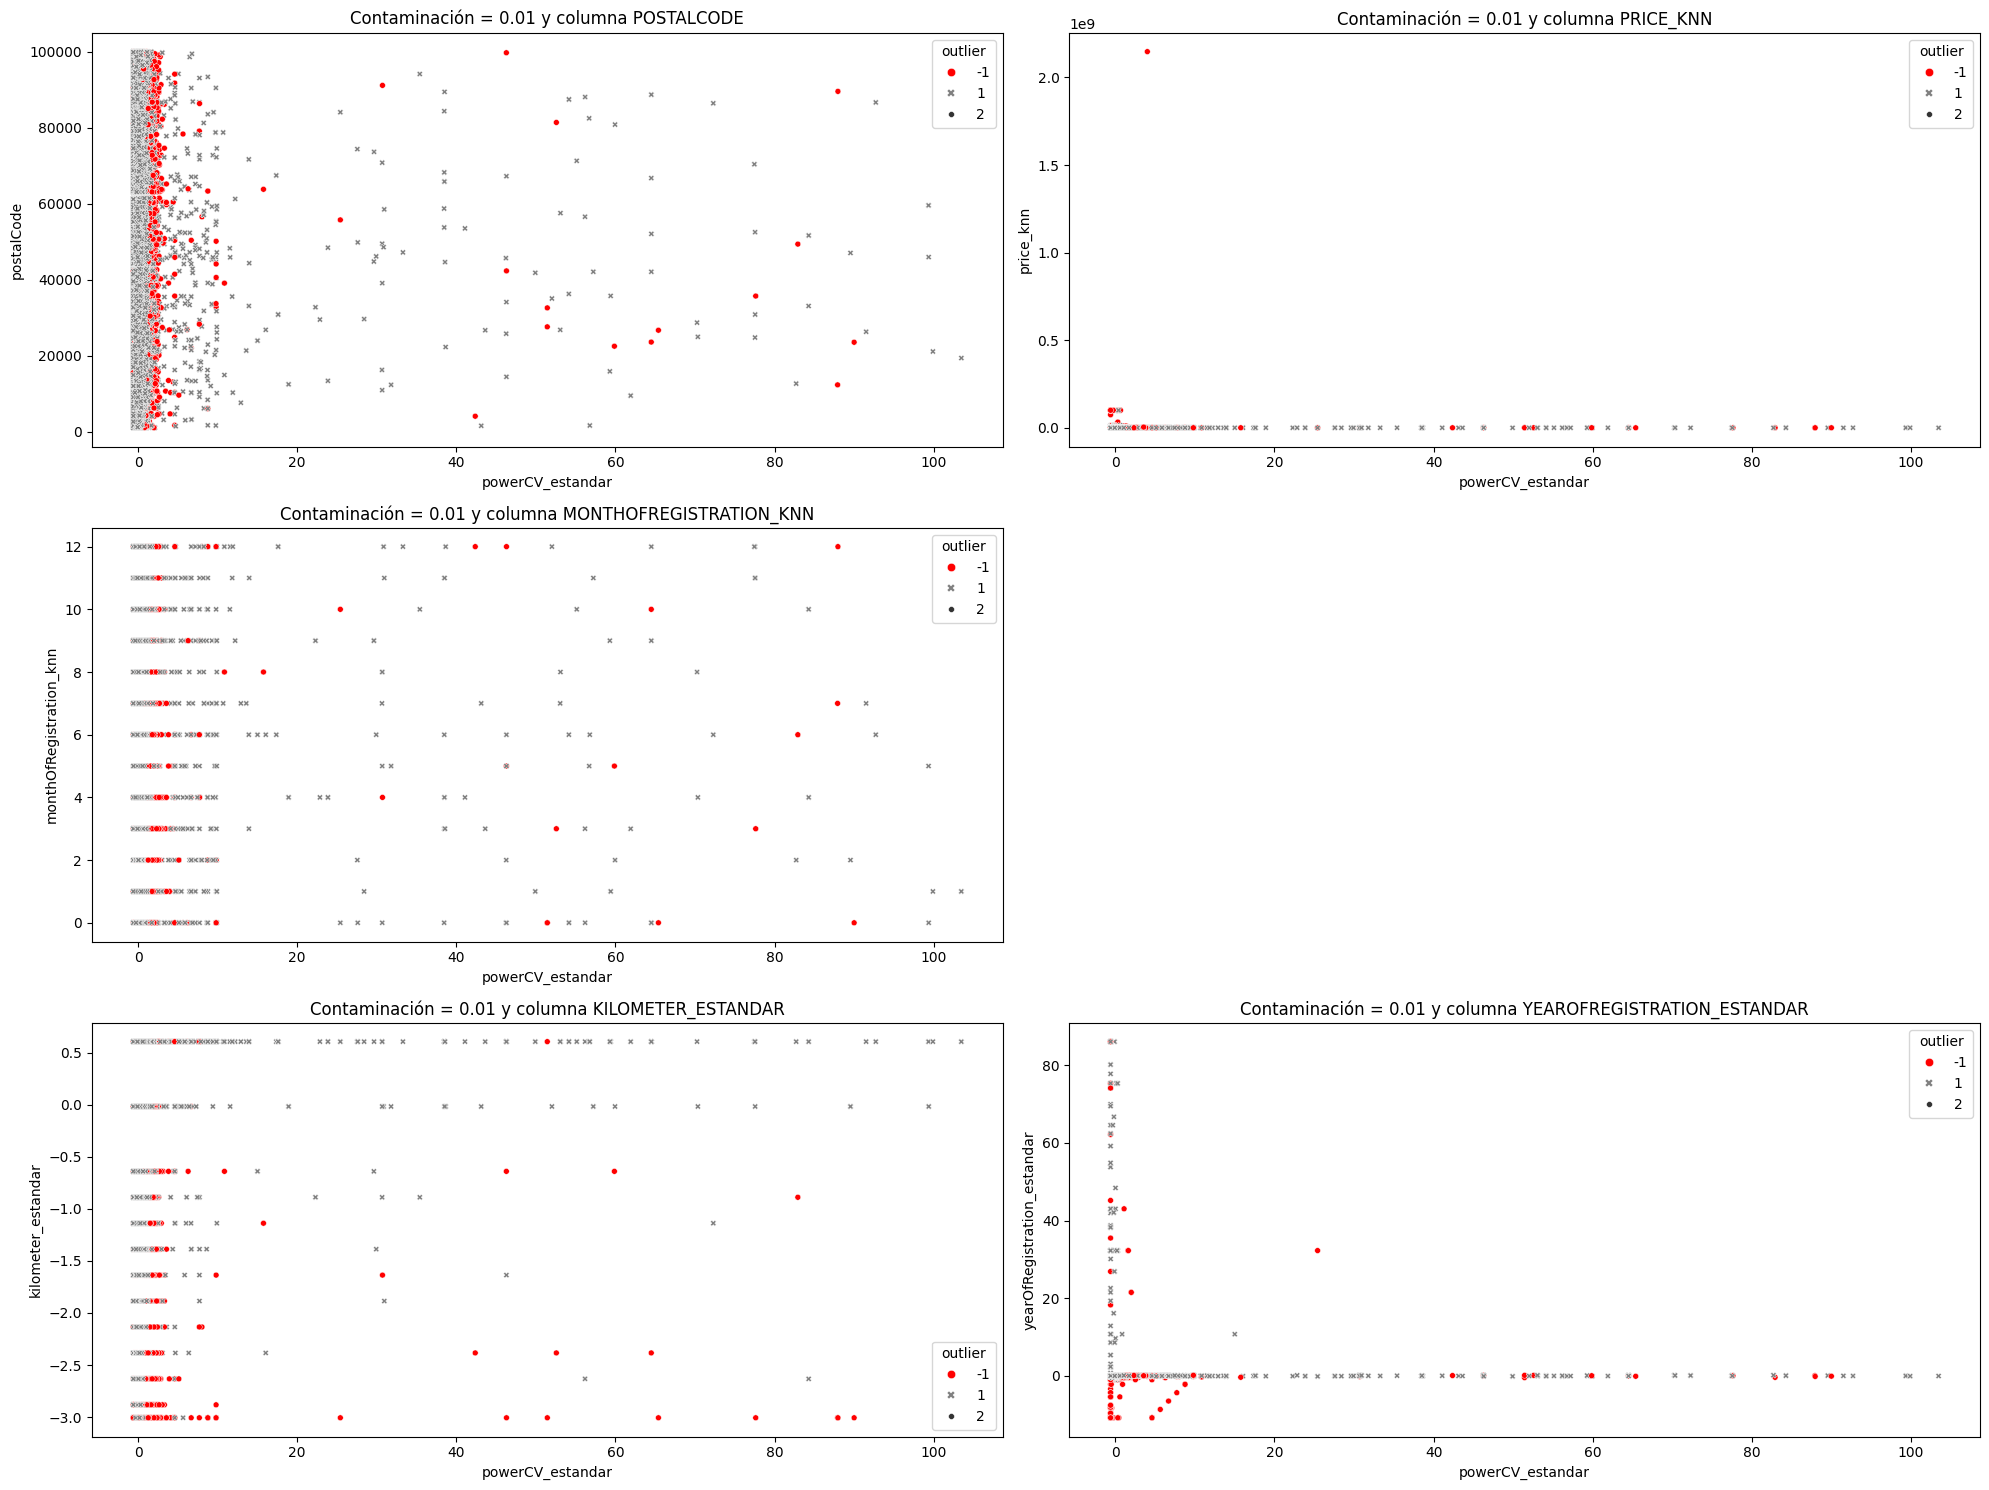

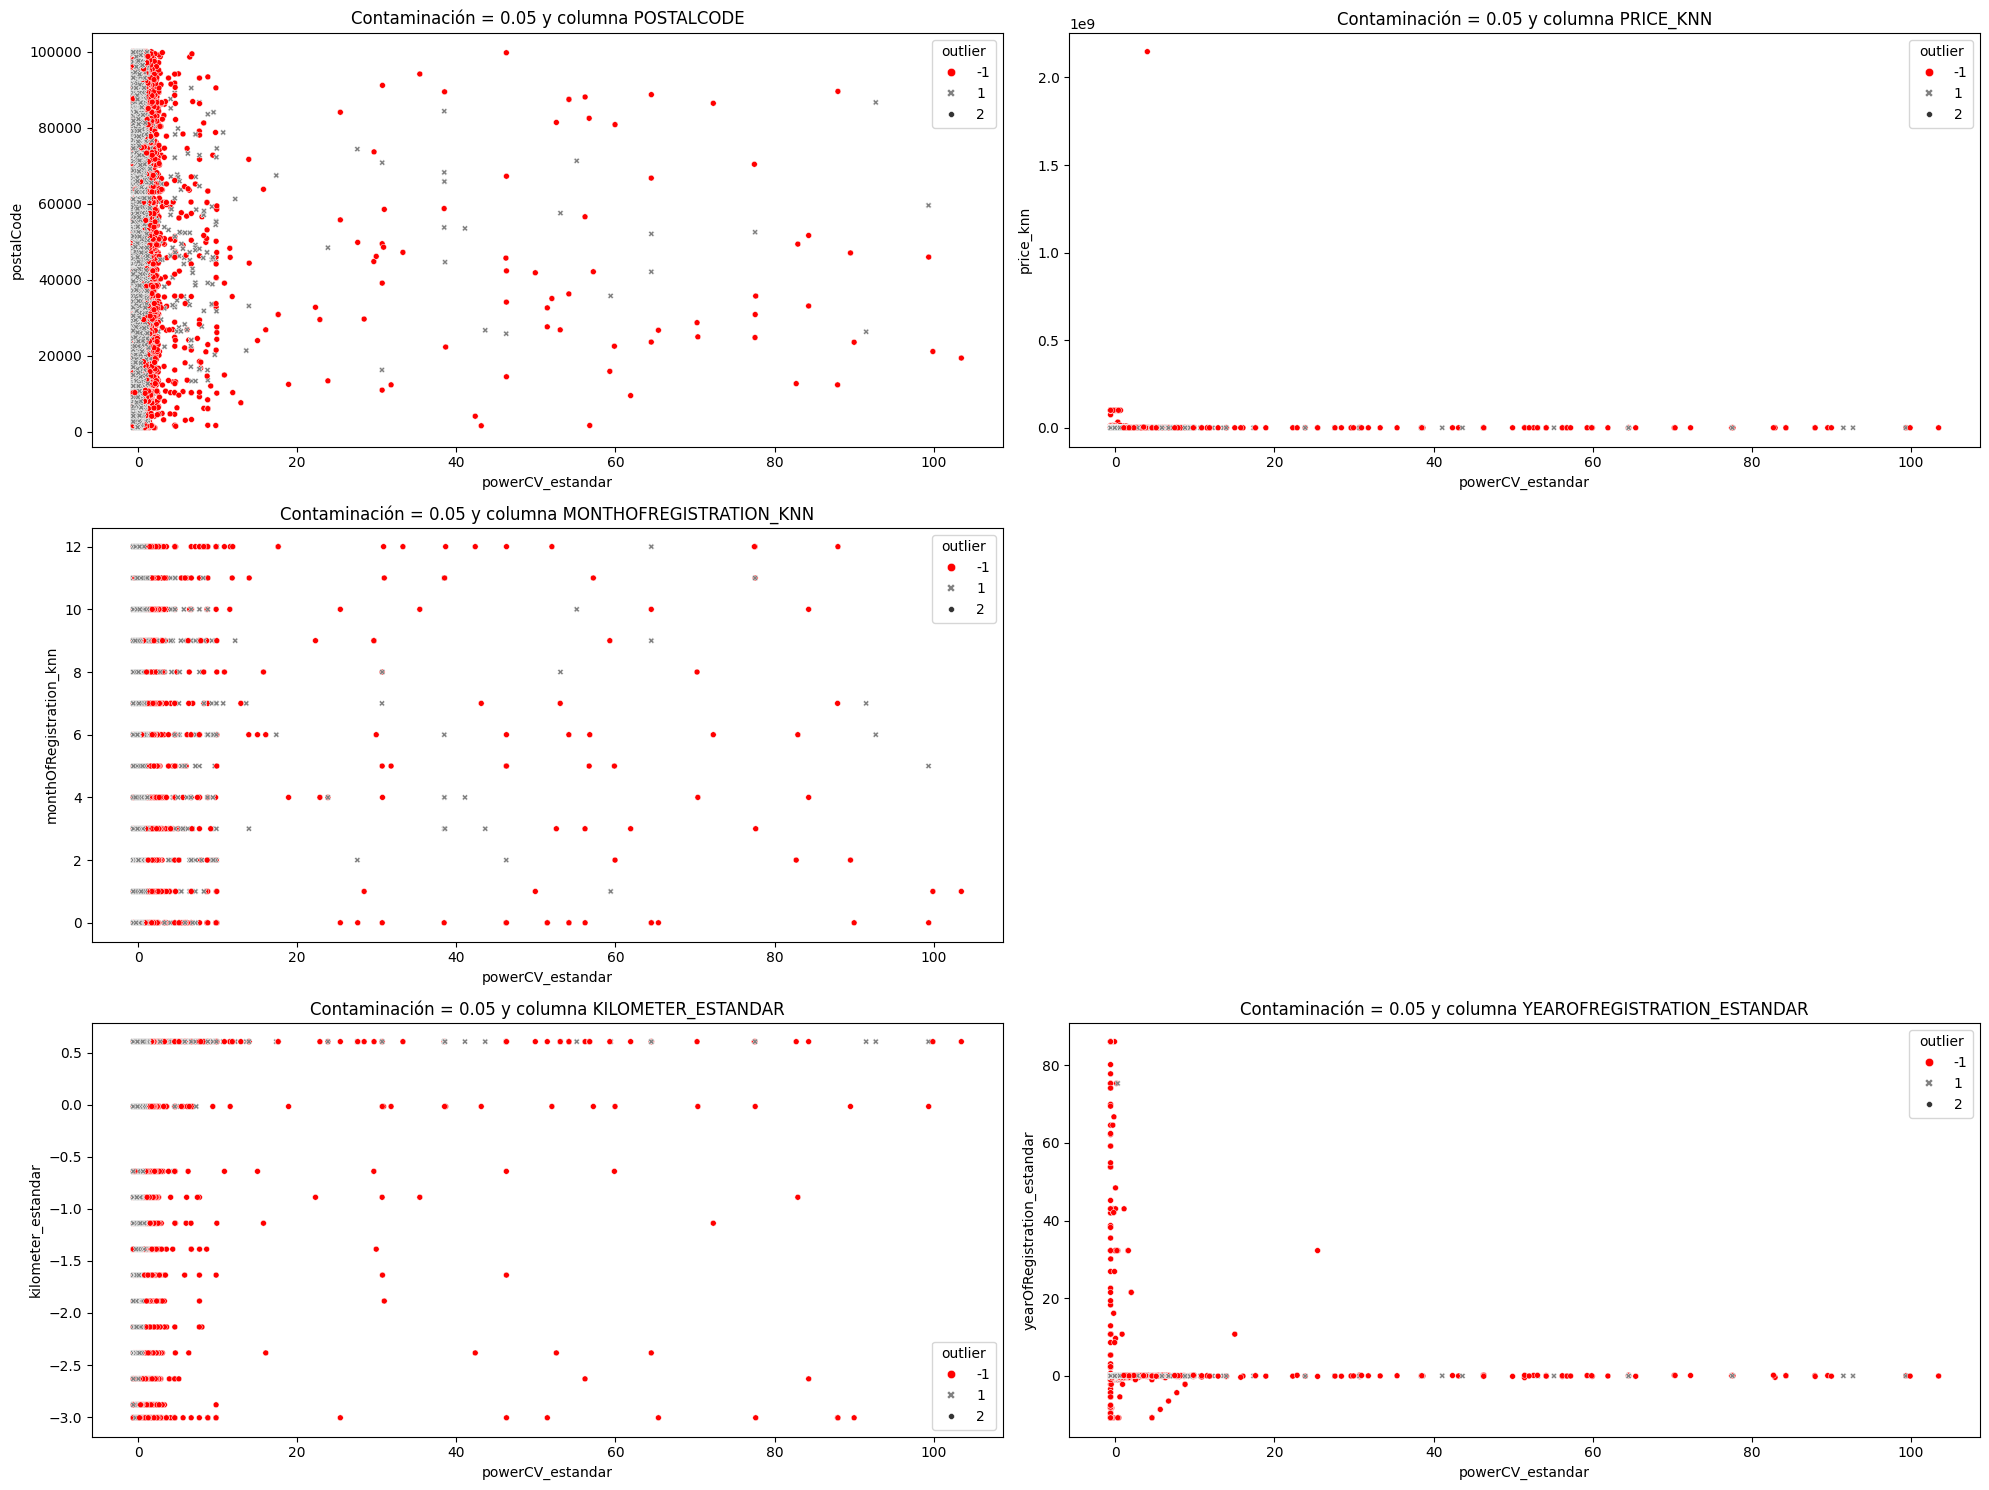

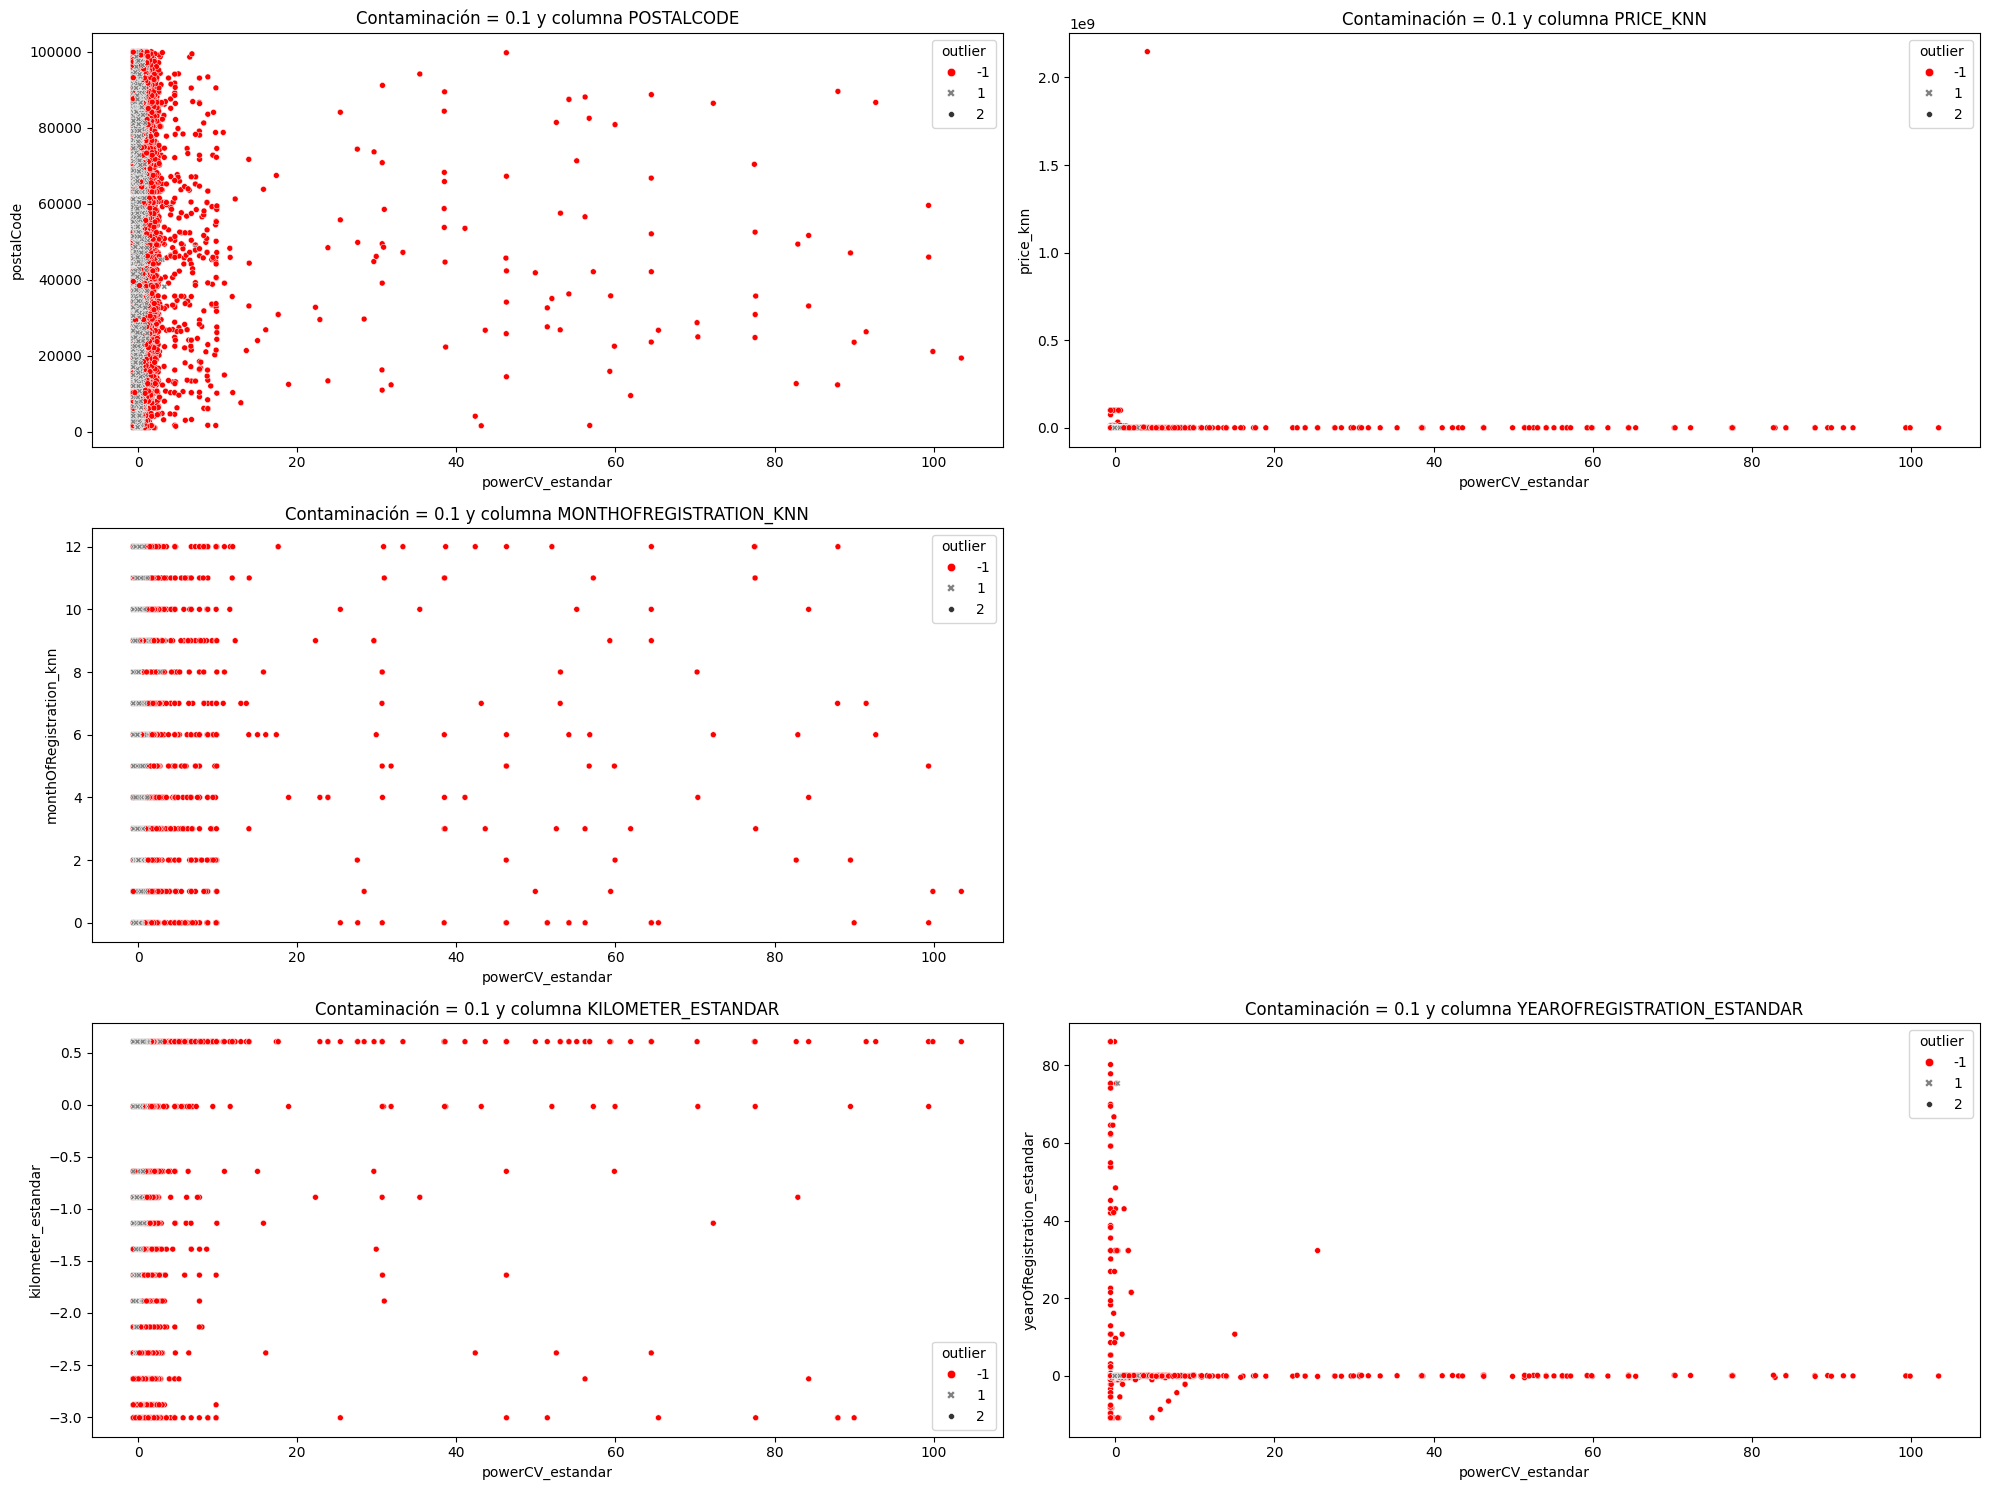

In [22]:
gestion_multi.explorar_outliers_if("powerCV_estandar")

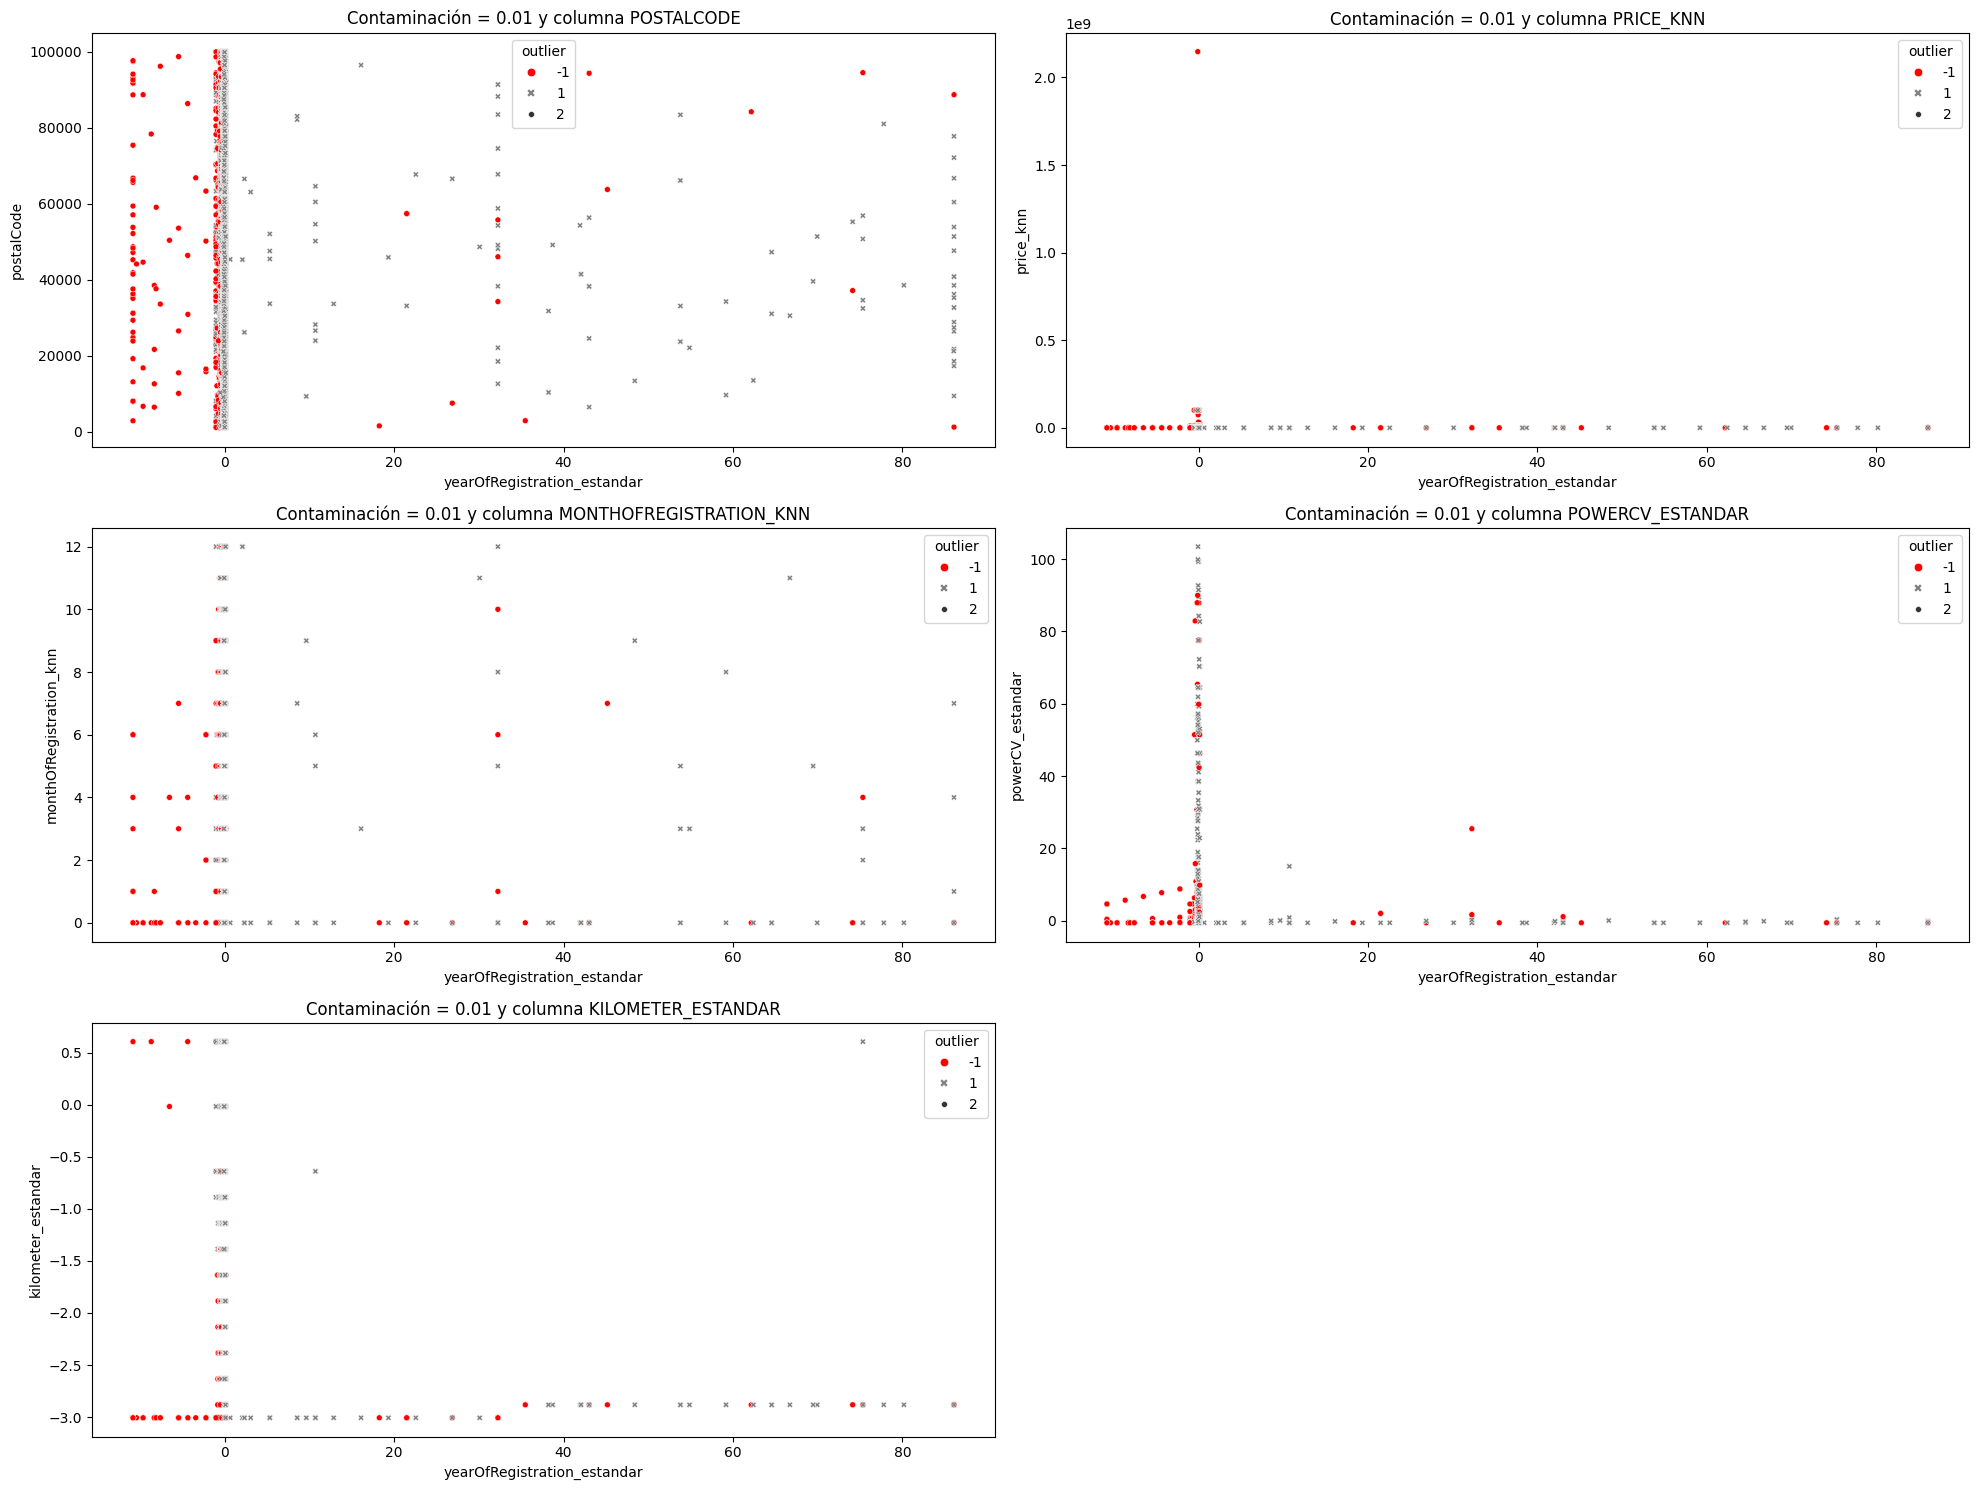

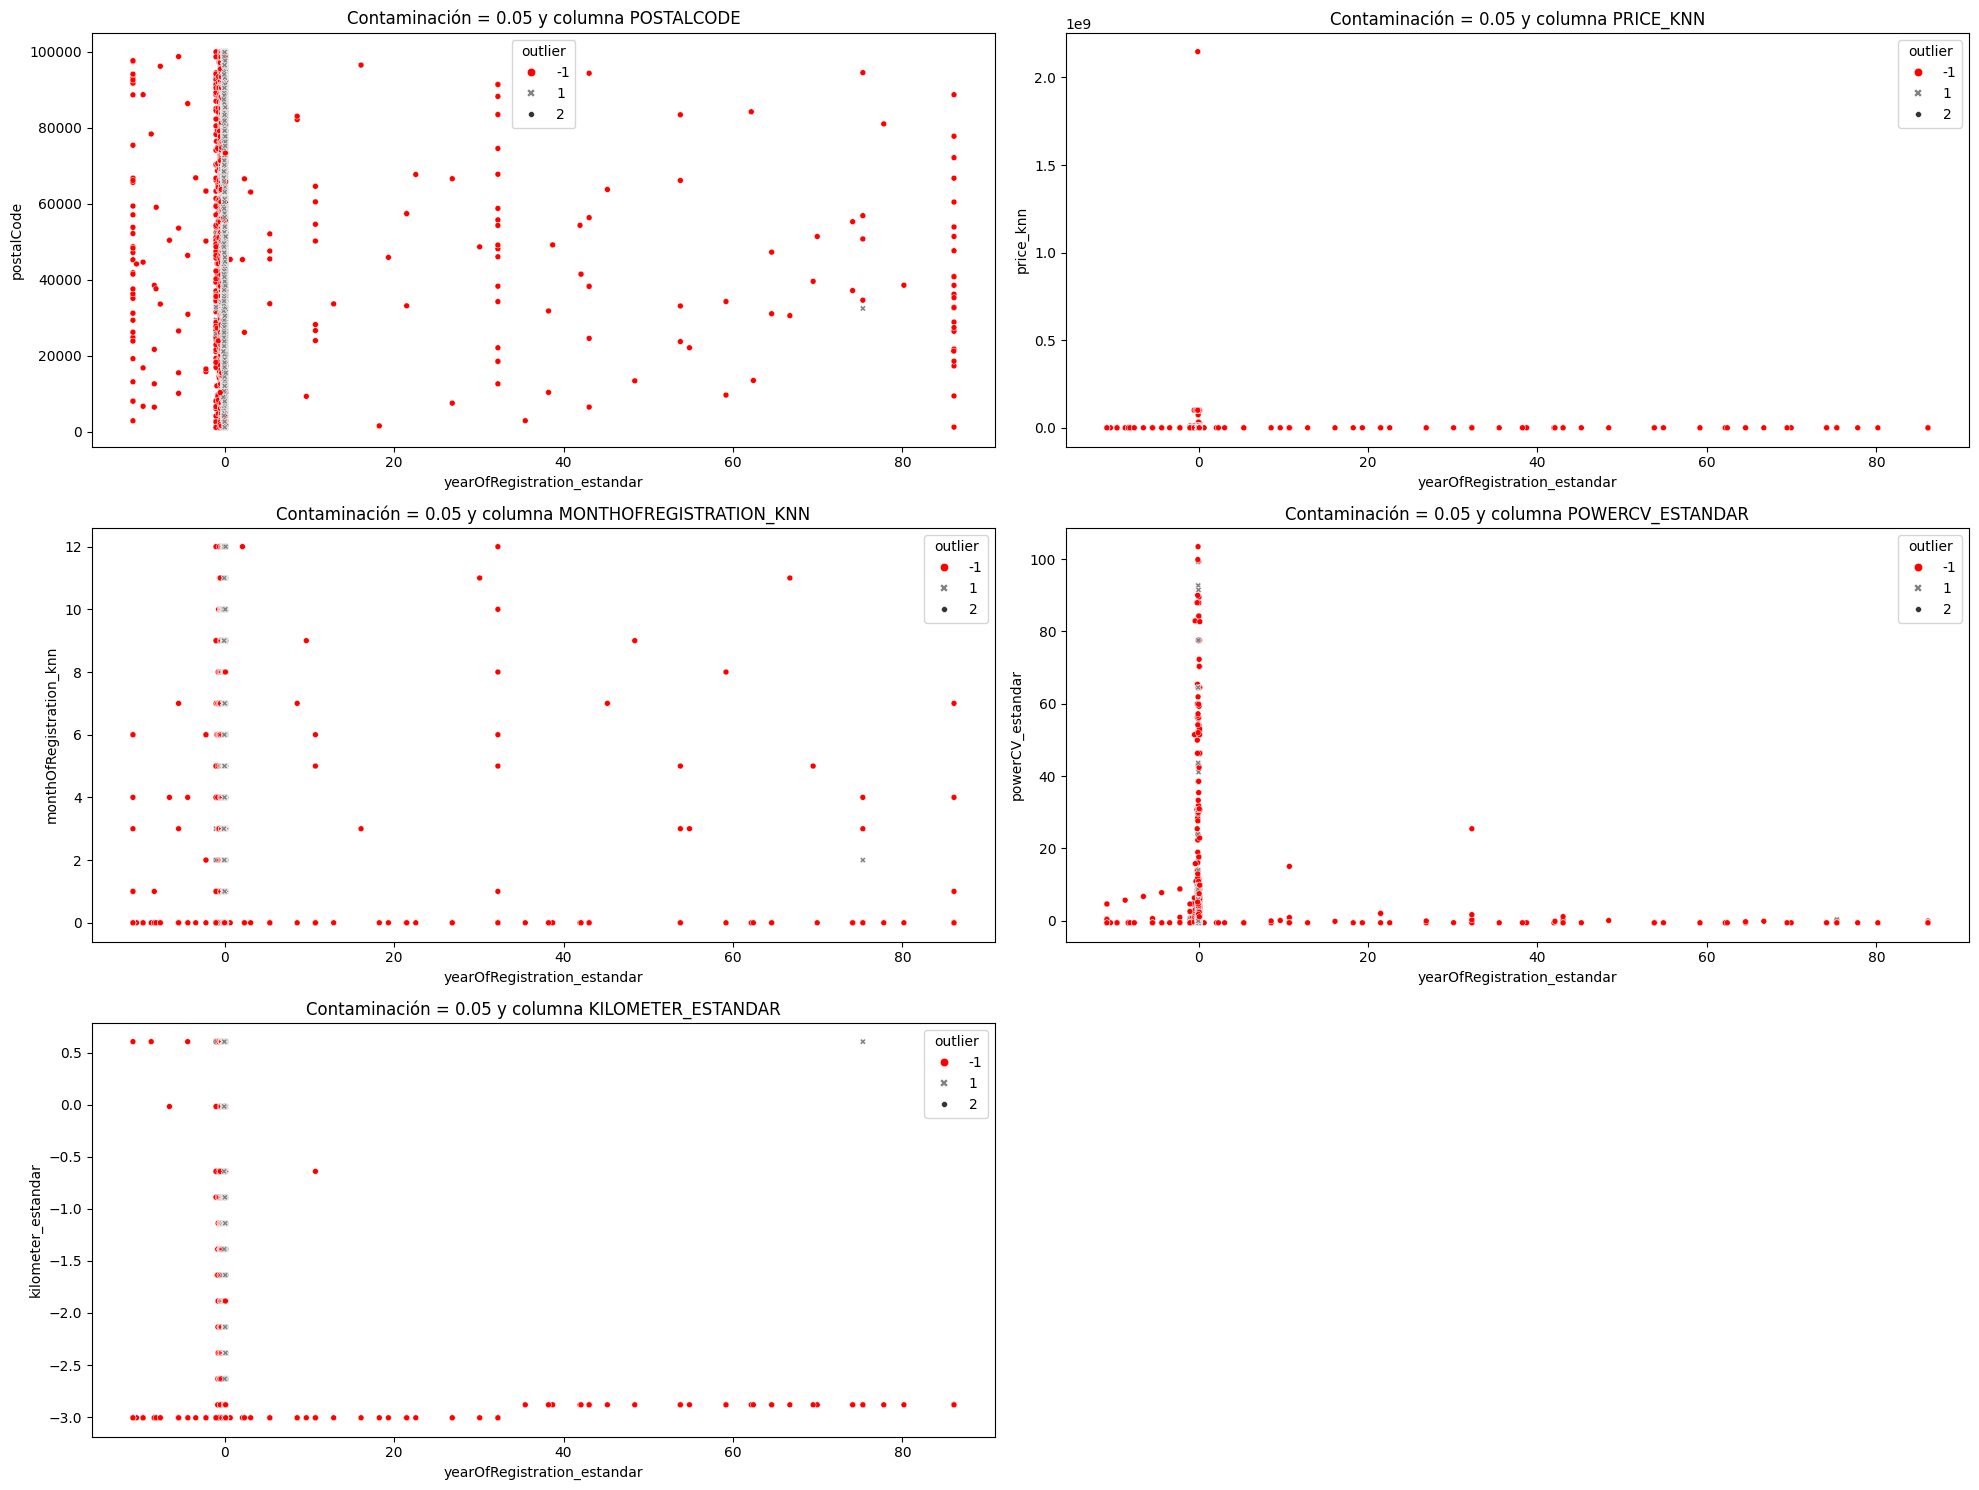

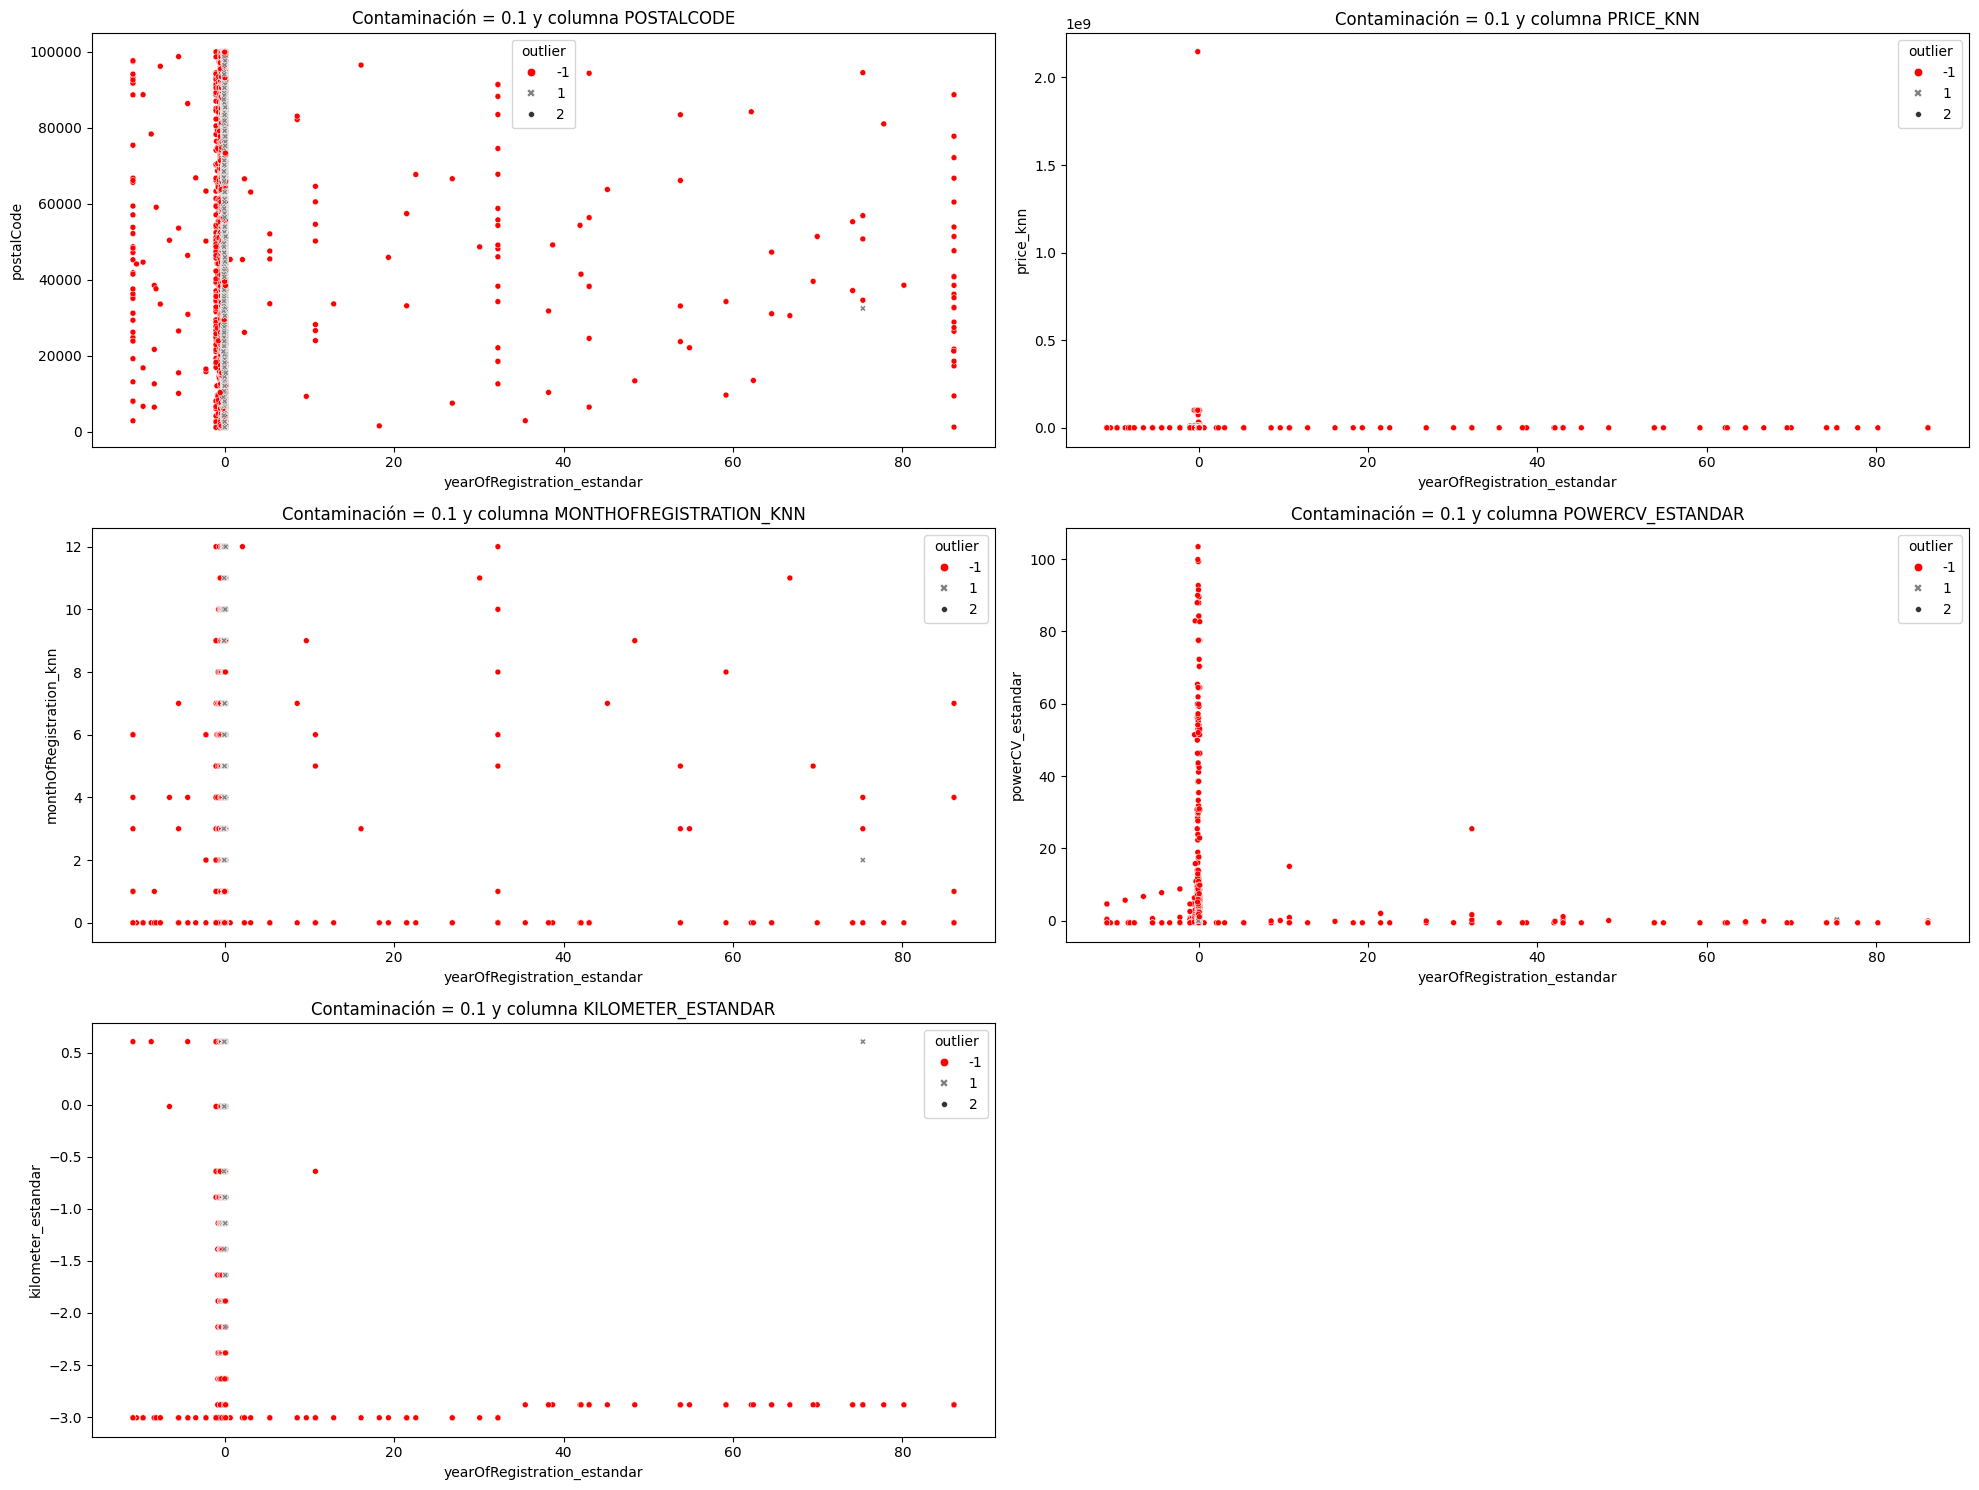

In [23]:
gestion_multi.explorar_outliers_if("yearOfRegistration_estandar")

Observando los estadisticos deberemos elegir en cada cada variable numerica la combinacion de numeros de arbol de decision y contaminacion contaminacion para asi quedarnos con la indentificacion mas correcta mas adelante en el modelo.

**Tratamiento de Outlaiers**

** Vamos a usar Local Outlier Factor (LOF)** | 
Puesto que compara la densidad de cada punto con la de sus vecinos para encontrar *outliers*.
Detectamos *outliers* locales y asume la distribución de todos los datos.

In [ ]:
df_outliers = gestion_multi.detectar_outliers_lof(6,contaminacion=0.05)
df_outliers.head()                                                  #detectamos los outlaiers con 6 vecinos

name   seller offerType abtest vehicleType  \
0                      Golf_3_1.6  private     offer   test     Unknown   
1            A5_Sportback_2.7_Tdi  private     offer   test       coupe   
2  Jeep_Grand_Cherokee_"Overland"  private     offer   test         suv   
3              GOLF_4_1_4__3TÜRER  private     offer   test   small car   
4  Skoda_Fabia_1.4_TDI_PD_Classic  private     offer   test   small car   

     gearbox    model fuelType       brand notRepairedDamage dateCreated  \
0   manually     golf   petrol  volkswagen           Unknown  2016-03-24   
1   manually  Unknown   diesel        audi               yes  2016-03-24   
2  automatic    grand   diesel        jeep           Unknown  2016-03-14   
3   manually     golf   petrol  volkswagen                no  2016-03-17   
4   manually    fabia   diesel       skoda                no  2016-03-31   

   postalCode             lastSeen  price_knn  monthOfRegistration_knn  \
0       70435  2016-04-07 03:16:57      480.0                      0.0   
1       66954  2016-04-07 01:46:50    18300.0                      5.0   
2       90480  2016-04-05 12:47:46     9800.0                      8.0   
3       91074  2016-03-17 17:40:17     1500.0                      6.0   
4       60437  2016-04-06 10:17:21     3600.0                      7.0   

   powerCV_estandar  kilometer_estandar  yearOfRegistration_estandar  outlier  
0         -0.601340            0.607813                    -0.124672       -1  
1          0.385348           -0.015437                     0.069147        1  
2          0.248162           -0.015437                    -0.006227        1  
3         -0.210886            0.607813                    -0.038530        1  
4         -0.242544           -0.887987                     0.036844        1

In [25]:
# llamamos al método que nos permite imputar los outliers
df_final = gestion_multi.imputar_outliers(data = df_outliers, metodo = "mediana")
df_final.head()

name   seller offerType abtest vehicleType  \
0                      Golf_3_1.6  private     offer   test     Unknown   
1            A5_Sportback_2.7_Tdi  private     offer   test       coupe   
2  Jeep_Grand_Cherokee_"Overland"  private     offer   test         suv   
3              GOLF_4_1_4__3TÜRER  private     offer   test   small car   
4  Skoda_Fabia_1.4_TDI_PD_Classic  private     offer   test   small car   

     gearbox    model fuelType       brand notRepairedDamage dateCreated  \
0   manually     golf   petrol  volkswagen           Unknown  2016-03-24   
1   manually  Unknown   diesel        audi               yes  2016-03-24   
2  automatic    grand   diesel        jeep           Unknown  2016-03-14   
3   manually     golf   petrol  volkswagen                no  2016-03-17   
4   manually    fabia   diesel       skoda                no  2016-03-31   

   postalCode             lastSeen  price_knn  monthOfRegistration_knn  \
0       49751  2016-04-07 03:16:57     2990.0                      6.0   
1       66954  2016-04-07 01:46:50    18300.0                      5.0   
2       90480  2016-04-05 12:47:46     9800.0                      8.0   
3       91074  2016-03-17 17:40:17     1500.0                      6.0   
4       60437  2016-04-06 10:17:21     3600.0                      7.0   

   powerCV_estandar  kilometer_estandar  yearOfRegistration_estandar  
0         -0.052593            0.607813                    -0.016995  
1          0.385348           -0.015437                     0.069147  
2          0.248162           -0.015437                    -0.006227  
3         -0.210886            0.607813                    -0.038530  
4         -0.242544           -0.887987                     0.036844

In [26]:
# guardamos el conjunto de datos para usarlo en la siguiente lección
df_final.to_csv("datos/online_shoppers_intention_clase_nonulls_estan_sinout.csv")

**Conclusiones finales y proximos pasos del estudio**

Para la proxima exploracion deberemos realizar el modelo dejando las variables numericas que durante todo este estudios hemos detectado que no debemos pasar a categoricas. Se tratan de codigo postal y de mes de registo.

Observamos que la mejor manera de imputacion de outlaiers seria el estadistico **DBSCAN** por el la gran cantidad de outlaiers y la gran dispersion de los mismos, pero por la poca familiarizacion con este estadistico hemos usado el segundo mas correcto para estos datos. Deberemos volver a analizar los outlaier cuando tranformemos las columnas comentadas anteriormente.